In [23]:
import pandas as pd

In [82]:

heads = all_rows[0].find_all("td")
elem_h = [x.get_text() for x in heads]
df = pd.DataFrame(columns=elem_h)
for row in all_rows[1:-1]:
    cells = row.find_all("td")
    elems = [x.get_text() for x in cells]
    temp_df = pd.DataFrame([elems], columns=elem_h )
    df = df.append(temp_df)

In [83]:
df["Total Number of Households"] = pd.to_numeric(df["Total Number of Households"].str.replace(",",""))

In [84]:
df

Household Size  Total Number of Households % of Total Renter Households  \
0       1 Person                       18788      19.1%            10,902   
0      2 Persons                       26705      27.1%            13,643   
0      3 Persons                       16895      17.1%             8,763   
0      4 Persons                       14725      14.9%             7,839   
0      5 Persons                       10586      10.7%             5,877   
0      6 Persons                        5253       5.3%             3,116   
0    7 + Persons                        5634       5.7%             2,830   

  % of Total Owner Households % of Total  
0      20.6%            7,886      17.3%  
0      25.8%           13,062      28.6%  
0      16.5%            8,132      17.8%  
0      14.8%            6,886      15.1%  
0      11.1%            4,709      10.3%  
0       5.9%            2,137       4.7%  
0       5.3%            2,804       6.1%

In [63]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [263]:
# sns.barplot(x=df["Household Size"], y=df["Total Number of Households"]);
# plt.title("Household Demographics")

# Sub Categories in tables

In [86]:
print(tables[16].prettify())

<table cellspacing="0" style="border-collapse:collapse;margin-left:28.88pt">
 <tr style="height:26pt">
  <td style="width:116pt;border-top-style:solid;border-top-width:1pt;border-bottom-style:solid;border-bottom-width:1pt;border-right-style:solid;border-right-width:1pt">
   <p style="text-indent: 0pt;text-align: left;">
    <br/>
   </p>
   <p class="s9" style="padding-left: 41pt;padding-right: 40pt;text-indent: 0pt;line-height: 12pt;text-align: center;">
    Income
   </p>
  </td>
  <td colspan="2" style="width:110pt;border-top-style:solid;border-top-width:1pt;border-left-style:solid;border-left-width:1pt;border-bottom-style:solid;border-bottom-width:1pt;border-right-style:solid;border-right-width:1pt">
   <p style="text-indent: 0pt;text-align: left;">
    <br/>
   </p>
   <p class="s9" style="padding-left: 18pt;text-indent: 0pt;line-height: 12pt;text-align: left;">
    Owner Occupied
   </p>
  </td>
  <td colspan="2" style="width:107pt;border-top-style:solid;border-top-width:1pt;bord

In [103]:
all_rows = tables[20].find_all("tr")
data = []
for row in all_rows:
    cells = row.find_all("td")
    elems = [x.get_text() for x in cells]
    data.append(elems)
heads = [""]
for i in data[0][1:]:
    heads.append(i + " Units")
    heads.append(i + " %")
    
final_d = data[2:]

In [104]:
final_d

[['Studio/No Bedroom', '26', '0.1%', '1,650', '3.1%', '1,676', '1.7%'],
 ['1 bedroom', '792', '1.7%', '15,549', '29.4%', '16,341', '16.6%'],
 ['2 bedrooms', '5,382', '11.8%', '25,561', '48.3%', '30,943', '31.4%'],
 ['3 bedrooms', '21,148', '46.4%', '7,422', '14.0%', '28,570', '29.0%'],
 ['4 bedrooms', '14,823', '32.5%', '2,473', '4.7%', '17,296', '17.5%'],
 ['5 or more bedrooms', '3,445', '7.6%', '315', '0.6%', '3,760', '3.8%'],
 ['Total', '45,616', '100%', '52,970', '100%', '98,586', '100%']]

In [105]:
heads

['',
 'Owner-Occupied Units',
 'Owner-Occupied %',
 'Renter-Occupied Units',
 'Renter-Occupied %',
 'Total Occupied Housing Unites Units',
 'Total Occupied Housing Unites %']

In [106]:
home_types = pd.DataFrame(data=final_d, columns = heads)

In [107]:
home_types

Owner-Occupied Units Owner-Occupied %  \
0   Studio/No Bedroom                   26             0.1%   
1           1 bedroom                  792             1.7%   
2          2 bedrooms                5,382            11.8%   
3          3 bedrooms               21,148            46.4%   
4          4 bedrooms               14,823            32.5%   
5  5 or more bedrooms                3,445             7.6%   
6               Total               45,616             100%   

  Renter-Occupied Units Renter-Occupied % Total Occupied Housing Unites Units  \
0                 1,650              3.1%                               1,676   
1                15,549             29.4%                              16,341   
2                25,561             48.3%                              30,943   
3                 7,422             14.0%                              28,570   
4                 2,473              4.7%                              17,296   
5                   315              0.6%                               3,760   
6                52,970              100%                              98,586   

  Total Occupied Housing Unites %  
0                            1.7%  
1                           16.6%  
2                           31.4%  
3                           29.0%  
4                           17.5%  
5                            3.8%  
6                            100%

In [97]:
len(data[0])

4

In [98]:
len(data[1])

7

In [95]:
import plotly.plotly as py
import plotly.graph_objs as go

In [114]:
labels = list(home_types[""])[:-1]

In [113]:
labels

['Studio/No Bedroom',
 '1 bedroom',
 '2 bedrooms',
 '3 bedrooms',
 '4 bedrooms',
 '5 or more bedrooms']

In [115]:
values_oo =  [int(x.replace(",", "")) for x in list(home_types["Owner-Occupied Units"])[:-1]]

In [116]:
values_oo

[26, 792, 5382, 21148, 14823, 3445]

In [117]:
value_ro = [int(x.replace(",", "")) for x in list(home_types["Renter-Occupied Units"])[:-1]]

In [118]:
value_ro

[1650, 15549, 25561, 7422, 2473, 315]

In [119]:
value_to = [int(x.replace(",", "")) for x in list(home_types["Total Occupied Housing Unites Units"])[:-1]]

In [120]:
value_to

[1676, 16341, 30943, 28570, 17296, 3760]

In [142]:
legends = []
for i in range(len(value_to)):
    legends.append(labels[i] + " - " + str(value_to[i]))

In [259]:
# fig1, ax1 = plt.subplots()
# ax1.pie(value_to, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=140)
# ax1.axis('equal')
# plt.title("Total Occupied Housing Units - Anaheim")
# ax1.legend(legends, loc="upper right")

In [260]:
# fig1, ax1 = plt.subplots()
# ax1.pie(values_oo, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=140)
# ax1.axis('equal')
# plt.title("Owner Occupied Housing Units - Anaheim")

In [261]:
# fig1, ax1 = plt.subplots()
# ax1.pie(values_oo, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=140)
# ax1.axis('equal')
# plt.title("Renter Occupied Housing Units - Anaheim")

In [262]:
# plt.pie(value_to, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

# Berkeley

In [ ]:
from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
beverly = open("elements1/berkeley_elements.html").read()

soup = BeautifulSoup(beverly)

tables = soup.find_all("table")

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [14]:
# def convert_table_df(html_table):
#     heading = ""
#     all_rows = html_table.find_all("tr")
#     first_row = all_rows[0]
#     len_of_first_row = len(first_row.find_all("td"))
#     if len_of_first_row == 1:
#         heading = first_row.get_text() 
#         second_row = all_rows[1]
#         len_of_second_row = len(second_row.find_all("td"))
#         third_row = all_rows[2]
#         len_of_third_row = len(third_row.find_all("td"))
# #         print(second_row)
# #         print(third_row)
#         max_length = max([len(row.find_all("td")) for row in all_rows[1:]])
        
#         if len_of_second_row == len_of_third_row and len_of_second_row == max_length:
#             heads = all_rows[1].find_all("td")
#             elem_h = [x.get_text() for x in heads]
#             df = pd.DataFrame(columns=elem_h)
#             len_of_row = len(elem_h)
#             for row in all_rows[2:]:
#                 cells = row.find_all("td")
#                 elems = [x.get_text() for x in cells]
#                 if len(elems) == len_of_row:
#                     temp_df = pd.DataFrame([elems], columns=elem_h )
#                     df = df.append(temp_df)
#             return df
#         else:
#             max_length = max([len(row.find_all("td")) for row in all_rows[1:]])
#             print(max_length)
#             i = 1
#             row_length = len(all_rows[1].find_all("td"))
#             initial_rows = []
#             while(row_length != max_length):
#                 initial_rows.append(all_rows[i])
#                 i = i+1
#                 row_length = len([x.get_text() for x in all_rows[i].find_all("td") if x.get_text() != ""])
#             heading_rows = []
#             for row in initial_rows:
#                 all_td = [x.get_text() for x in row.find_all("td")]
#                 heading_rows.append(all_td)
            
#             for row in heading_rows:
#                 if "" in row:
#                     row.remove("")
            
#             while len(heading_rows) != 1:
#                 div = len(heading_rows[1])/ len(heading_rows[0])
#                 temp_head = []
#                 for inde in range(len(heading_rows[1])):
#                     index_of_first_row = int(inde/div)
#                     temp_head.append(heading_rows[0][index_of_first_row] + "-" + heading_rows[1][inde])
# #                 print(temp_head)
# #                 print(heading_rows)
#                 heading_rows.pop(0)
#                 heading_rows.pop(0)
#                 heading_rows = [temp_head] + heading_rows
#             print(heading_rows)
                    
#             first_data_row = len(initial_rows) + 1
#             head = heading_rows[0]
#             while max_length != len(head):
#                 head = [""] + head
#             df = pd.DataFrame(columns=head)
#             len_of_row = len(head)
#             for row in all_rows[first_data_row:]:
#                 cells = row.find_all("td")
#                 elems = [x.get_text() for x in cells]
#                 if len(elems) == len_of_row:
#                     temp_df = pd.DataFrame([elems], columns=head )
#                     df = df.append(temp_df)
#             return df
            

In [314]:
len(tables)

125

In [320]:
display(HTML(str(tables[3])))

In [16]:
# for td in tables[5].find_all('tr')[1].find_all('td'):
def find_dimension(tag):
    keys = tag.attrs.keys()
    dimention_of_tag = [0,0]
    if "rowspan" in keys:
        dimention_of_tag[1] = int(tag.attrs["rowspan"])
    else:
        dimention_of_tag[1] = 1
    if "colspan" in keys:
        dimention_of_tag[0] = int(tag.attrs["colspan"])
    else:
        dimention_of_tag[0] = 1
    return dimention_of_tag

In [17]:
#find the shape of dataframe
def multid_matrix(html_table):
    all_rows = html_table.find_all("tr")
    first_row = all_rows[0]
    len_of_first_row = len(first_row.find_all("td"))
    final_rows = []
    if len_of_first_row == 1:
        final_rows = all_rows[1:] 
    else:
        final_rows = all_rows[0:] 
        
    length_of_row = max([len(row.find_all("td")) for row in final_rows])
    length_of_column = len(final_rows)
#     final_matrix = [([""]*length_of_row)]*length_of_column
    final_matrix = [[None]*length_of_row for _ in range(length_of_column)]
    for row_index in range(length_of_column):
#         print(row_index)
        current_col = 0
        for tag in final_rows[row_index].find_all("td"):
#             print("here")
            tag_dimensions = find_dimension(tag)
            tag_text = tag.get_text()
            cols = tag_dimensions[0]
            rows = tag_dimensions[1]

            start_col = 0
            while(start_col < cols):
                if final_matrix[row_index][current_col] is None:
                    start_row = 0
                    while(start_row < rows):
                        final_matrix[row_index + start_row][current_col] = tag_text
                        start_row = start_row + 1
                    start_col = start_col + 1
                    current_col = current_col + 1
                else:
                    current_col = current_col + 1

                
    return final_matrix
            

In [21]:
def create_dataframe(html_table):
    heading = ""
    all_rows = html_table.find_all("tr")
    first_row = all_rows[0]
    if len(first_row.find_all("td")) == 1:
        heading = first_row.get_text()
        check_these_rows = all_rows[1:]
    else:
        check_these_rows = all_rows
    length_of_max_row = max([len(row.find_all("td")) for row in check_these_rows])
    head_rows = 0
    for row in check_these_rows:
        row_length = len([x.get_text() for x in row.find_all("td") if x.get_text() != ""])
        if row_length < length_of_max_row:
            head_rows = head_rows + 1
        else:
            break
    if(head_rows == 0):
        head_rows = 1
    matrix = multid_matrix(html_table)
    headlines = matrix[:head_rows]
    data = matrix[head_rows:]
    heads = []
    for head_index in range(len(headlines[0])):
        temp_head = [x[head_index] for x in headlines]
        final_head = f7(temp_head)
        heads.append(" ".join(final_head))
#     print(heads)
#     print(data)
    
    return pd.DataFrame(data=data , columns = heads), heading
    
     

In [19]:
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

In [258]:
# for table_index in range(len(tables[:30])):
#     try:
#         print(table_index)
#         display(HTML(str(tables[table_index])))
#         df , info = create_dataframe(tables[table_index])
#         display(df)
#         print(info)
#     except Exception as e:
#         print("*"*80)
#         print(e)
        

In [376]:
def clean_df(dataframe):
    headings = dataframe.columns
    non_percent_headings = [x for x in headings if "%" not in x.lower() and "percent" not in x.lower() and "change" not in x.lower()]
    # Create df with percent removed
    rel_cols_df =  dataframe[non_percent_headings]
#     print(rel_cols_df.columns)
#     display(rel_cols_df)
    first_col = rel_cols_df[rel_cols_df.columns[0]]
#     other_col_names = rel_cols_df.columns[1:]
#     print(len(first_col))
    total_at_index = None
    for row_index in range(len(first_col)):
#         print(first_col[row_index])
        if "total" in first_col[row_index].lower():
            total_at_index = row_index
            break
            
    second_column = rel_cols_df.columns[1]
    print(second_column)
    indexes_drop = []
    for index, row in rel_cols_df.iterrows():
        check_this = row[second_column]
#         print(check_this)
#         print(index)
        if "%" in check_this:
            indexes_drop.append(index)
    
    if len(indexes_drop) > 0:
        print(indexes_drop)
        rel_cols_df = rel_cols_df.drop(rel_cols_df.index[indexes_drop])
#         display(temporary_df)

    temp_df = None
    if total_at_index == None:
        temp_df = rel_cols_df
    else:
        temp_df = rel_cols_df[:total_at_index]
    for col_name in temp_df.columns[1:]:
        temp_df[col_name] = pd.to_numeric(temp_df[col_name].str.replace(",","").str.replace("$", ""))
    # remove horizontal lines with percentage
    
        
    return temp_df

In [325]:
def dataframes_tables(tables):
    working_dataframes = []
    working_tables = []
    working_headlines = []
    not_working_tables = []
    
    for table in tables:
        try:
            a,b = create_dataframe(table)
            dataf = clean_df(a)
            working_dataframes.append(dataf)
            working_tables.append(table)
            working_headlines.append(b)
        except Exception as e:
            print(e)
    #         display(HTML(str(table)))
            not_working_tables.append(table)
    return working_dataframes, working_tables, working_headlines, not_working_tables

In [280]:
a,b,c,d = dataframes_tables(tables)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [352]:
def create_graphs(dataframes, descriptions, tables):
    for df_index in range(len(dataframes)):
        
        test_df = dataframes[df_index]
        display(HTML(str(tables[df_index])))
        try:
            if test_df.shape[0] > 2:
                for df_cols in test_df.columns[1:]:
                    
                    print(df_cols)
                    sns.set_style("darkgrid")
                    sns.set(font_scale=1, font='charcoal',)
                    sns.pointplot(x=list(test_df[test_df.columns[0]]), y=list(test_df[df_cols]))
                    if (test_df.shape[0] > 5 and len(test_df.columns[0]) > 15) or test_df.shape[0] > 8:
                        plt.xticks(rotation=45)
                    plt.title(descriptions[df_index] + " - " + df_cols, fontname='Myriad', fontsize=18)
                    plt.show()
                    
                    sns.set_style("darkgrid")
                    sns.barplot(y=list(test_df[df_cols]), x=list(test_df[test_df.columns[0]]))
                    if test_df.shape[0] > 5 and len(test_df.columns[0]) > 15 or test_df.shape[0] > 8:
                        plt.xticks(rotation=45)
                    plt.title(descriptions[df_index] + " - " + df_cols, fontname='Avenir', fontsize=18)
                    plt.show()
                    
                    plt.pie(list(test_df[df_cols]), labels=list(test_df[test_df.columns[0]]), autopct='%1.1f%%',
                            startangle=140)
                    plt.axis('equal')
                    plt.title(descriptions[df_index] + " - " + df_cols, fontname='Lucida Grande', fontsize=18)
                    plt.show()
                           
                                    #     plt.savefig('foo.png')
        except:
            continue

In [346]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [282]:
# create_graphs(a, c)

In [254]:
# ad = open("elements1/oakland_elements.html").read()

# soup1 = BeautifulSoup(ad)

# tables1 = soup1.find_all("table")
# print(len(tables1))
# for i in range(60,120):
#     try:
#         print(i)
#         display(HTML(str(tables1[i])))
#         display(create_dataframe(tables1[i])[0])
#     #     print("*"*80)
#     except Exception as e:
#         print(e)

In [255]:
# display(HTML(str(tables1[74])))

# Oakland

In [283]:
ad = open("elements1/oakland_elements.html").read()

soup1 = BeautifulSoup(ad)

tables1 = soup1.find_all("table")


/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [379]:
a,b,c,d = dataframes_tables(tables1)

2007-2014 RHNA
list index out of range
Housing Programs Progress Report - Government Code Section 65583.Describe progress of all programs including local efforts to remove governmental constraints to the maintenance, improvement, and development of housing as identified in the housing element.
'DataFrame' object has no attribute 'str'
1.1.2 Assistance with Site Assembly 1.1.3 Expedited Review in the Downtown
 1.1.4 Sale of Agency-Owned Property in the Downtown
1.1.5 Homeless and Supportive Shelters 1.1.6 Streamline Environmental Review
0
 1.2.3 Land Inventory (Opportunity Sites)
Unable to parse string "1.3.1 Increase Residential Densities" at position 0
 1.3.2 Mixed Use Development 1.3.3 High Density Residential Development Standards
 1.3.4 Transit Oriented Development 1.3.5 Promote new housingopportunities in the Estuary Area
0
1.5.1 Mobile Homes and Factory BuiltHousing
Unable to parse string "1.6.1 Live/Work Conversions" at position 0
0
2.1.2 Housing Predevelopment Loan andGrant Pro

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0
 5.7.2 Disposition and Rehabilitation of Scattered Site Public Housing Goal 6: Promote Equal Housing Opportunity
Unable to parse string "6.1.1 Funding for Fair HousingOrganizations" at position 0
 6.1.2 Housing Search Assistance for People with Disabilities
6.1.3 Affirmative Fair Marketing
Unable to parse string "6.2.1 Incorporate Reasonable Accommodations" at position 0
 6.2.2 Develop and Publicize Administrative Procedures (for Reasonable Accommodations)
6.3.1 Regional Housing Needs Allocation
Unable to parse string "6.4.1 Community Credit Needs Assessment" at position 0
 6.4.2 Community Reinvestment Activities Linked to Banking
6.4.3 Predatory Lending Controls Goal 7: Promote Sustainable Development and Sustainable Communities
Unable to parse string "7.1.1 Promote Green Building Design forPrivate Development" at position 0
 7.1.2 Remove Barriers to Green Building Design for Private Development 7.1.3 Consider Requiring Green Building Design for Private Development
 7.1.4 Require Gr

Unable to parse string "P" at position 0
CC-1  - P
Unable to parse string "P" at position 0
Description in Code  Single-family homes on one acre or more Single-family homes on lots of at least 25,000 sq. ft. Single-family homes on lots of at least 12,000 sq. ft. Single-family homes on lots of 6,500 - 8,000 sq. ft.
Unable to parse string "Detached single-family homes" at position 0
Detached, single-family with allowances for two-family structures
Unable to parse string "Mix of single-family homes and duplexes" at position 0
Multi-unit, low-rise or mid- rise buildings at higher densities than RU-2
Unable to parse string "Multi-unit mid-rise and high-rise buildings on major corridors" at position 2
Fee Amount Single Family
Unable to parse string "1500 sq. ft. town home with a 400 sq. ft. garage; market value of 540000" at position 0

'DataFrame' object has no attribute 'str'
Fee Amount Single Family
Unable to parse string "38/meter" at position 6
Timeframe
Unable to parse string "Up to 1 

In [380]:
len(a)

77

In [381]:
len(b)

77

In [382]:
len(c)

77

In [383]:
len(d)

277

2007-2014 RHNA


/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['charcoal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Myriad'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


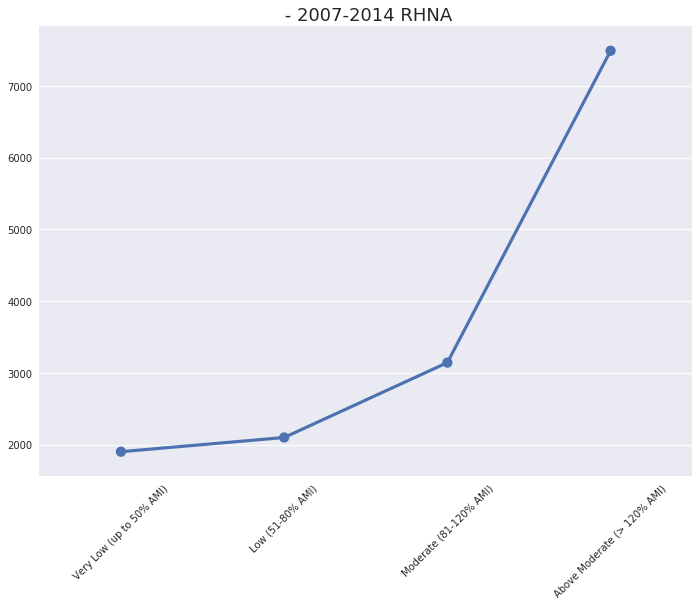

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


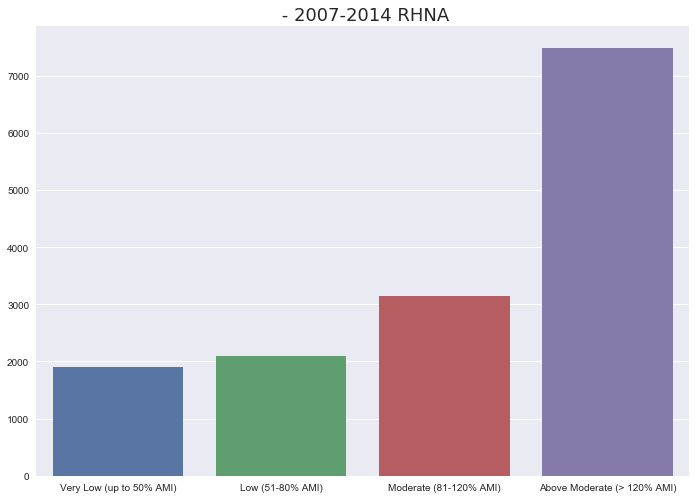

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Lucida Grande'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


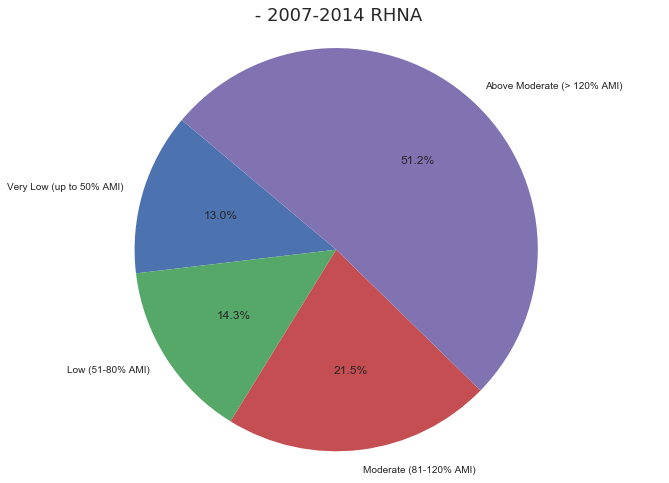

Building Permits Issued 2007-December, 2013


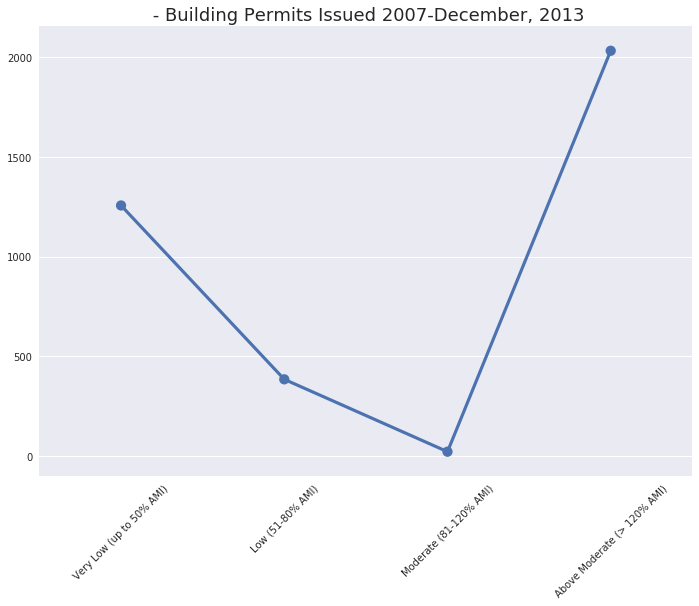

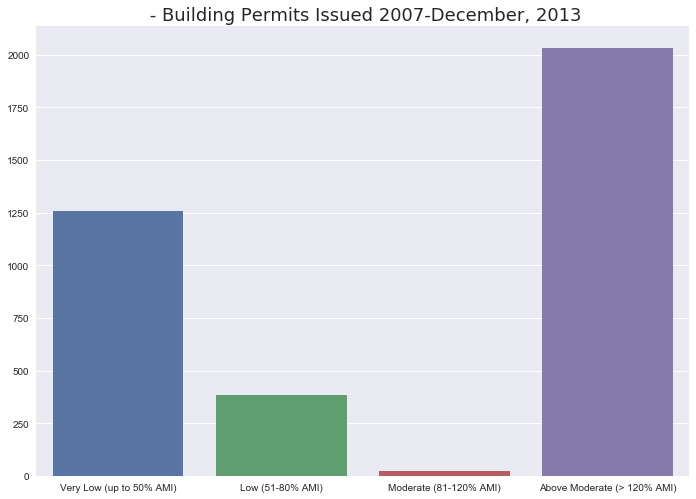

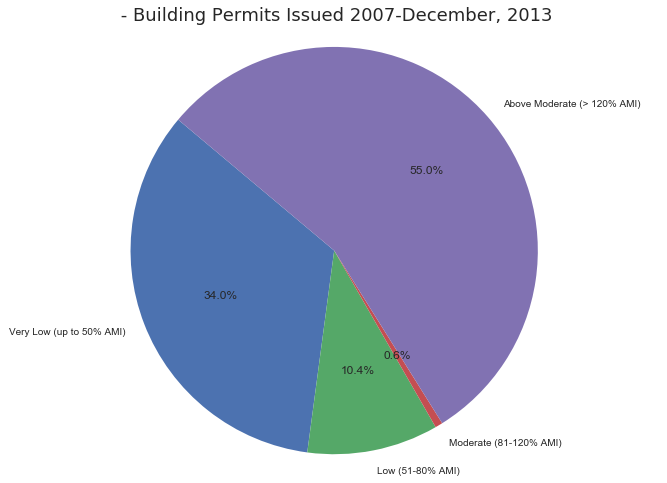

Owner Households


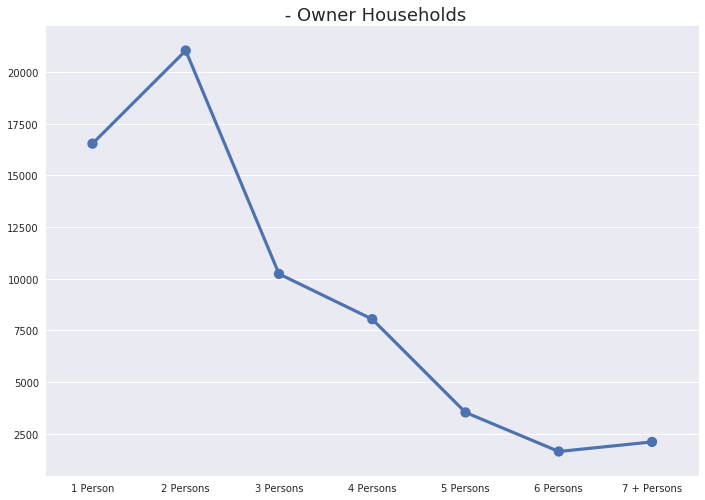

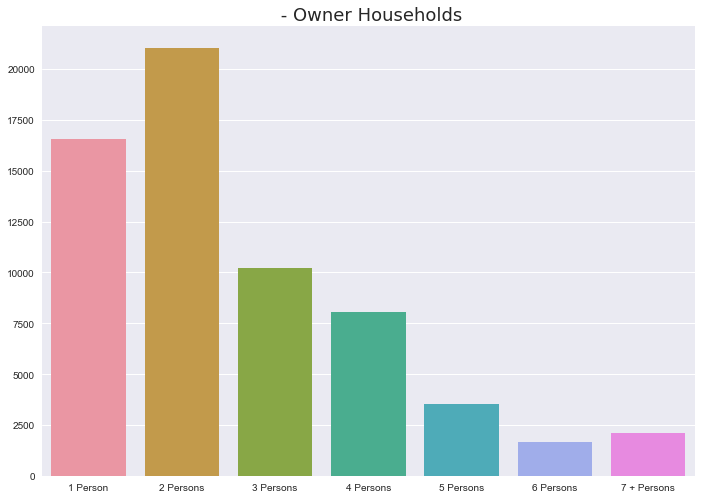

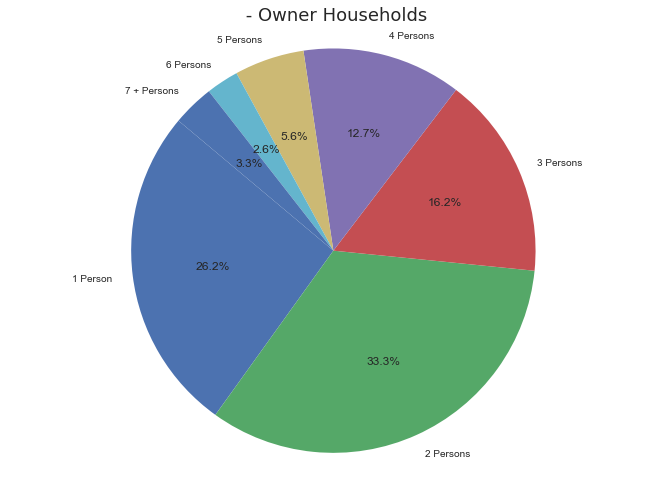

Renter Households


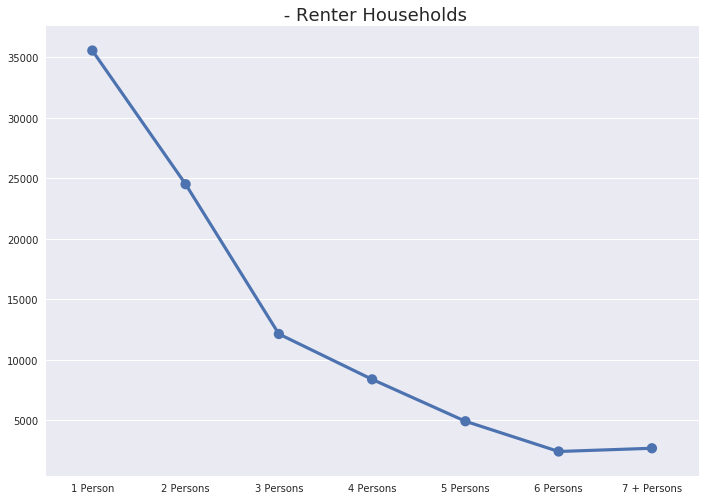

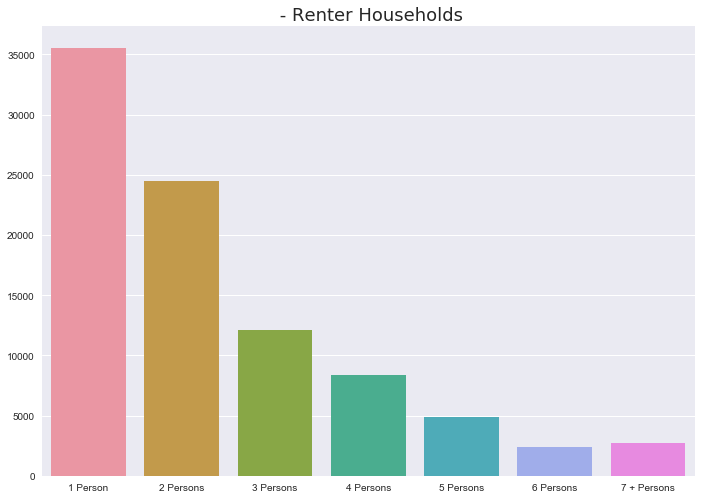

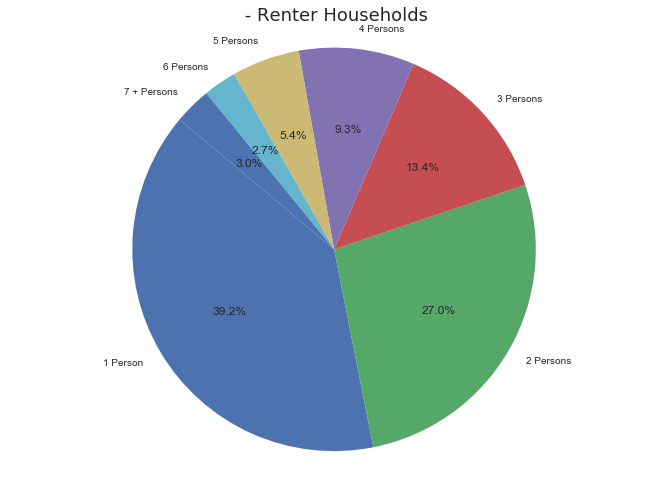

Total Households


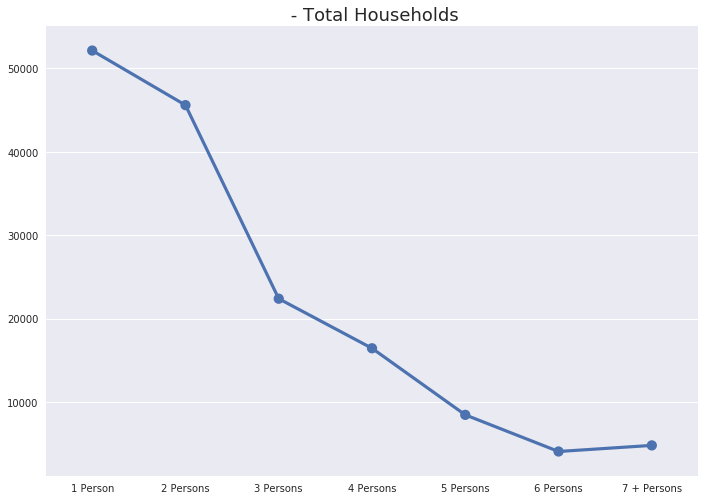

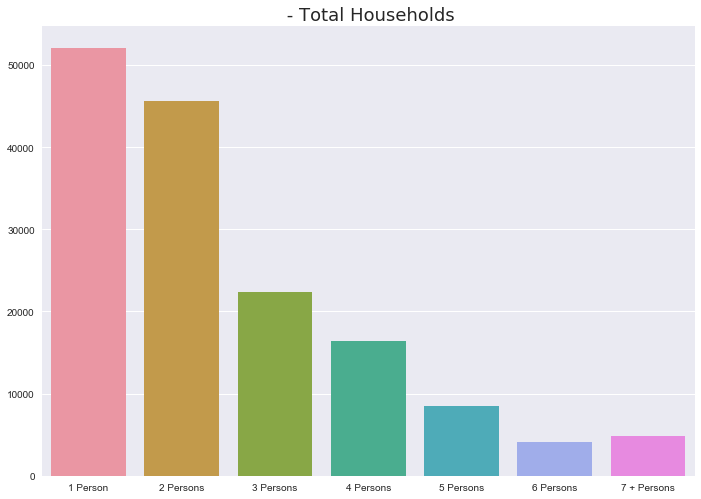

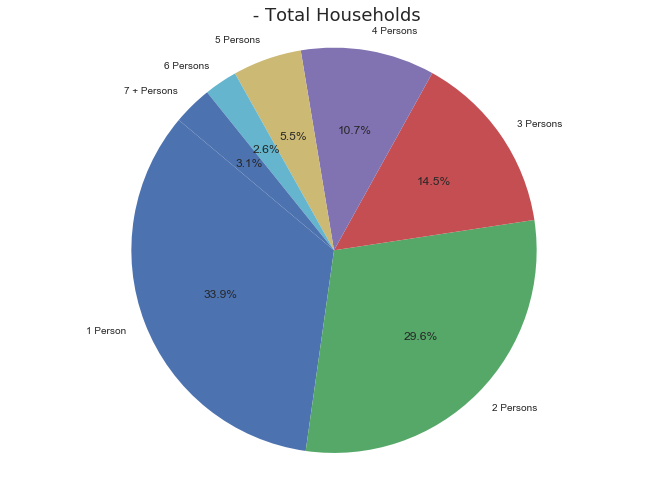

Average Household Size


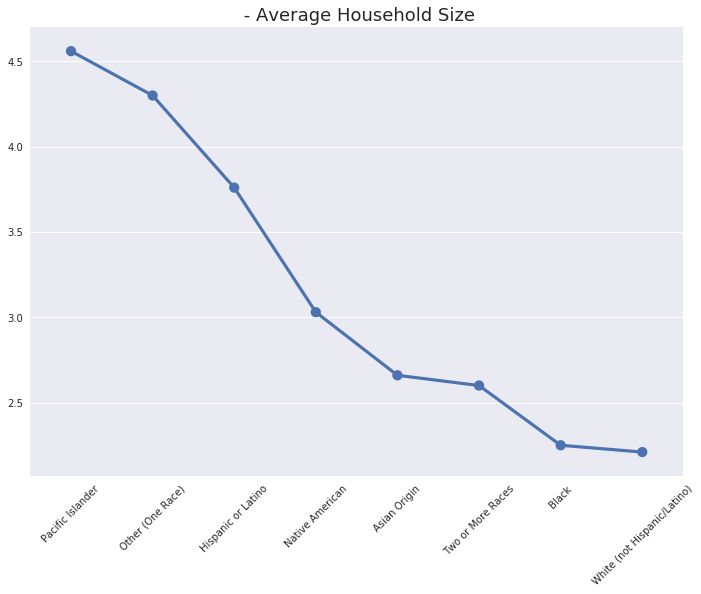

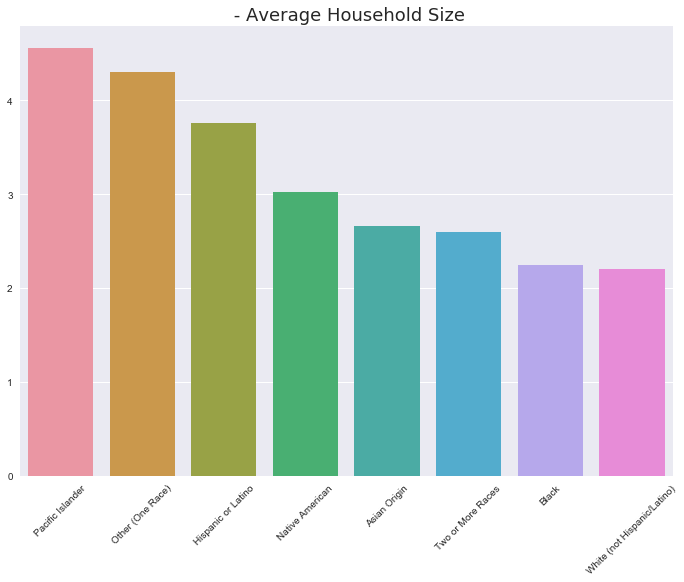

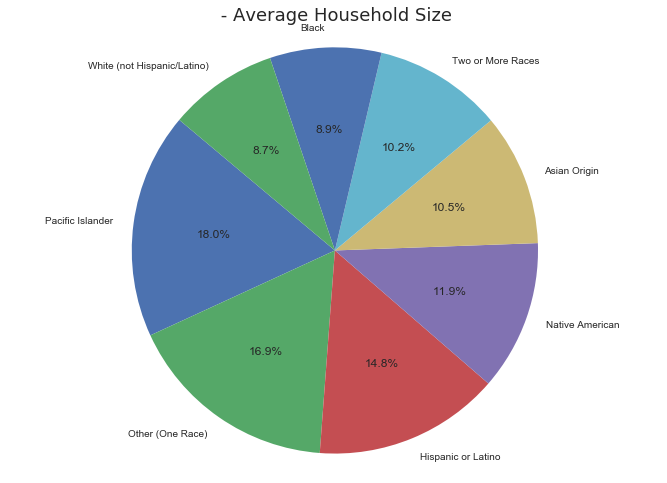

INCOME LIMITSHousehold Size 1


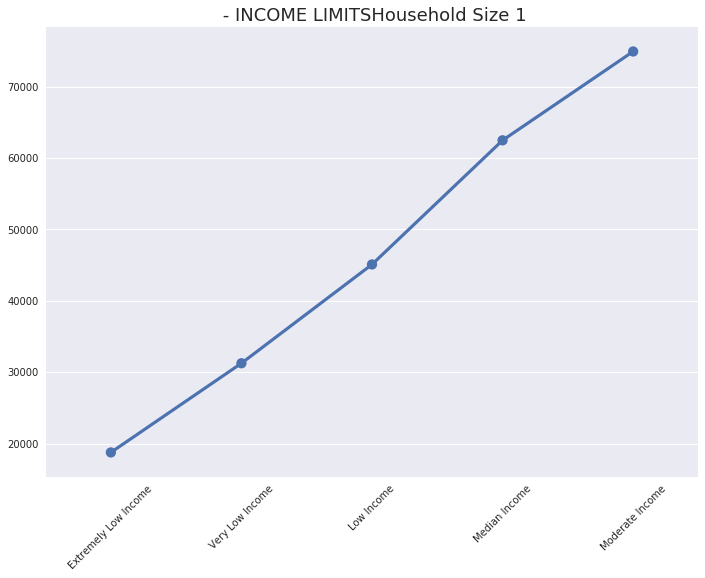

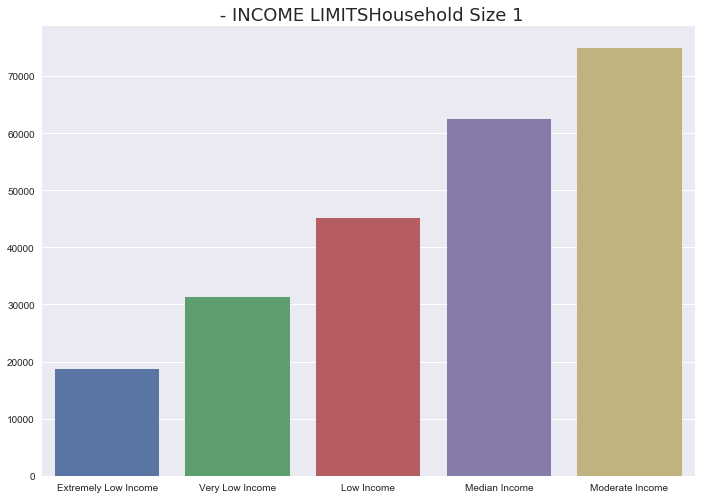

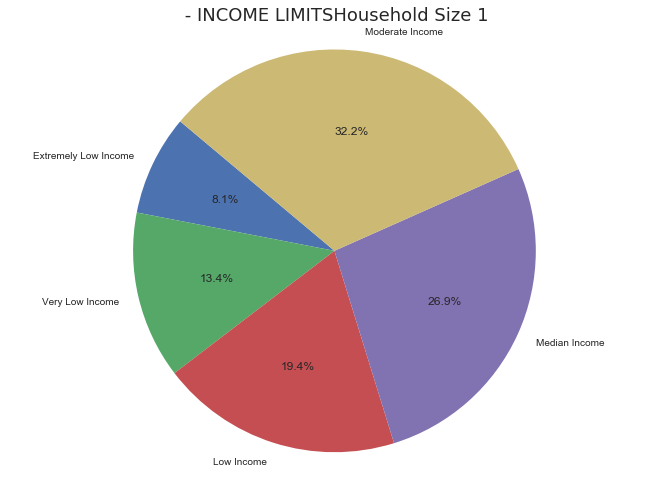

INCOME LIMITSHousehold Size 2


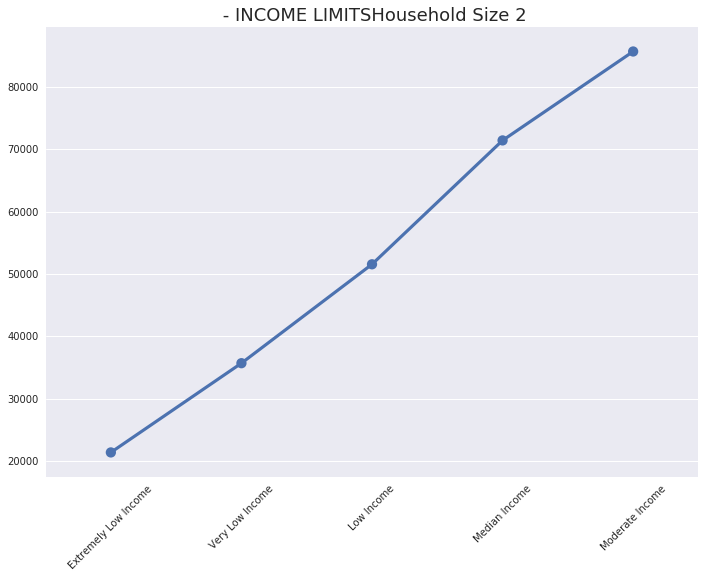

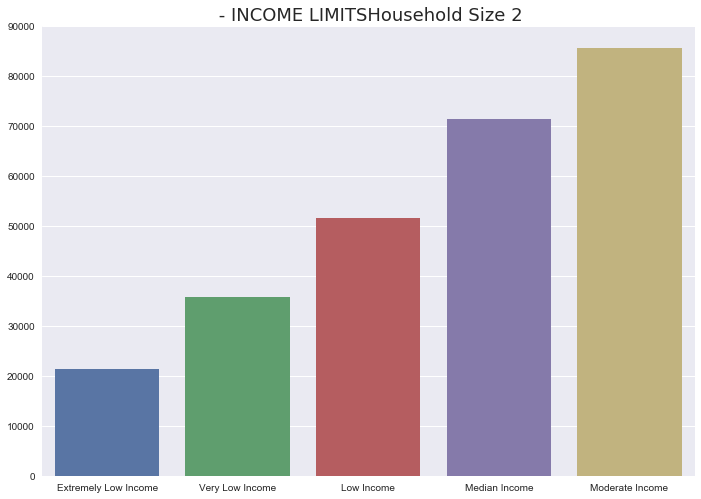

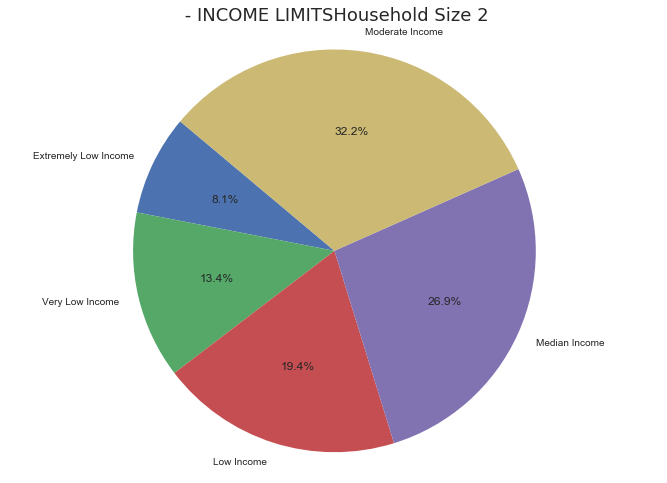

INCOME LIMITSHousehold Size 3


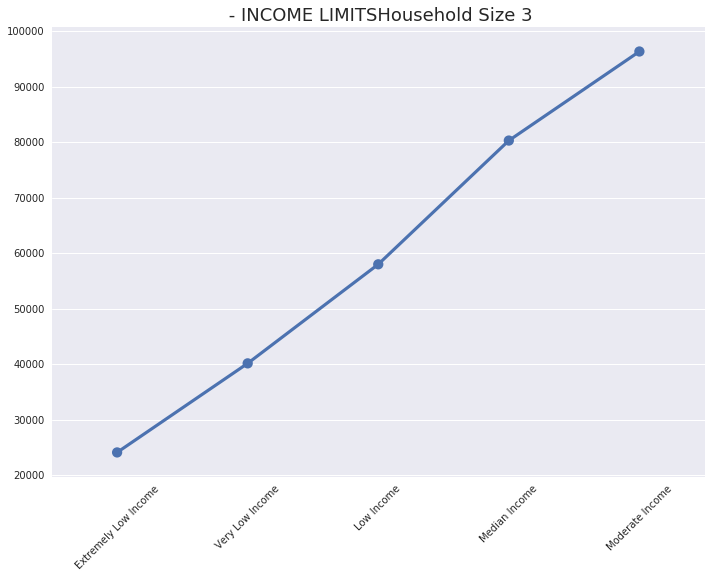

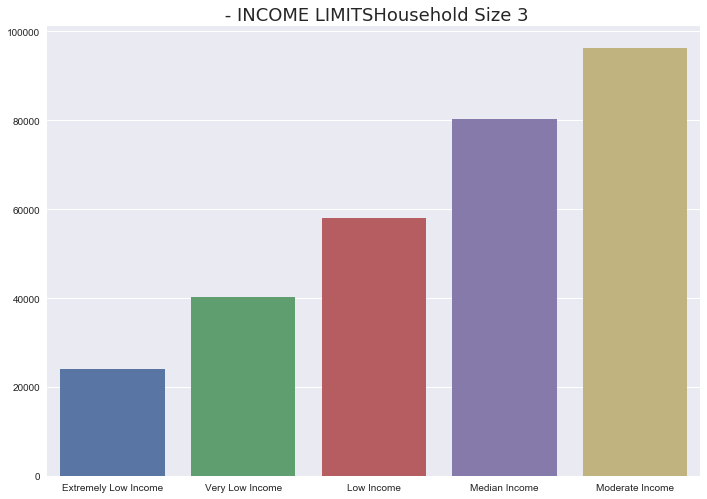

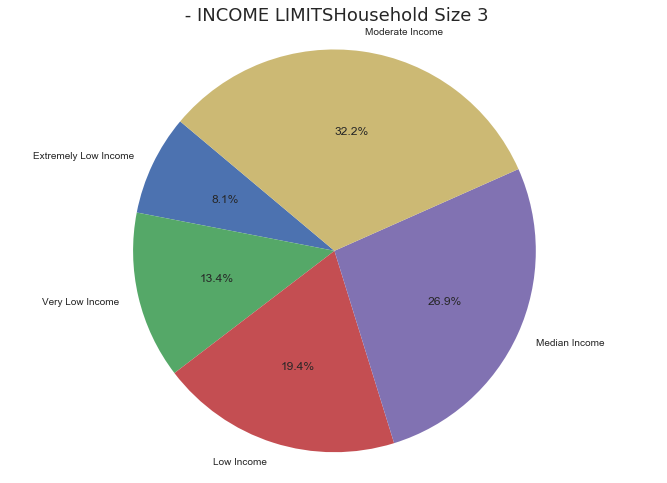

INCOME LIMITSHousehold Size 4


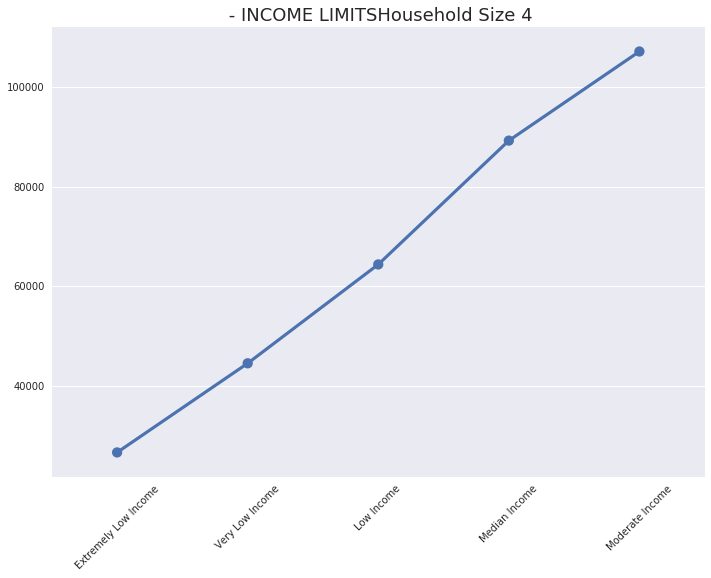

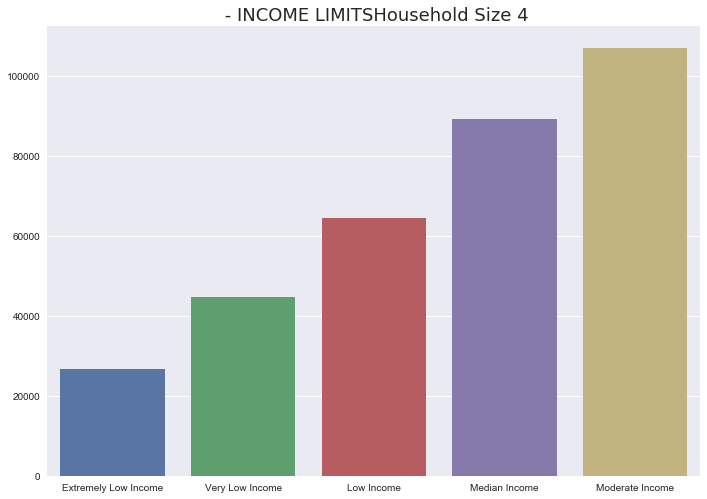

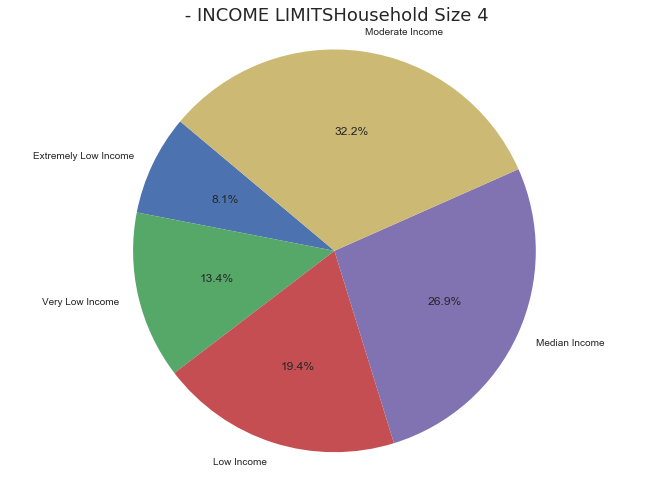

INCOME LIMITSHousehold Size 5


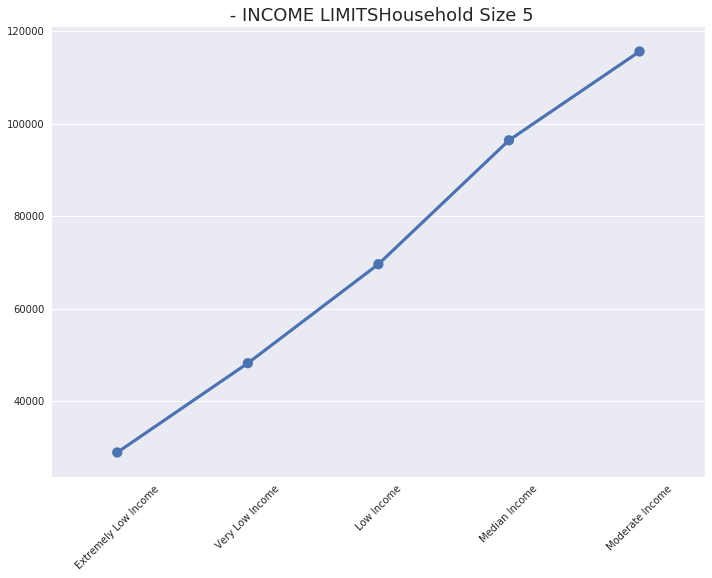

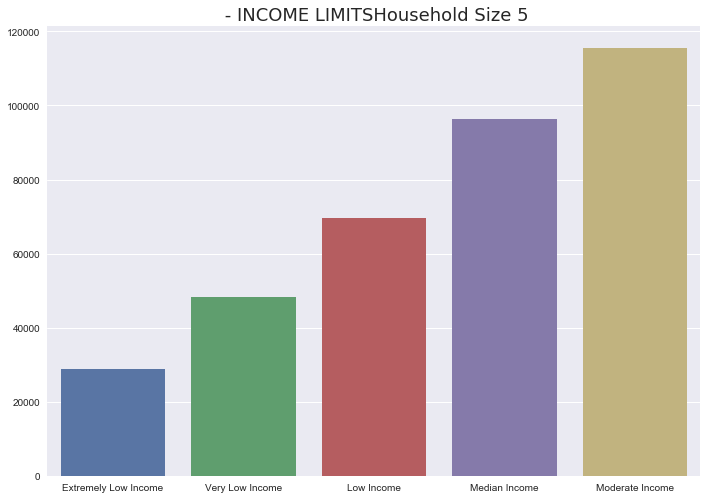

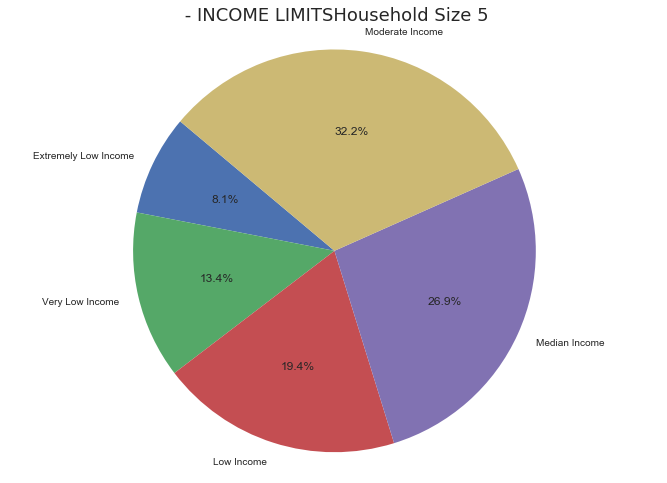

INCOME LIMITSHousehold Size 6


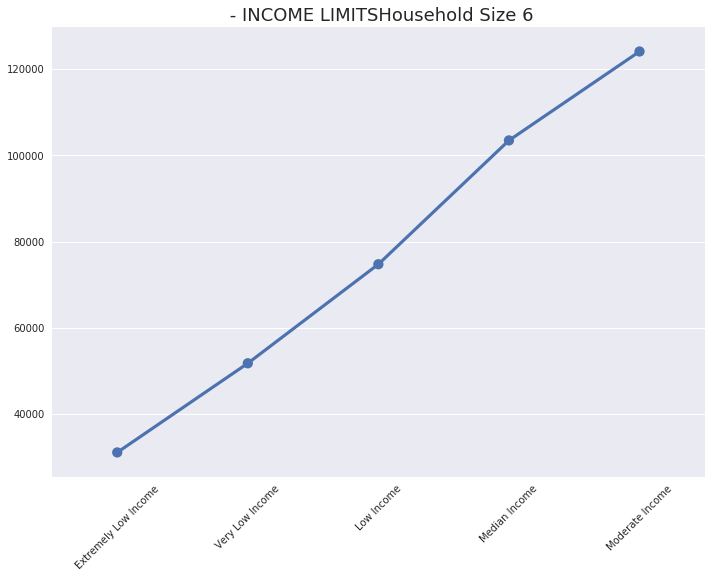

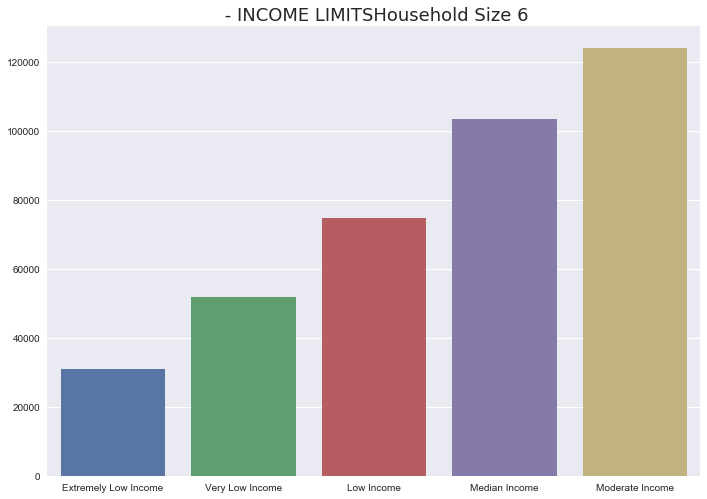

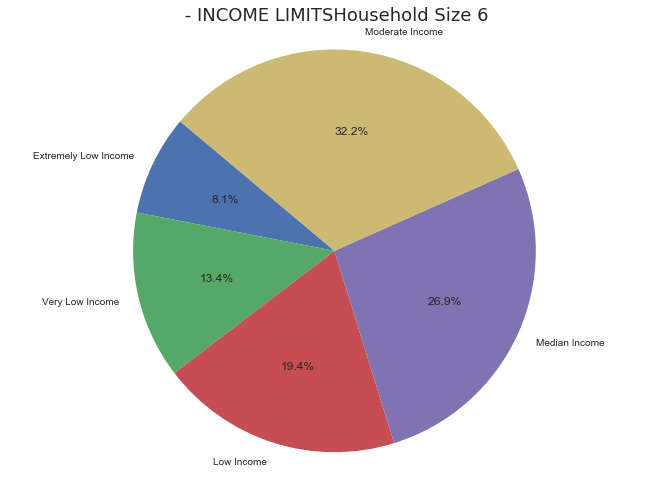

INCOME LIMITSHousehold Size 7


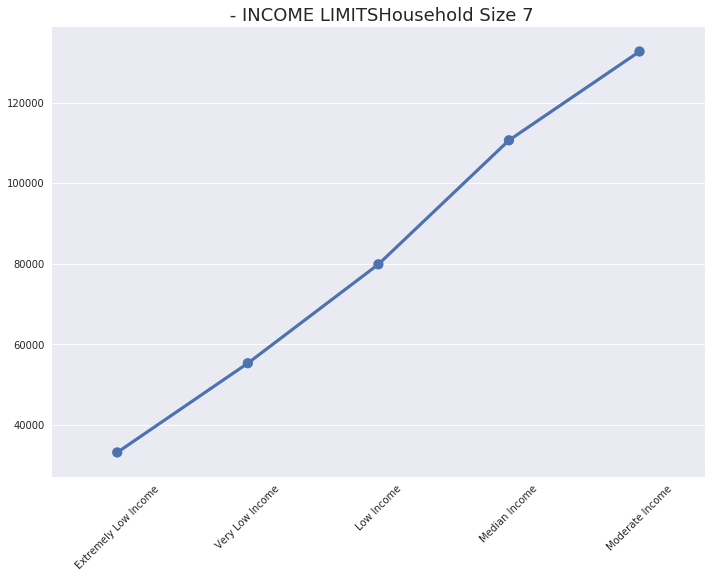

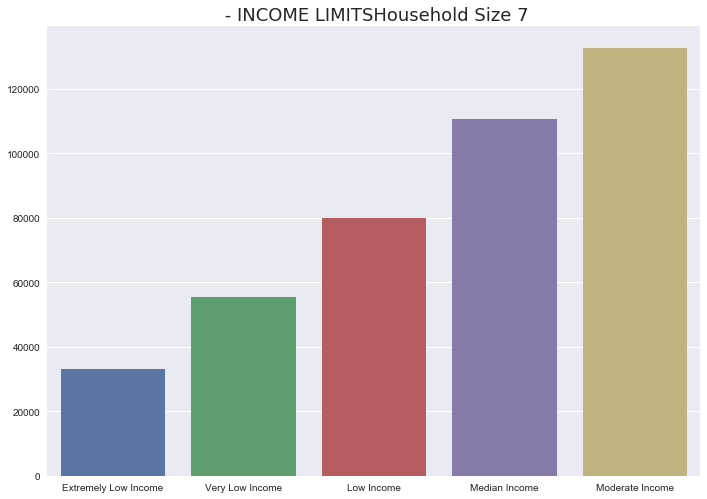

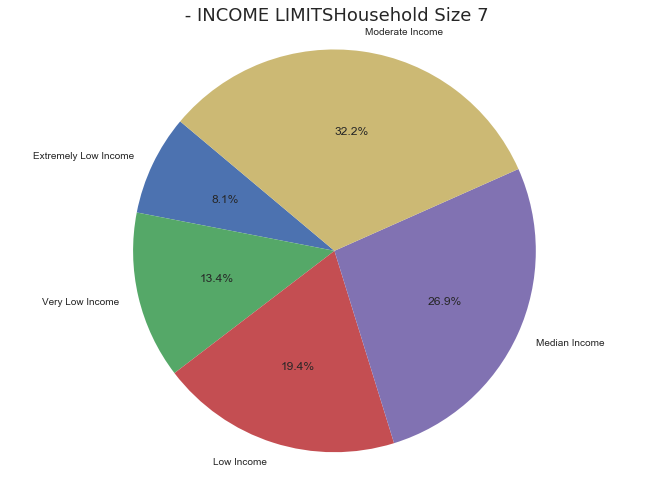

INCOME LIMITSHousehold Size 8


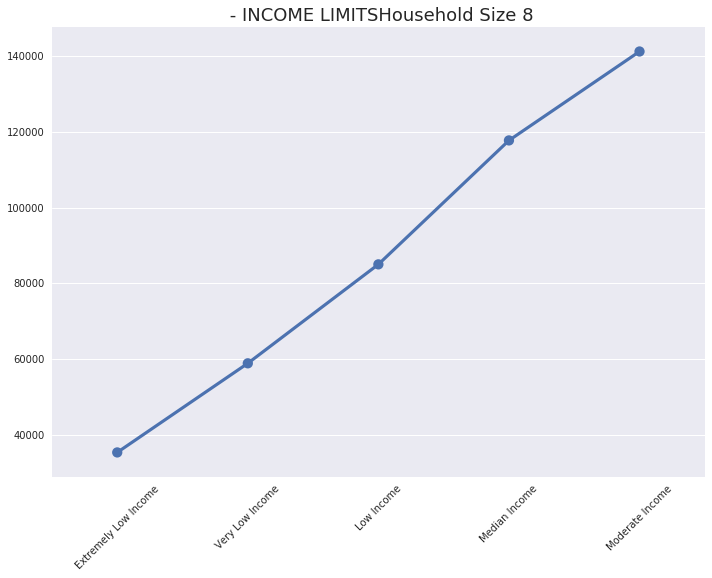

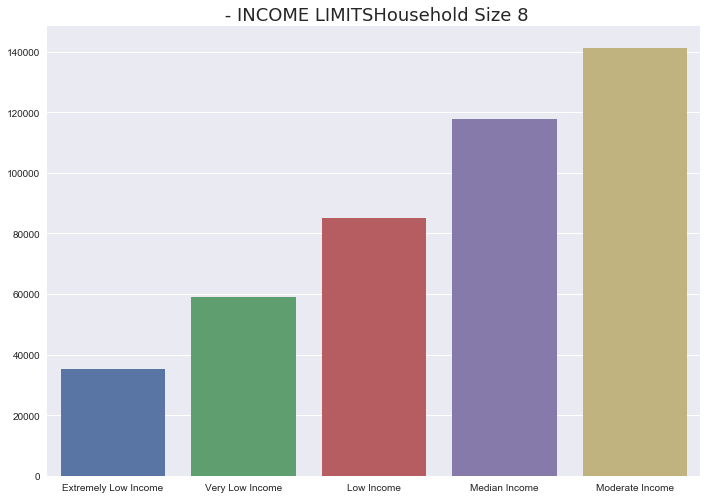

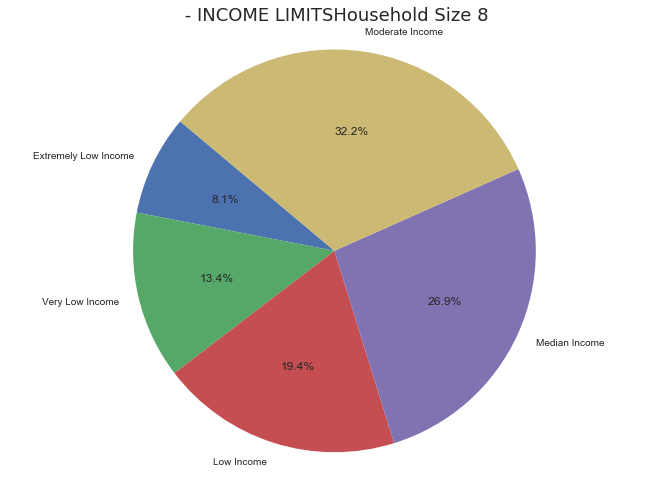

Oakland 1990


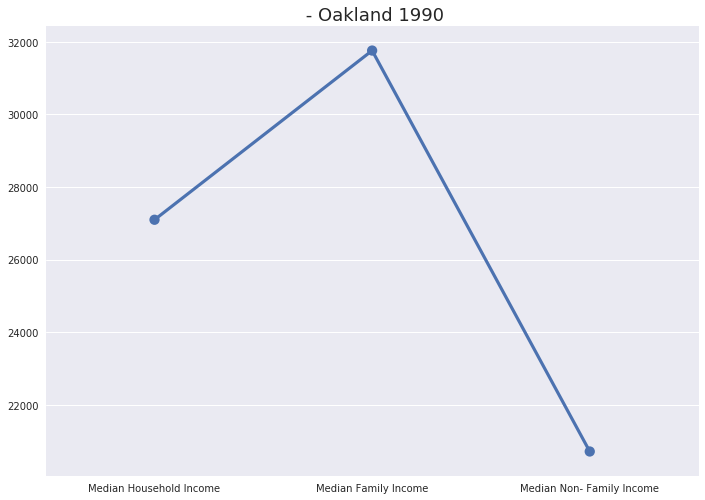

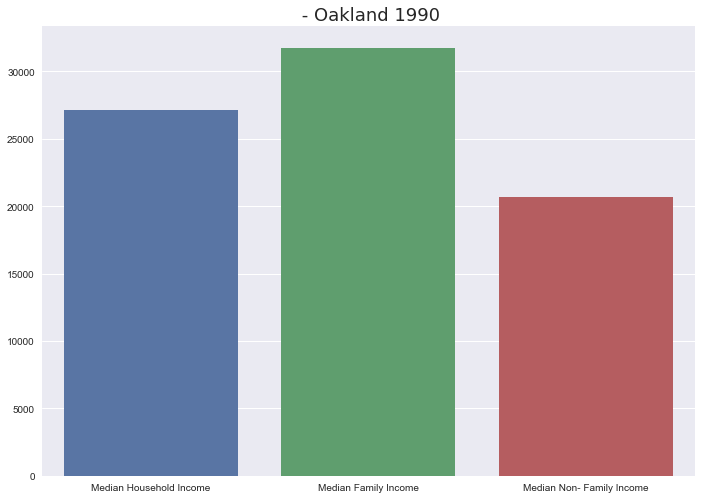

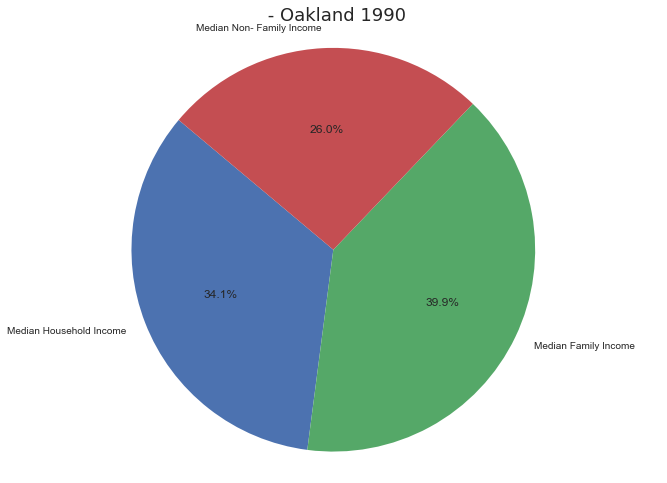

Oakland 2000


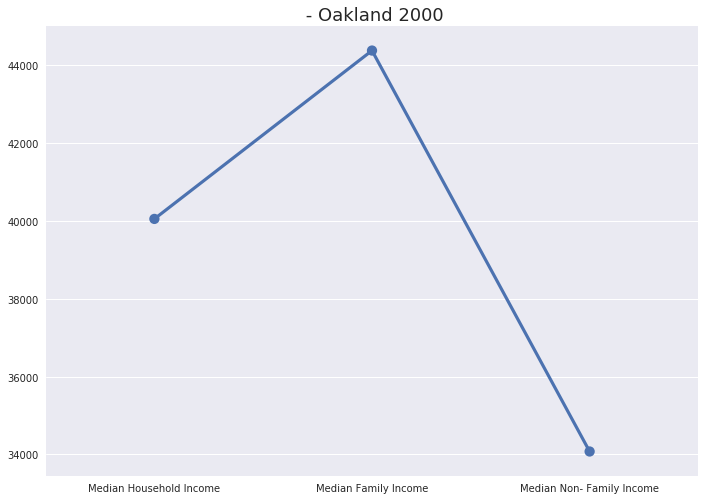

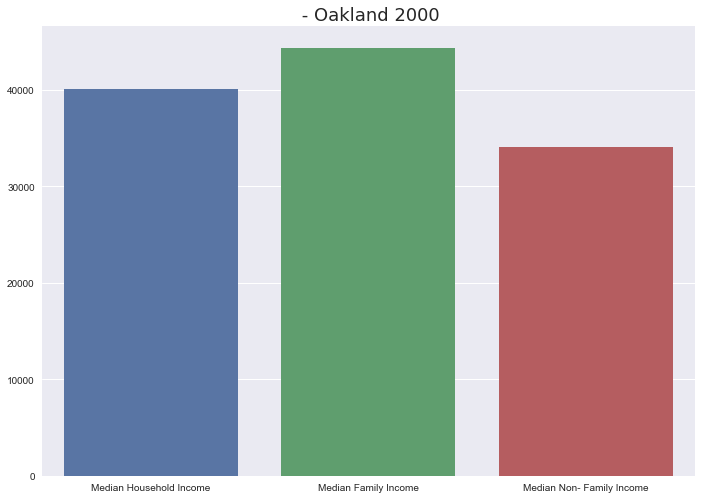

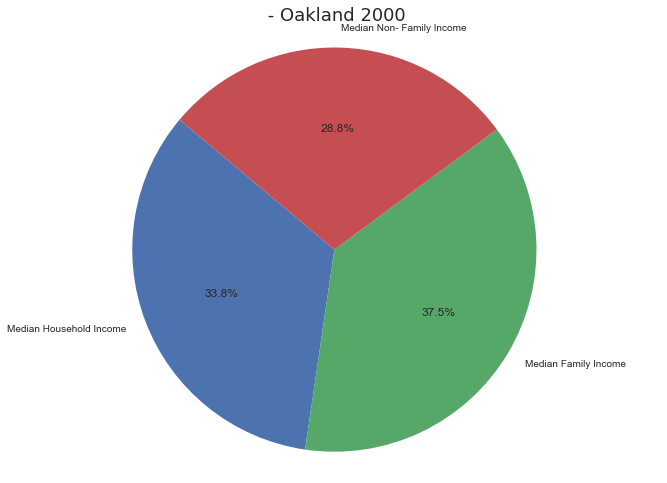

Alameda County 1990


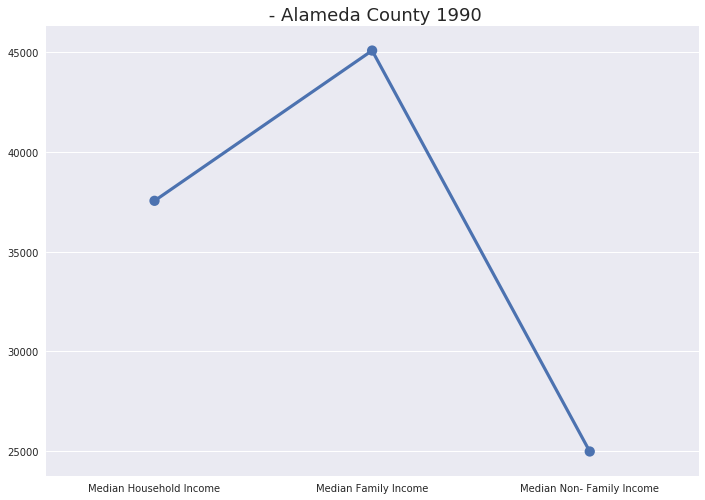

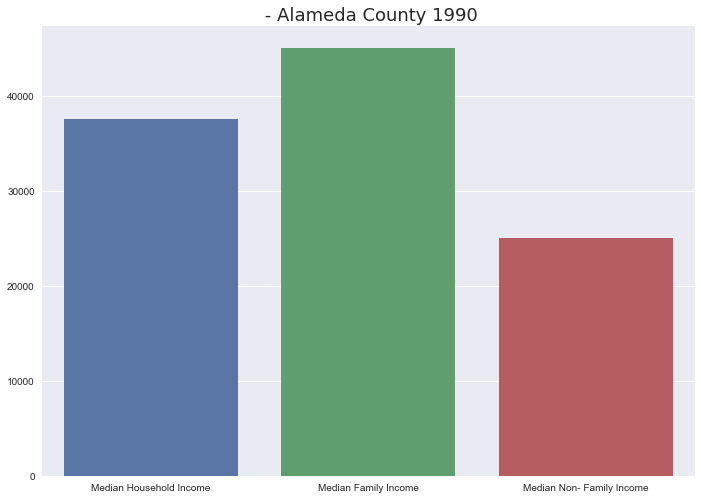

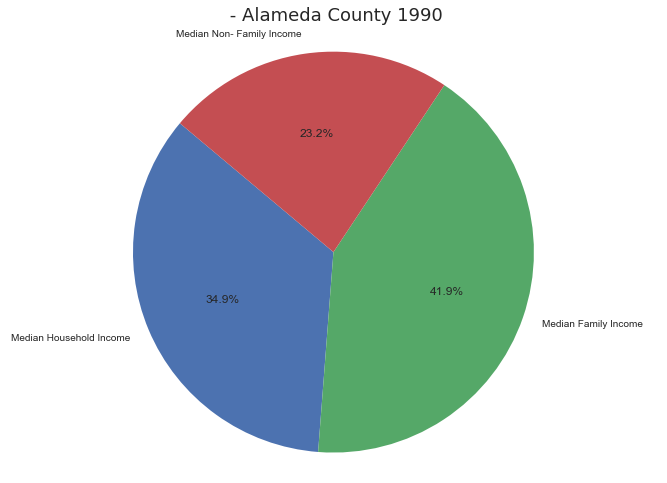

Alameda County 2000


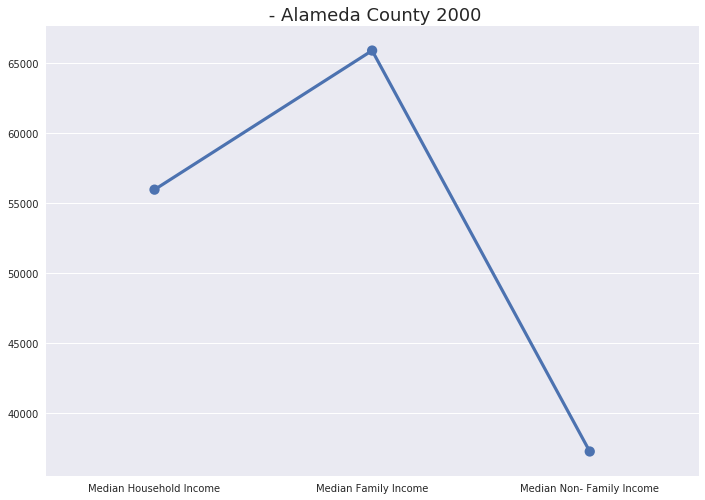

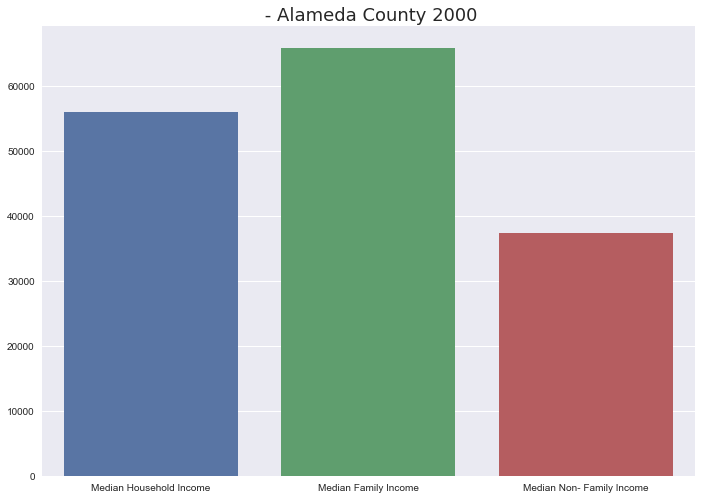

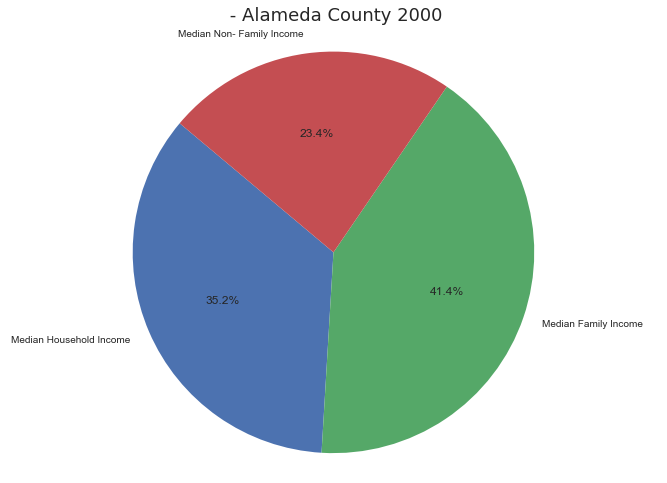

Renters 1990 Number


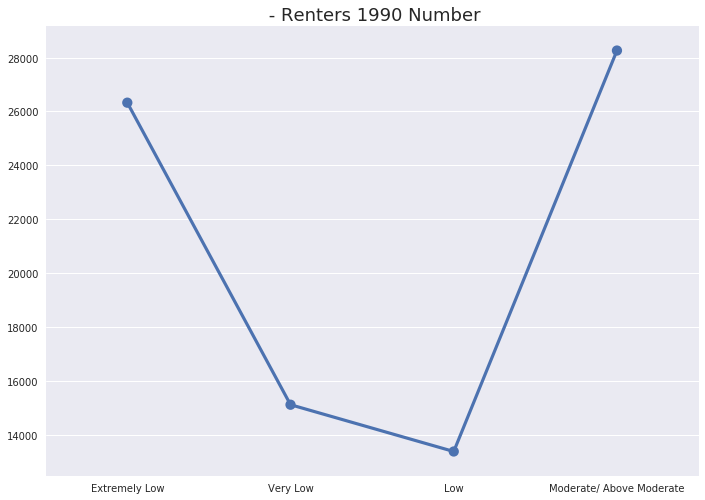

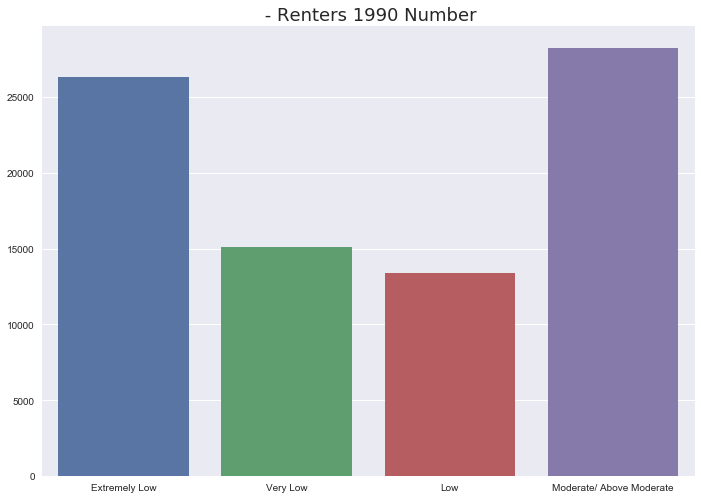

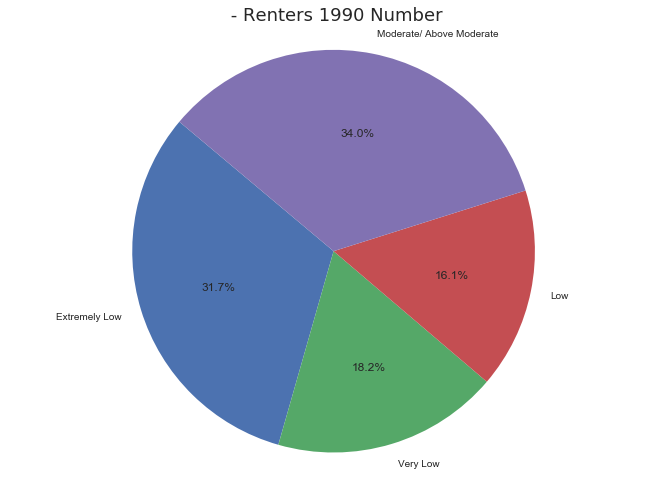

Renters 2000 Number


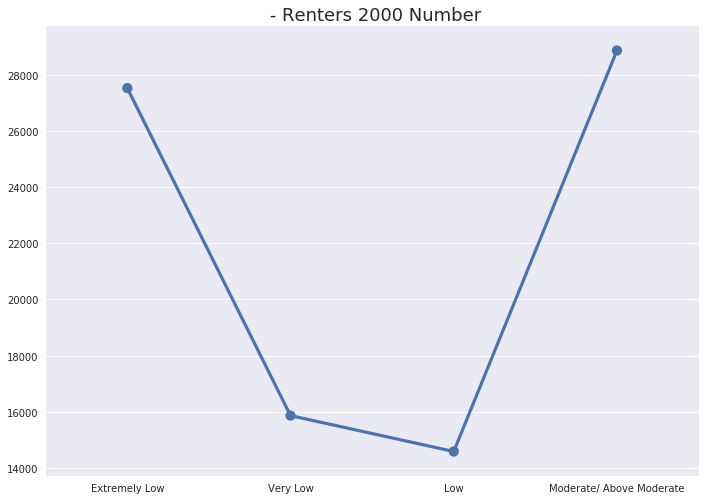

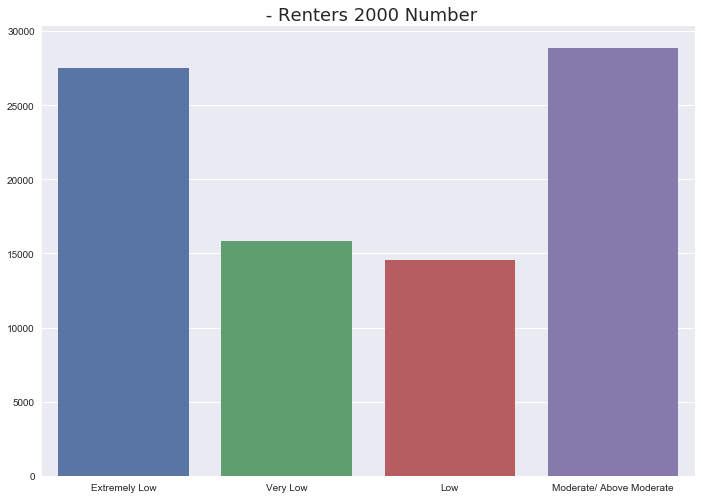

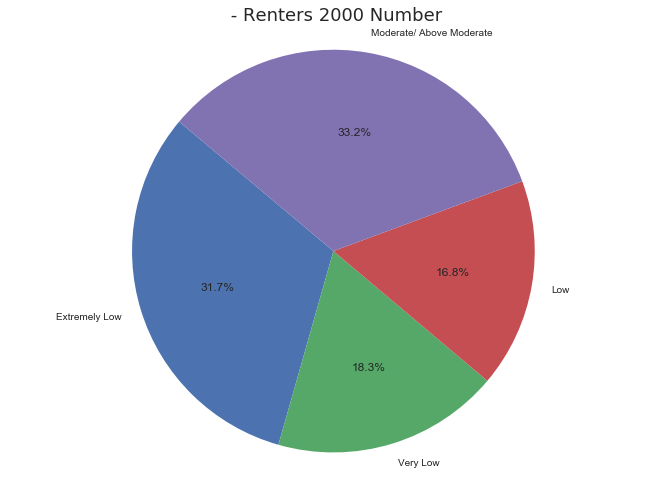

Owners 1990 Number


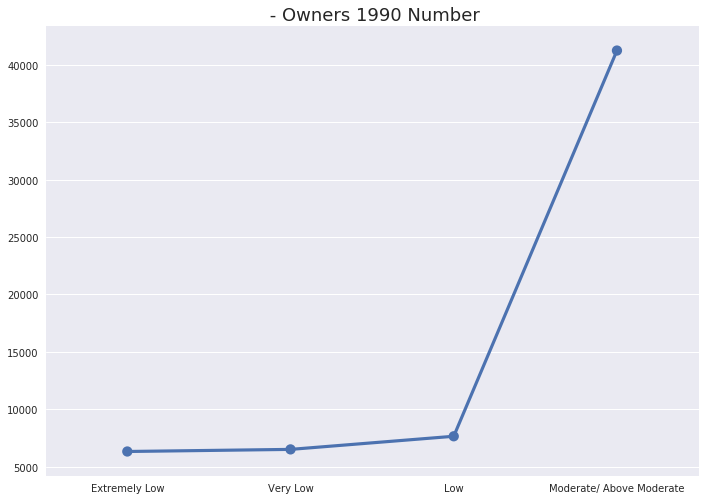

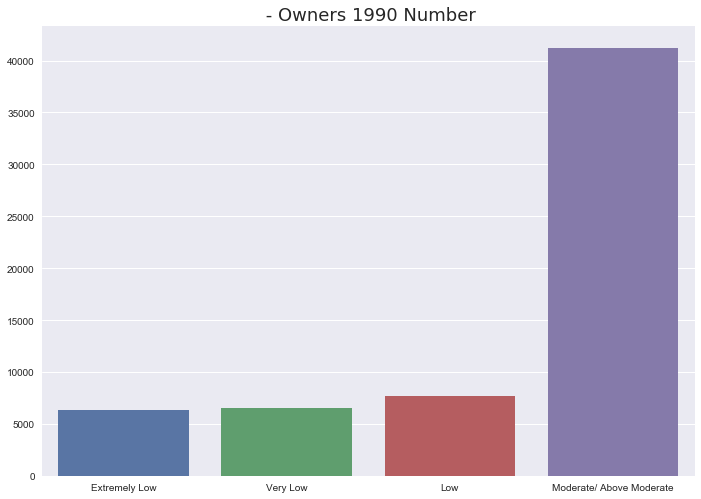

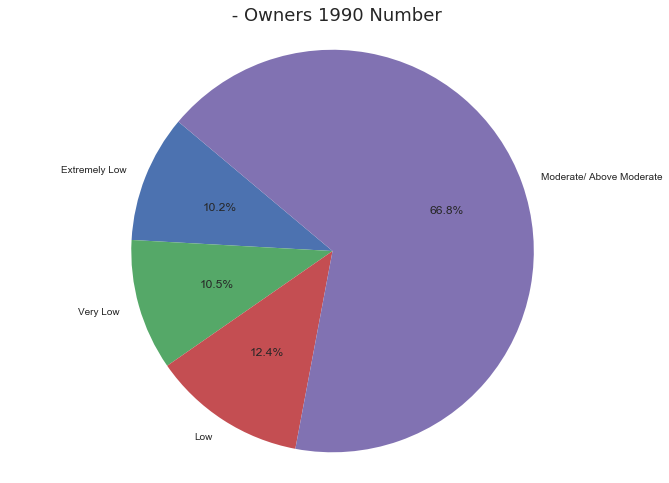

Owners 2000 Number


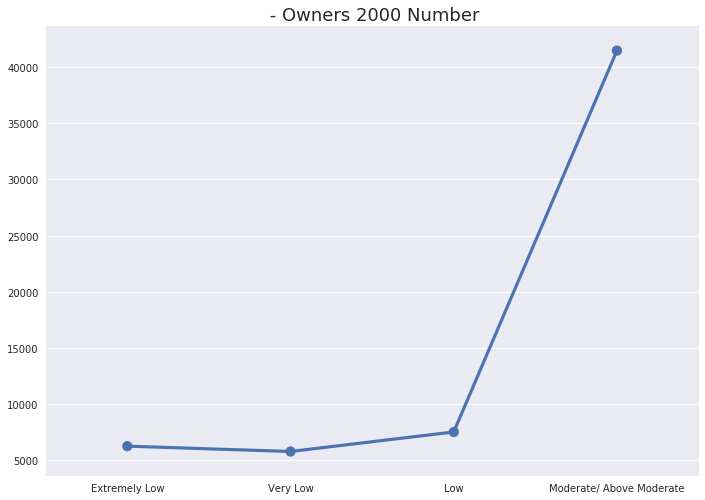

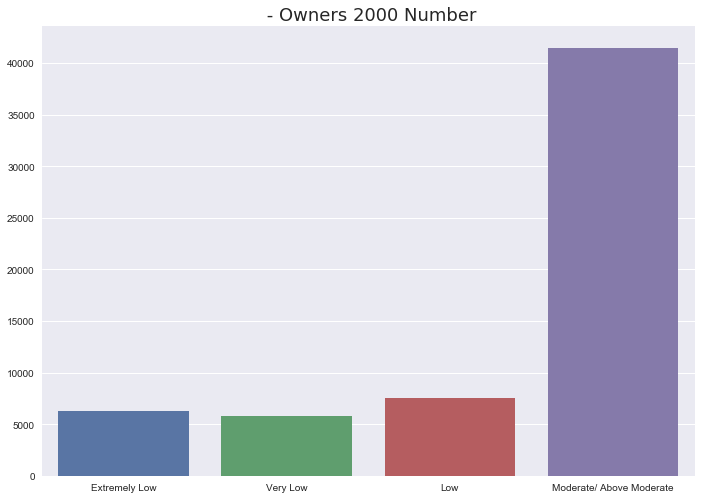

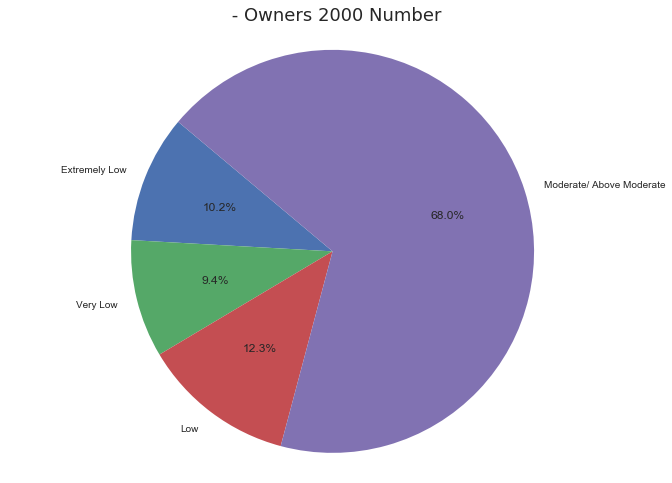

Renter Number


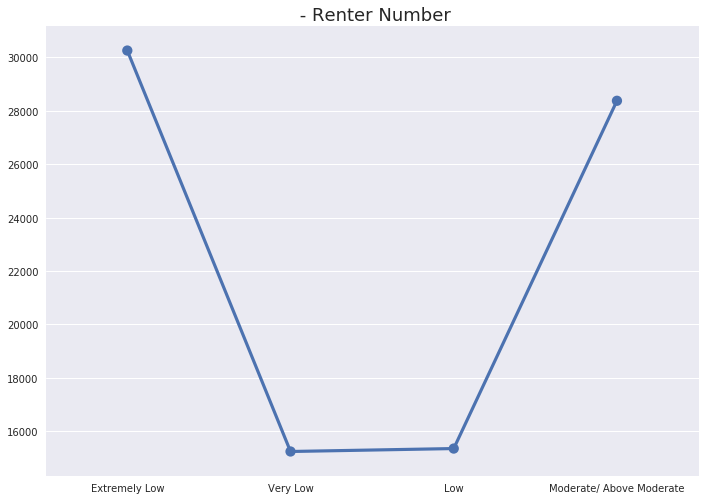

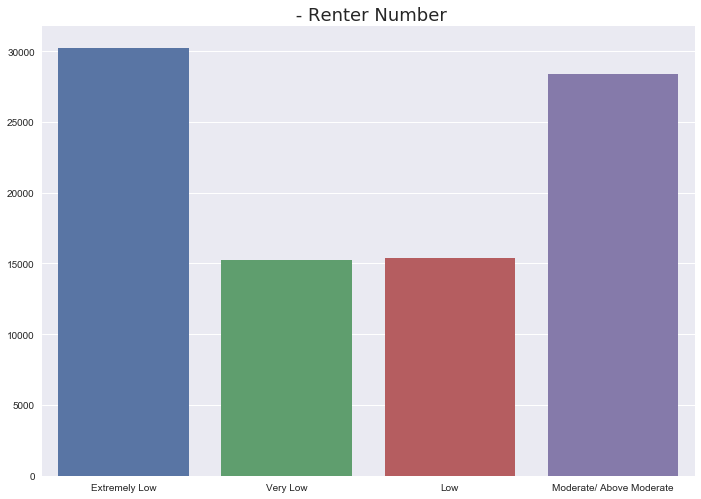

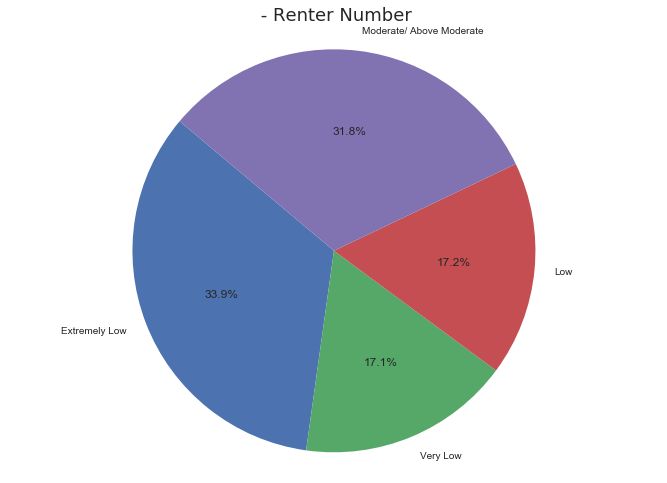

Owner Number


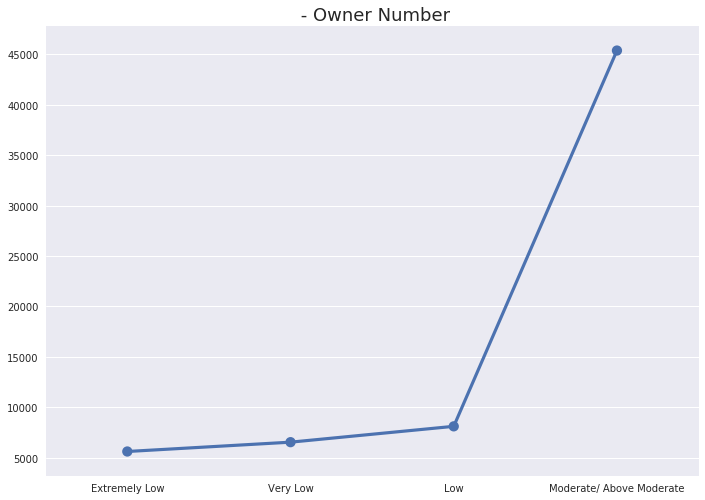

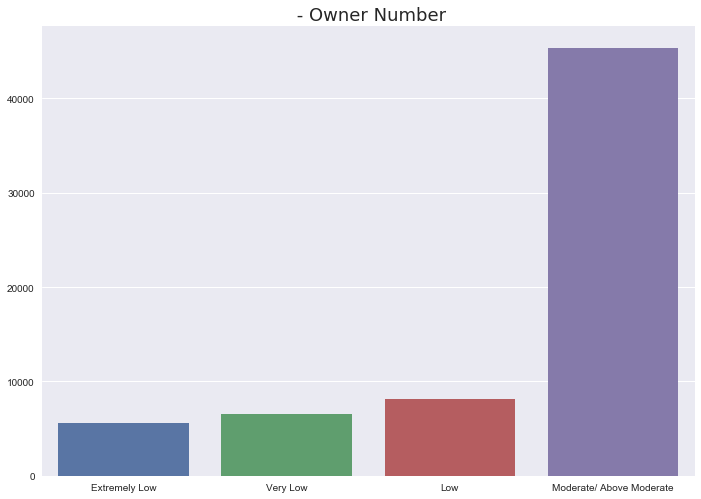

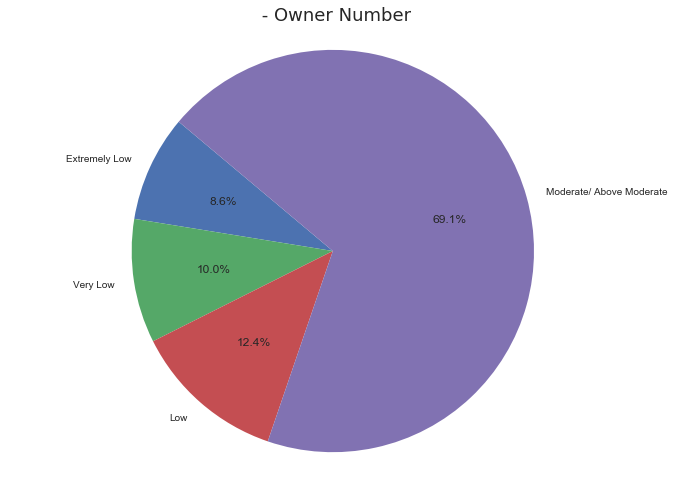

Income


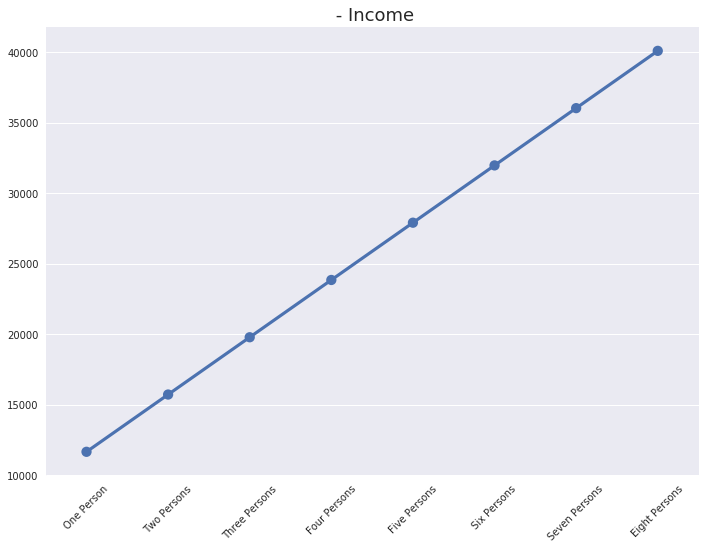

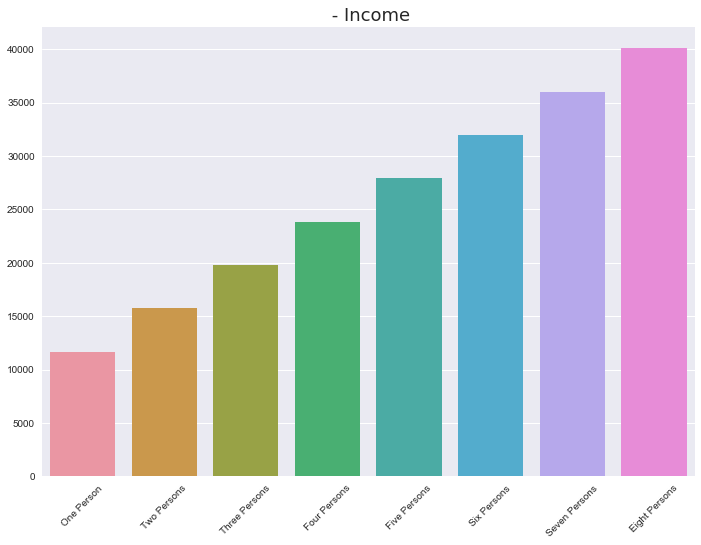

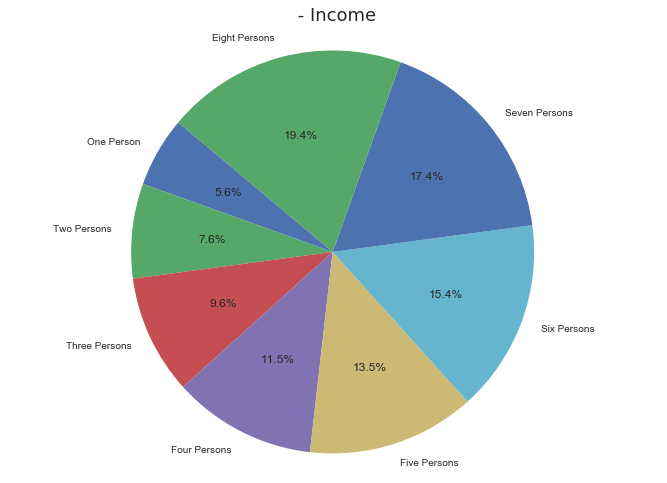

Number of Units


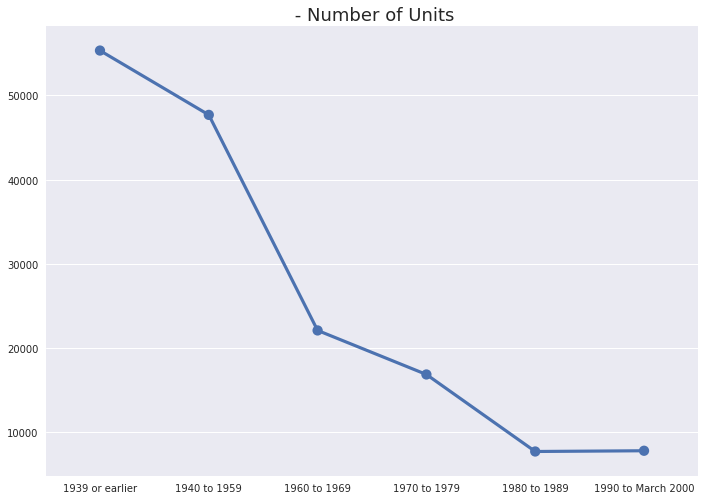

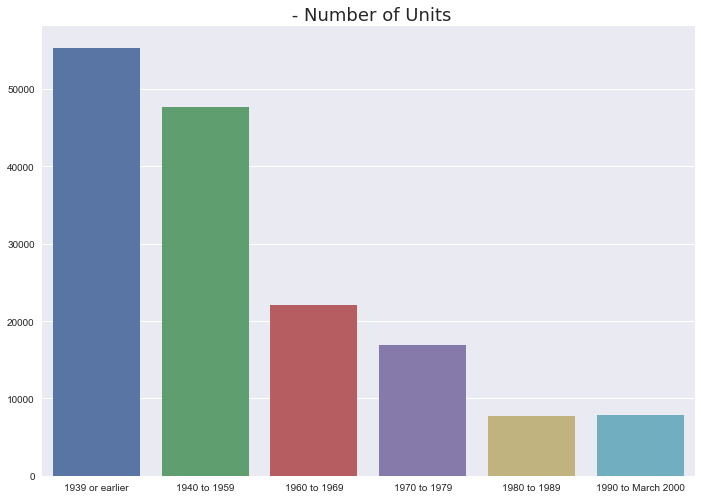

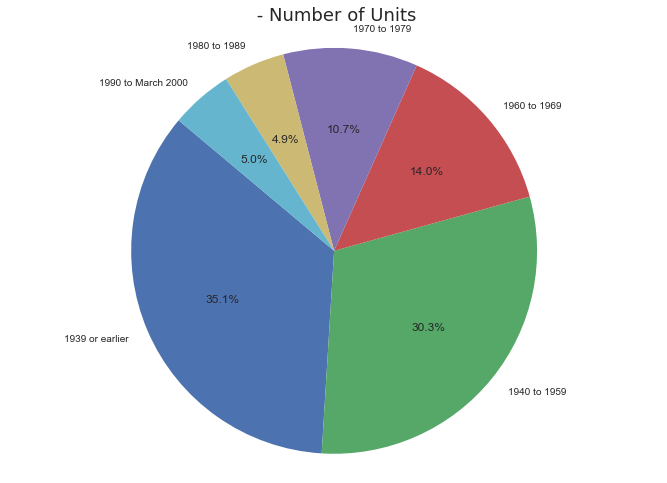

Median Home Sales Price2000


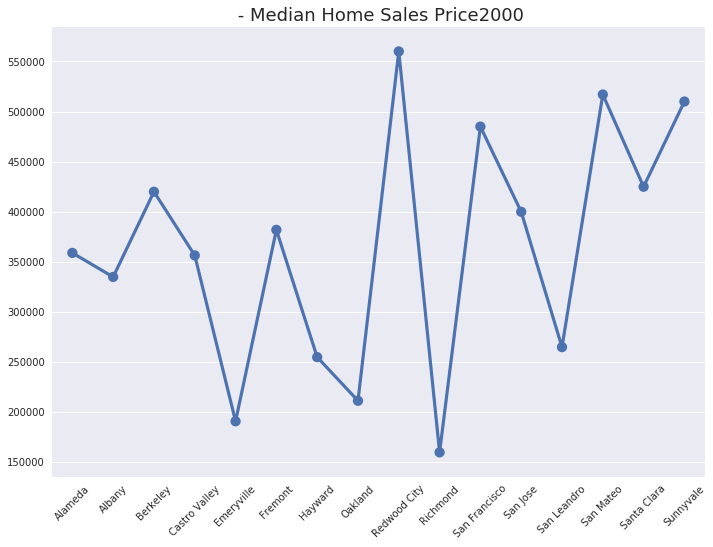

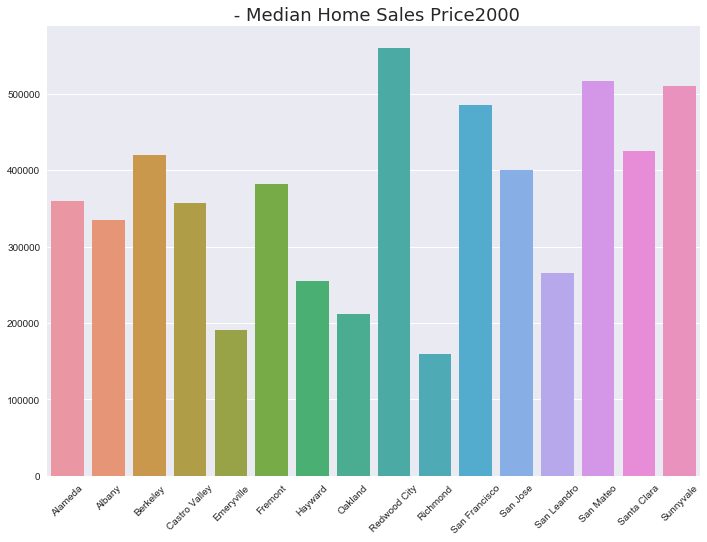

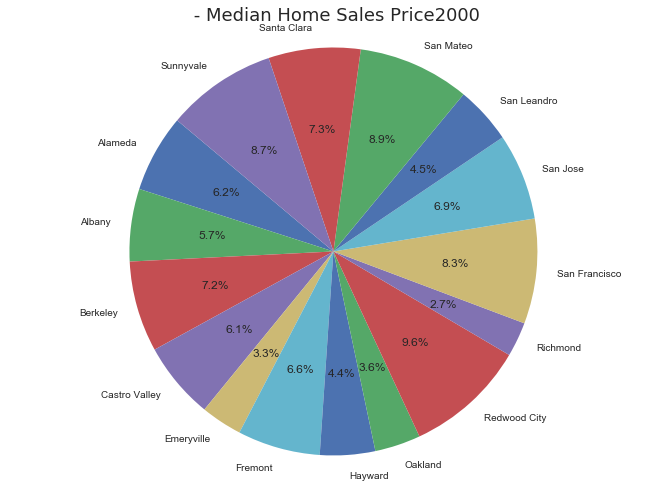

Median Home Sales Price2008


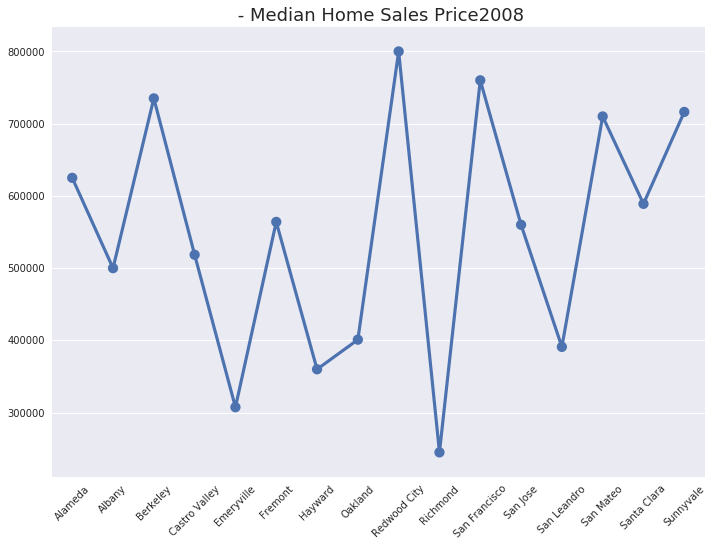

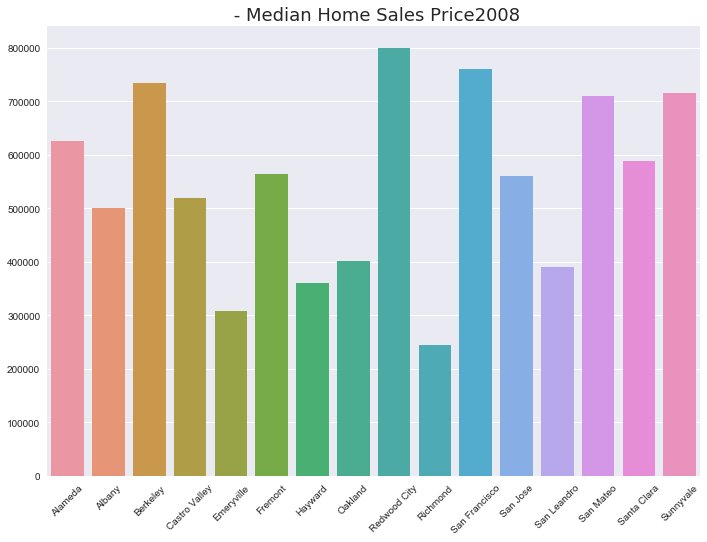

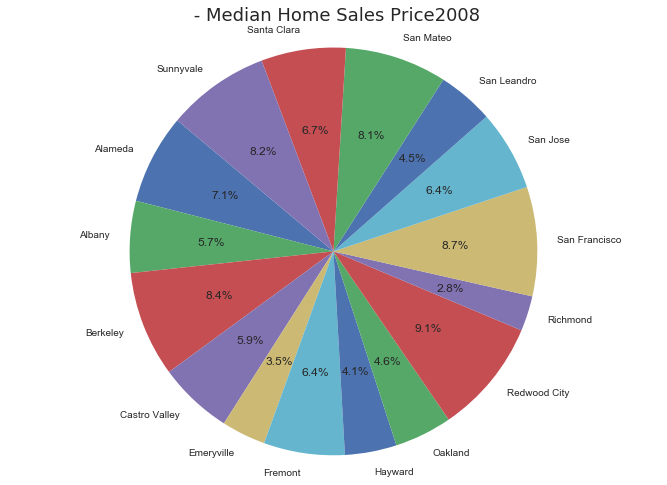

Median Home Sales Price2013


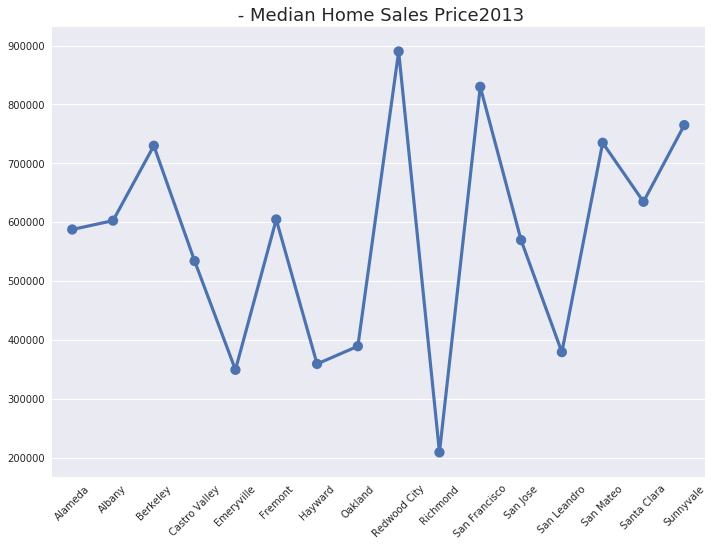

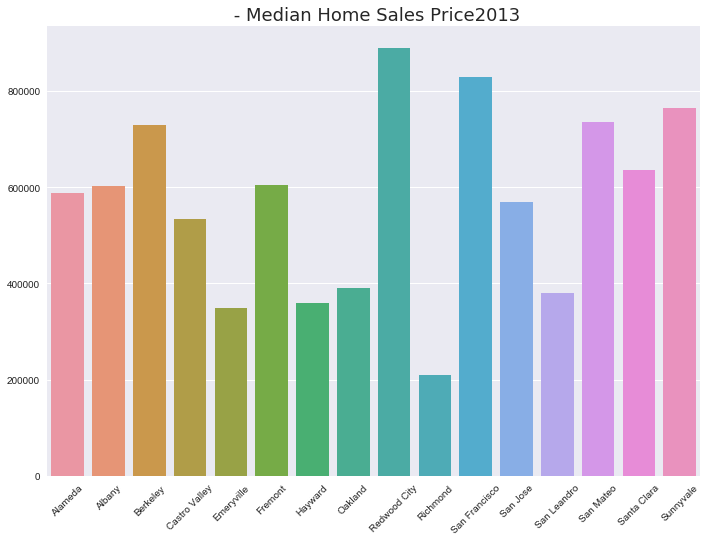

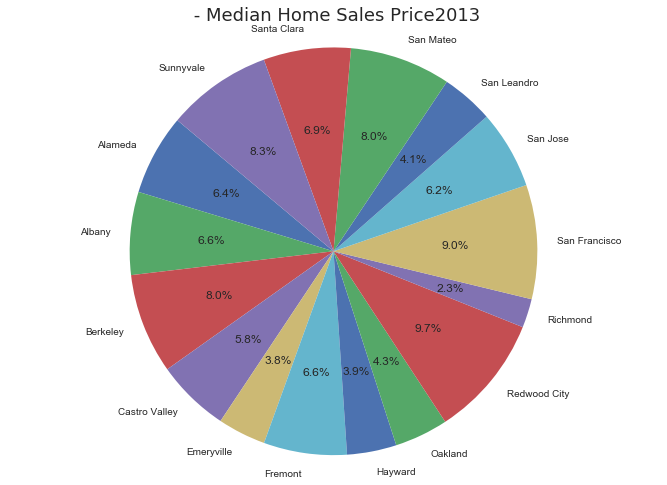

1990


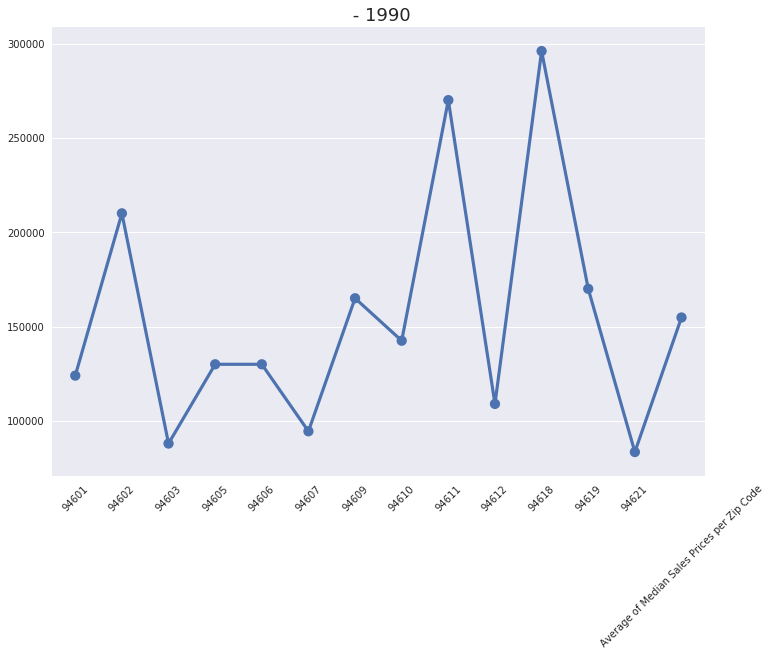

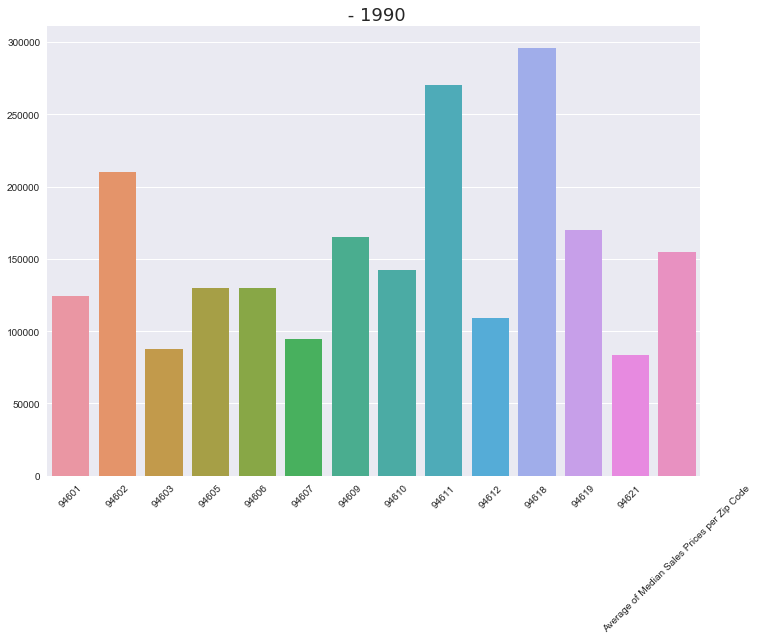

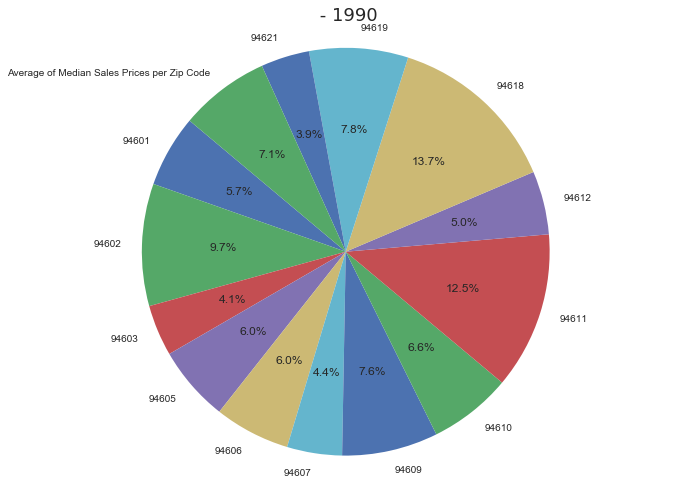

2000


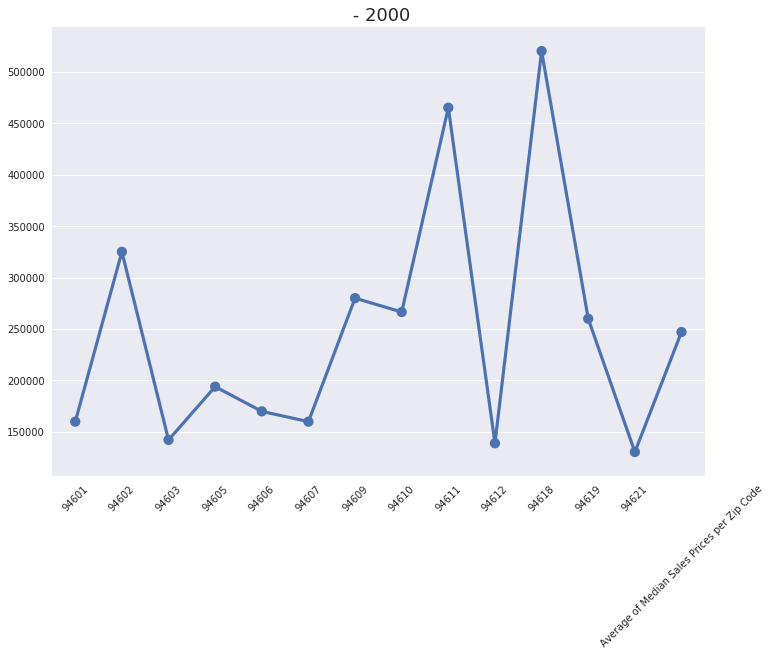

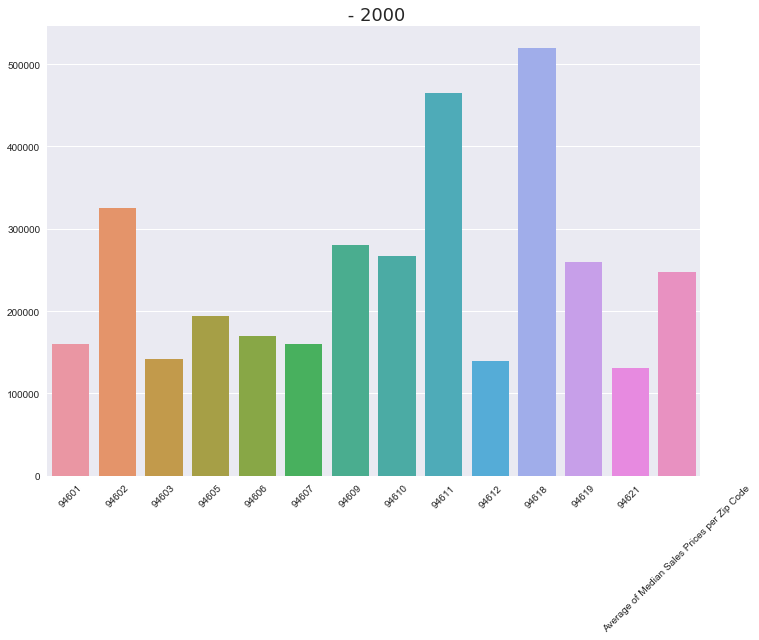

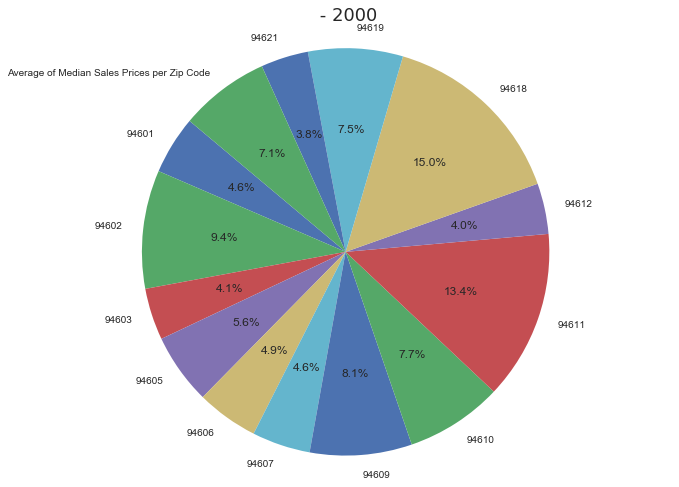

2013


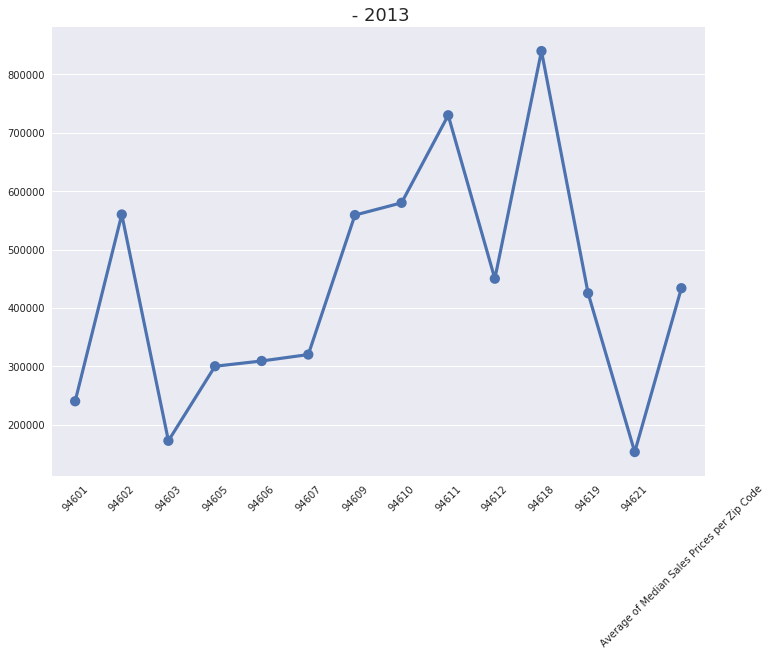

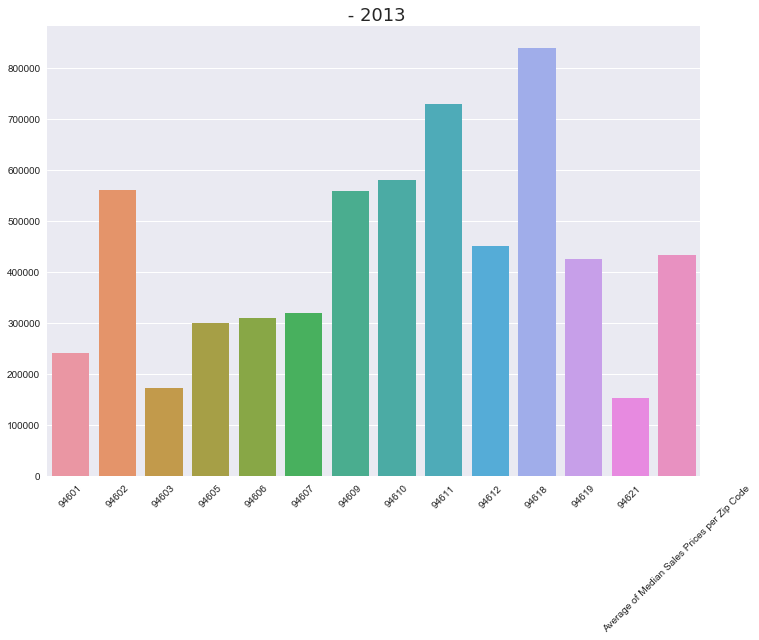

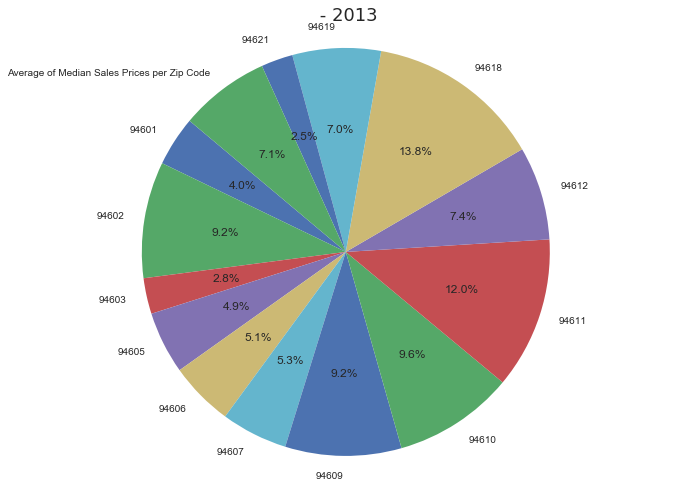

March 2013-population employed


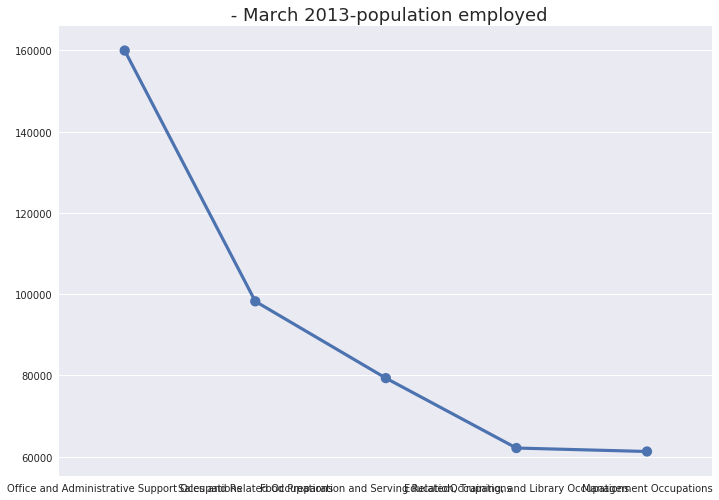

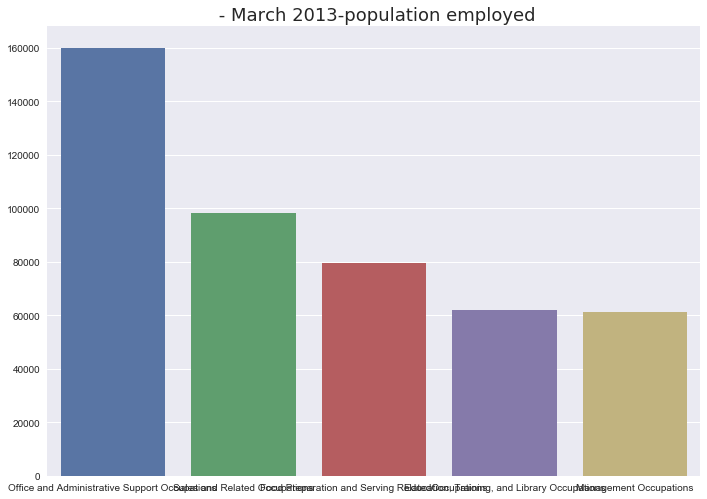

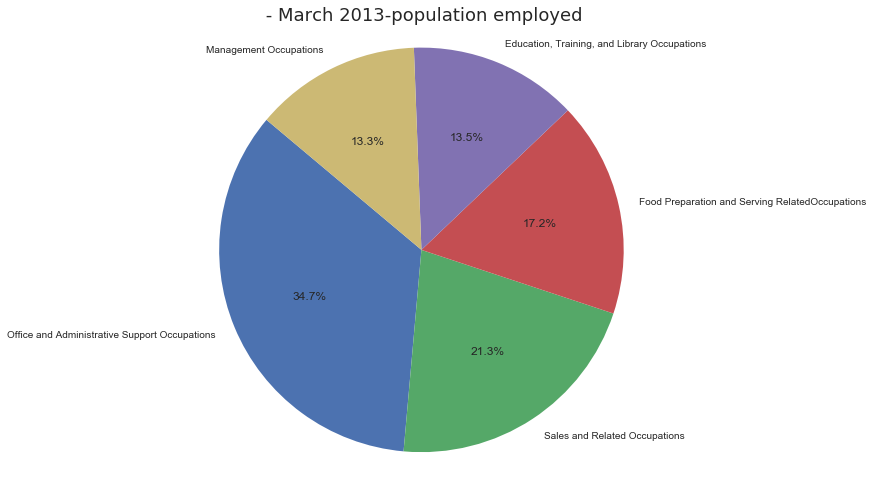

March 2013 Mean Annual Wage


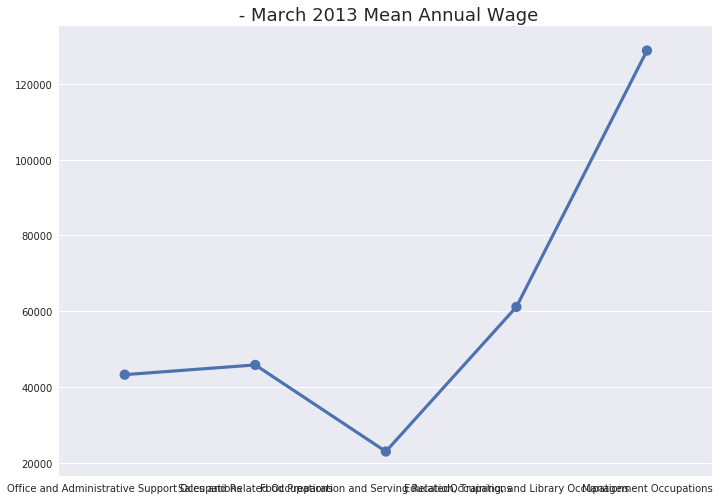

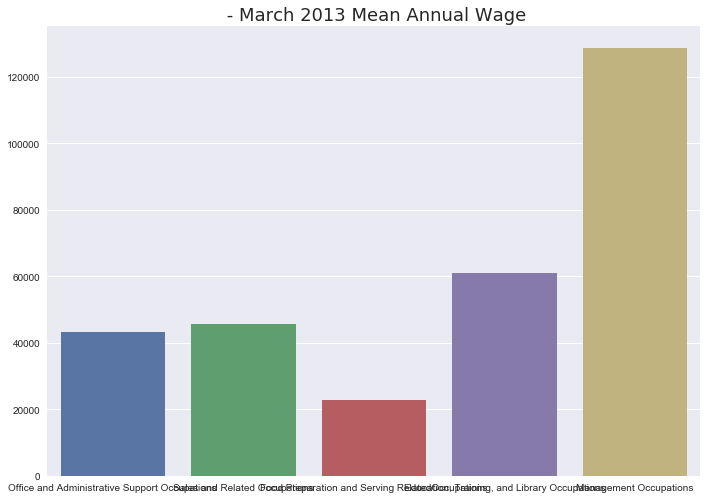

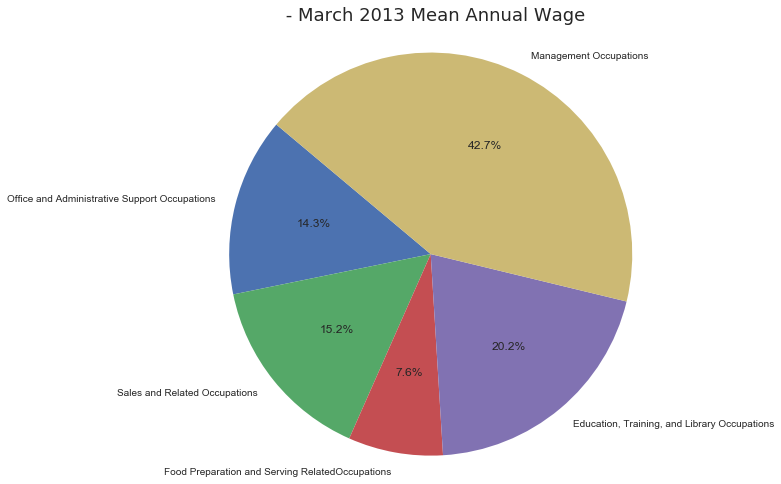

Median Home Sales Price (2013)


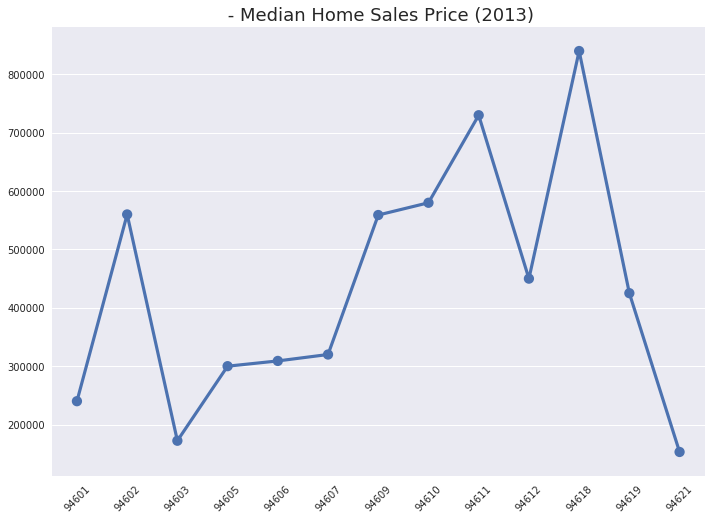

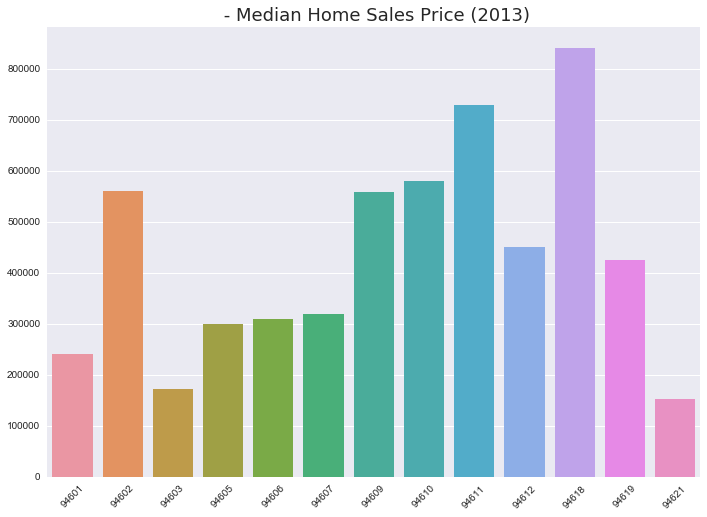

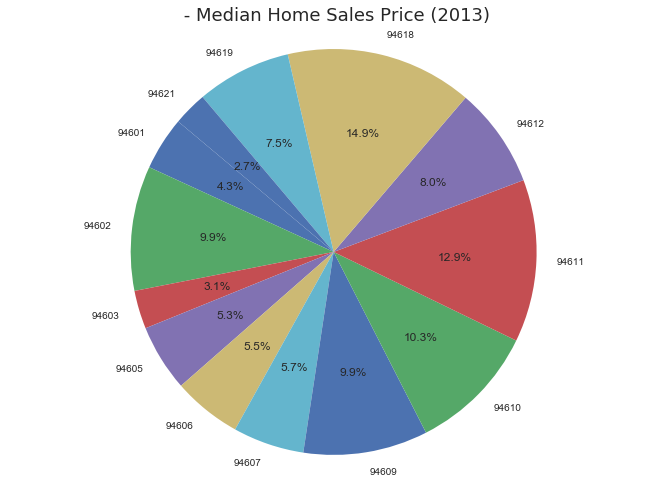

Monthly Payment


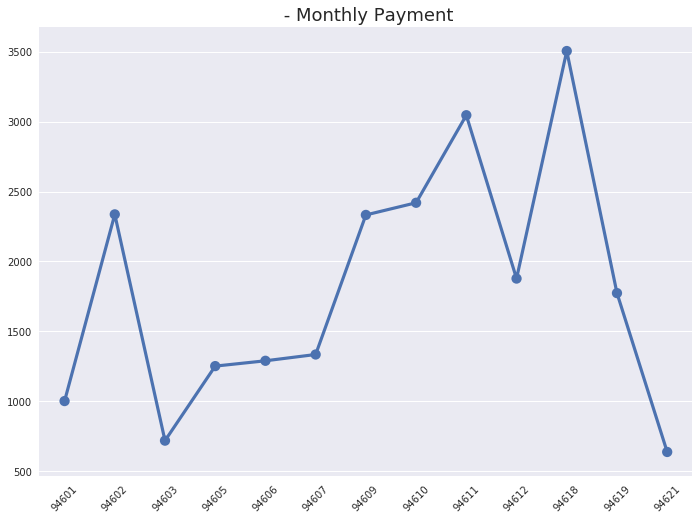

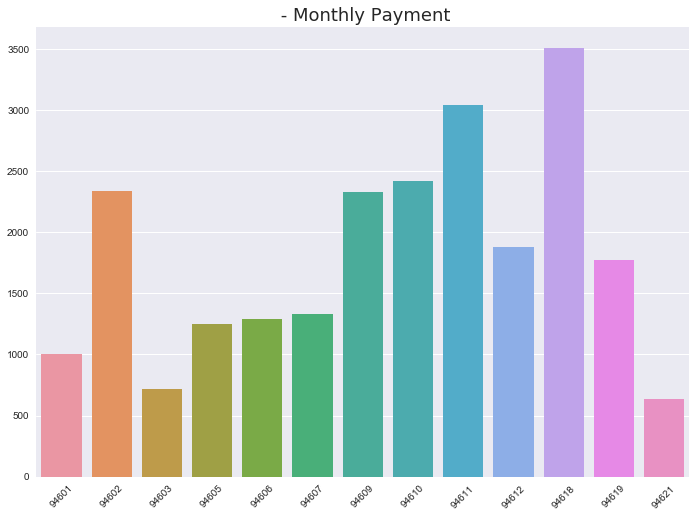

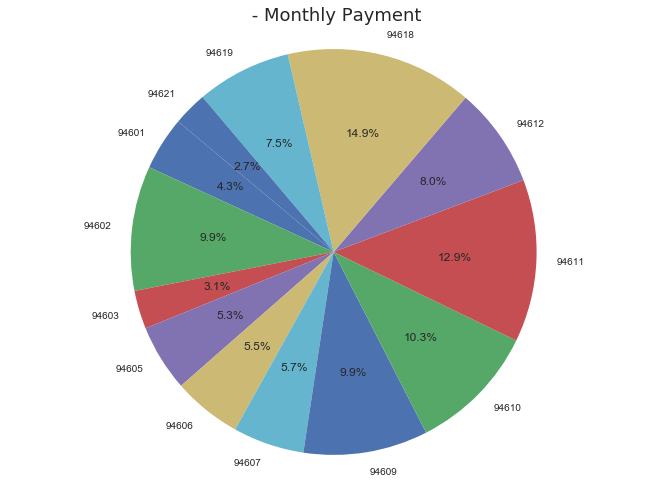

Yearly Income Required


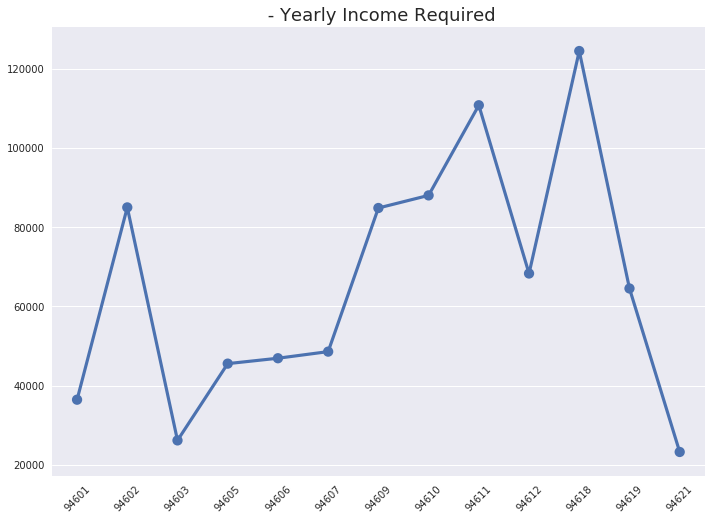

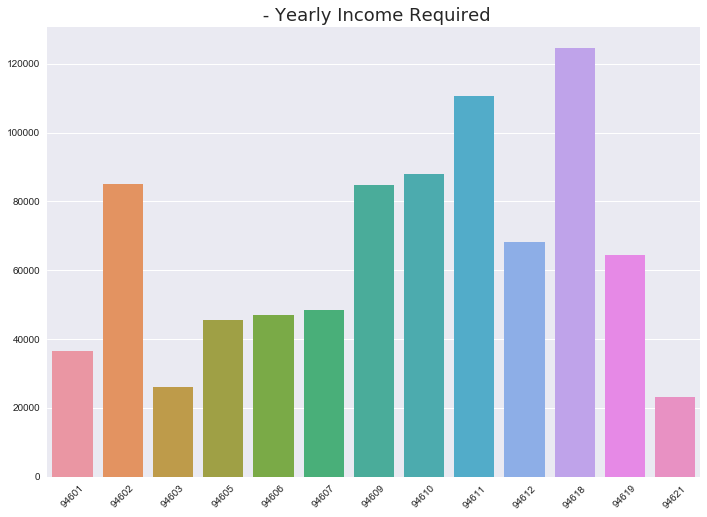

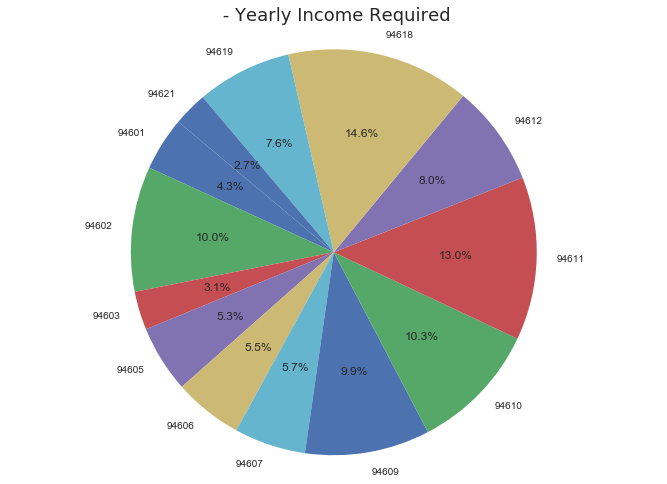

Studio


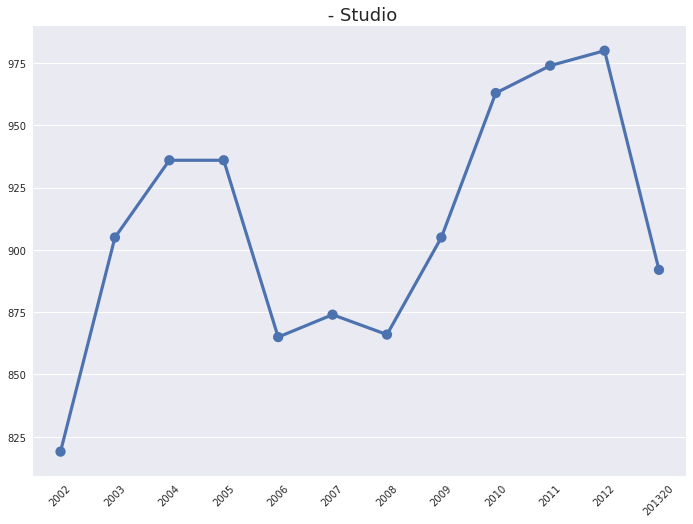

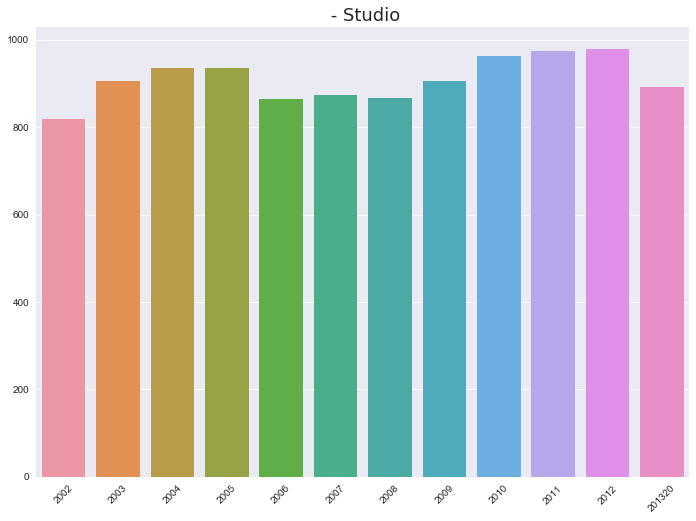

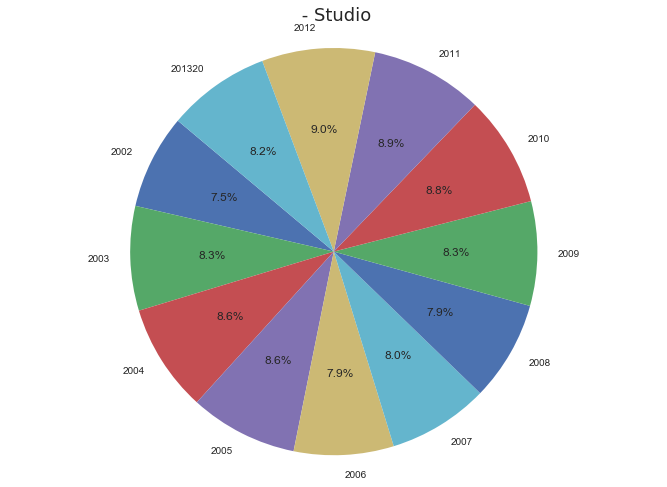

1 Bed


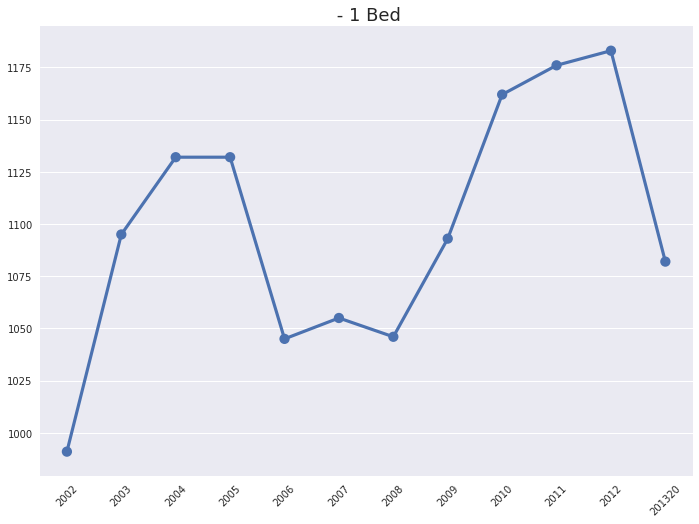

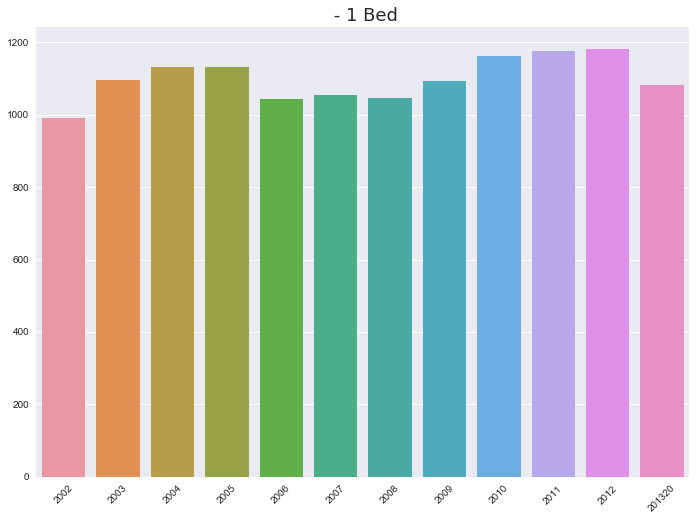

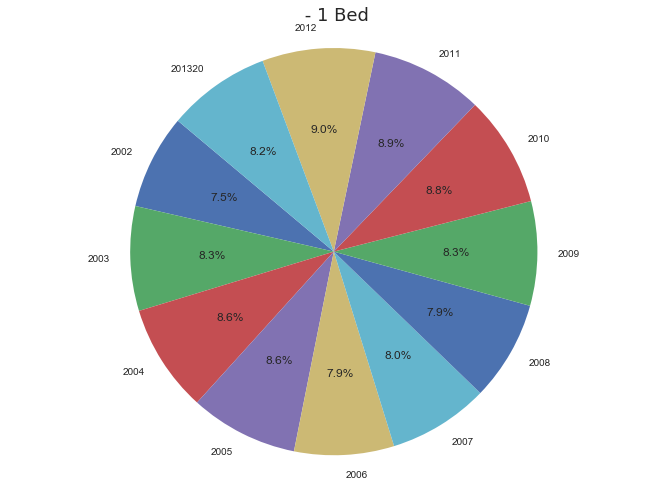

2 Bed


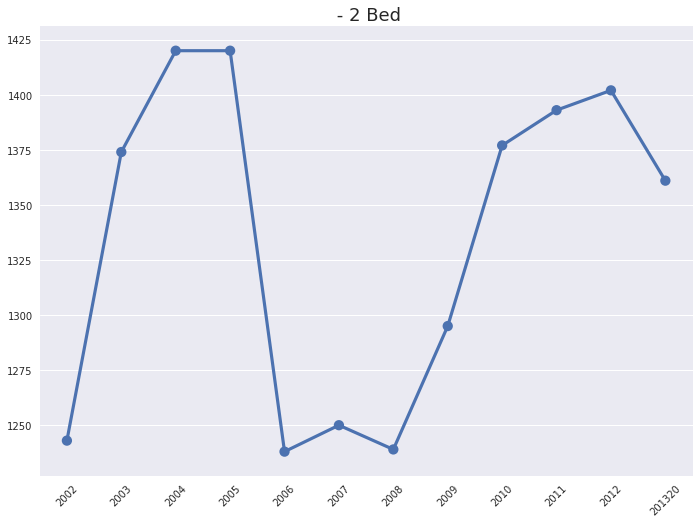

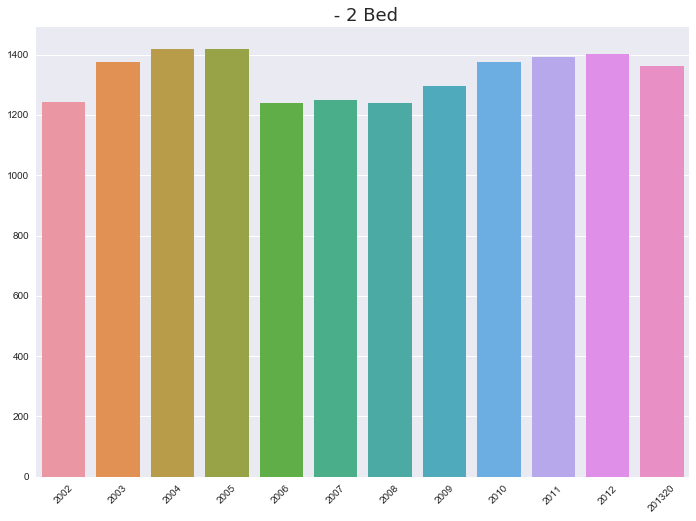

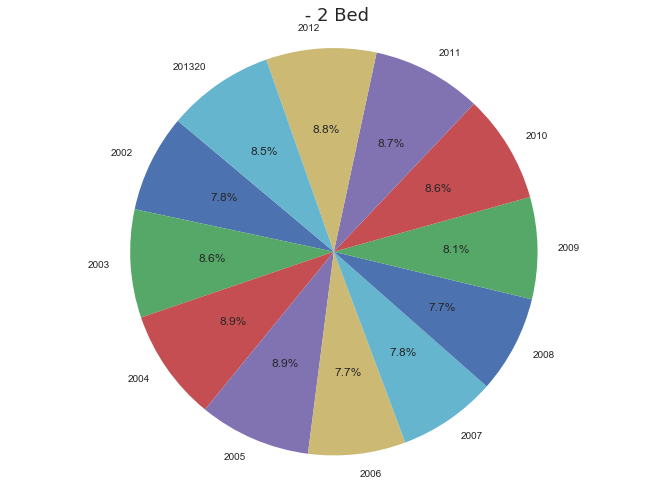

3 Bed


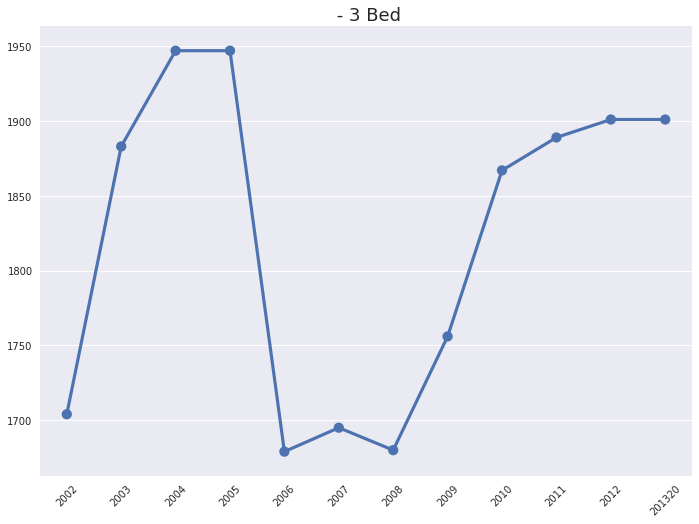

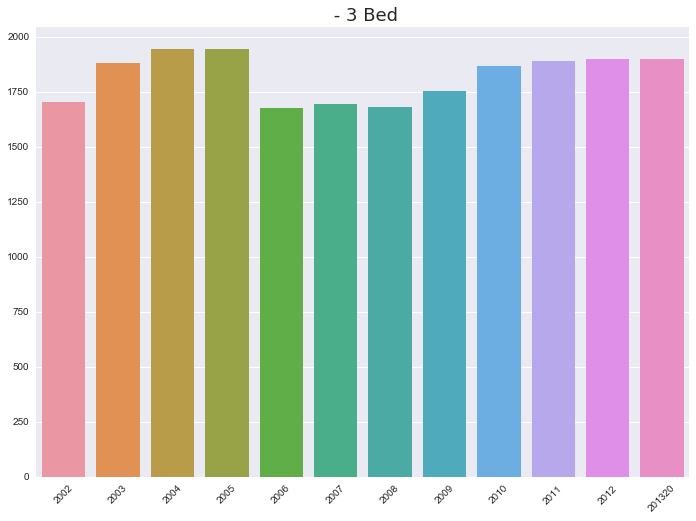

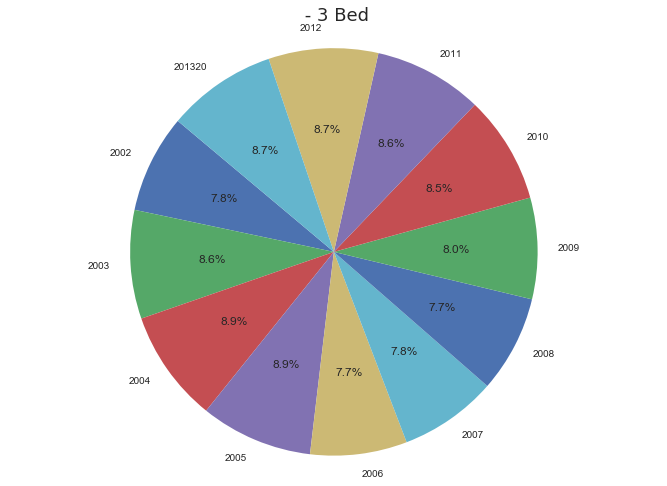

2006


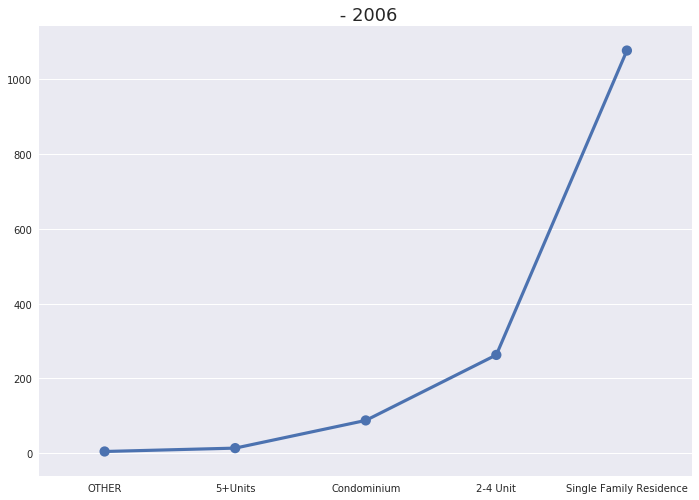

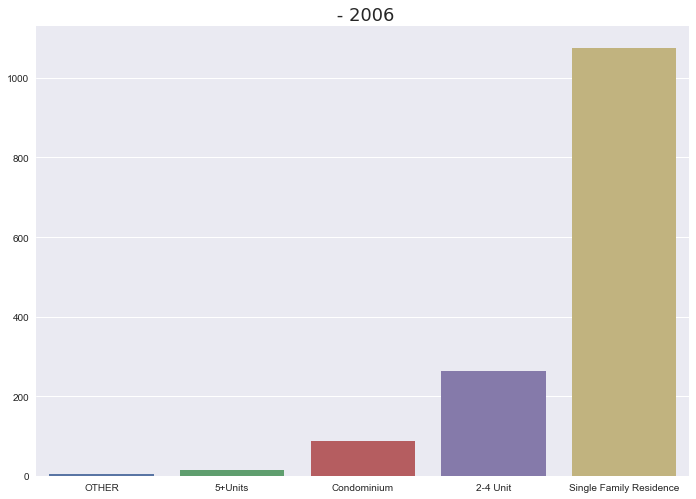

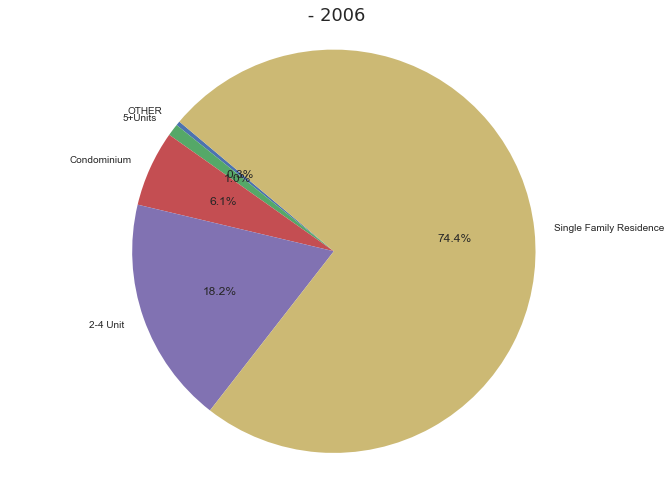

2007


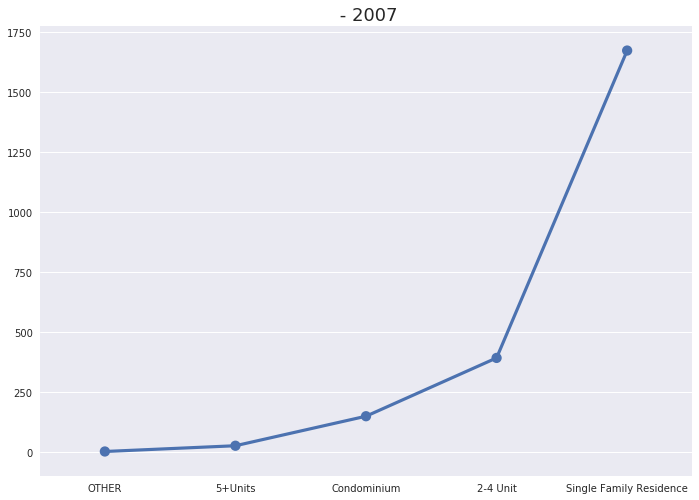

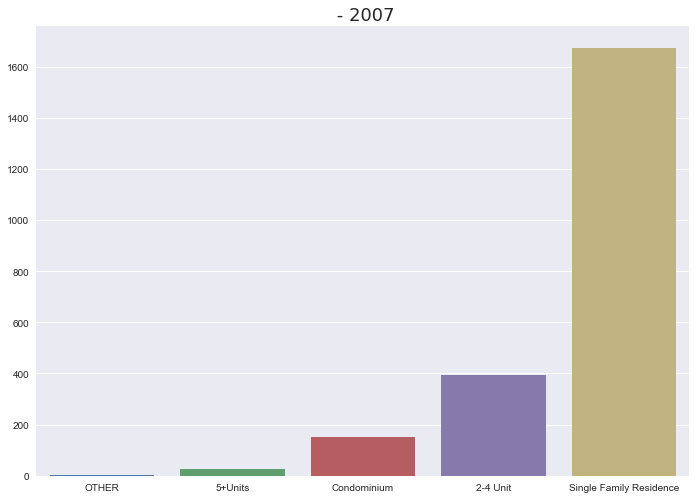

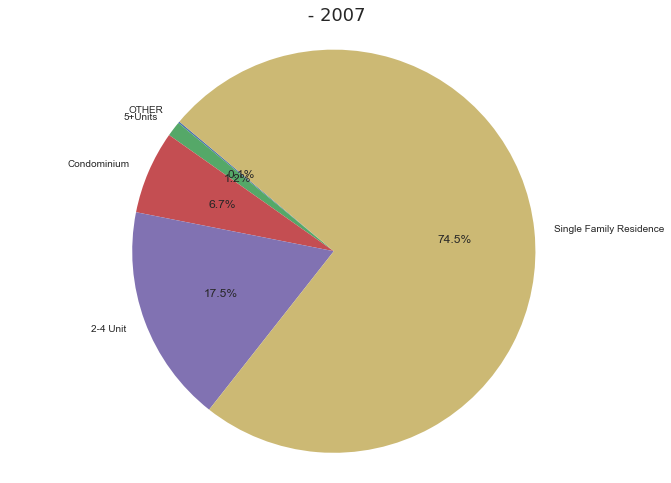

2008


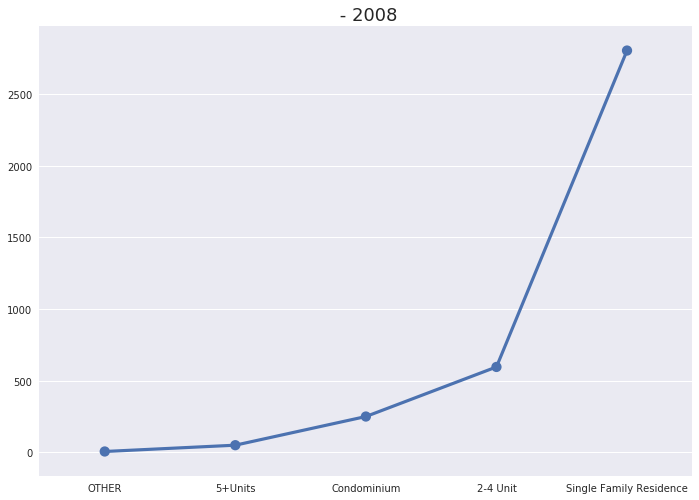

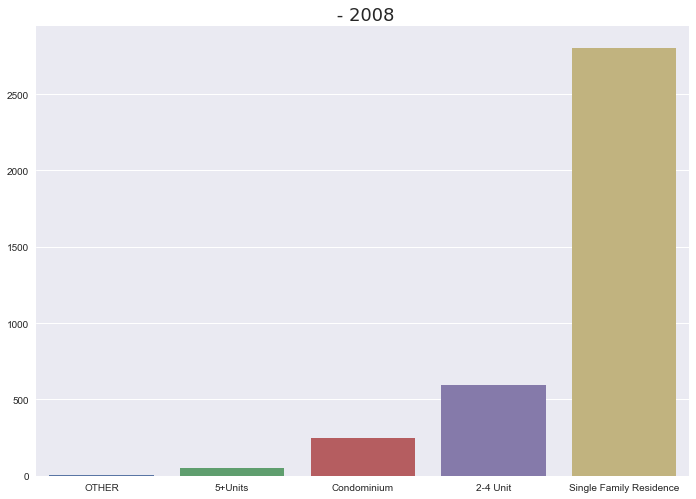

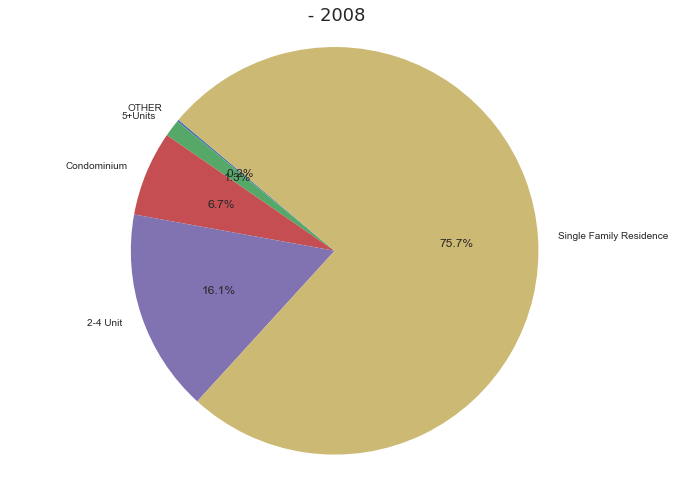

2009


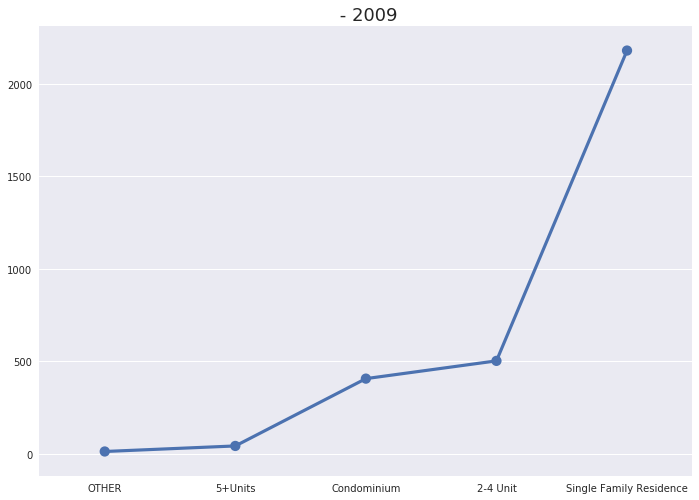

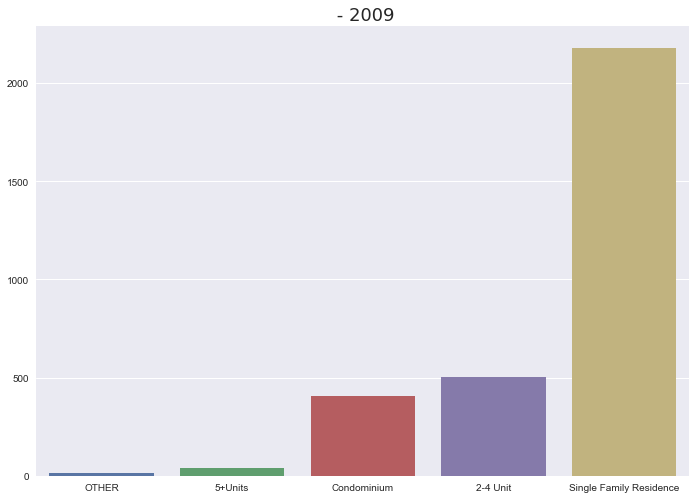

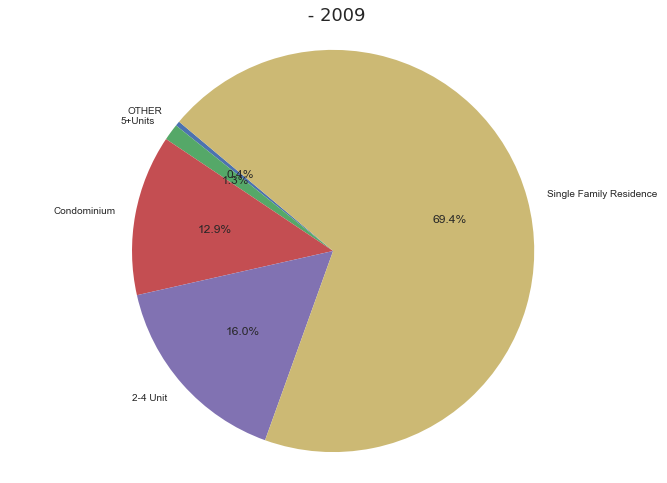

2010


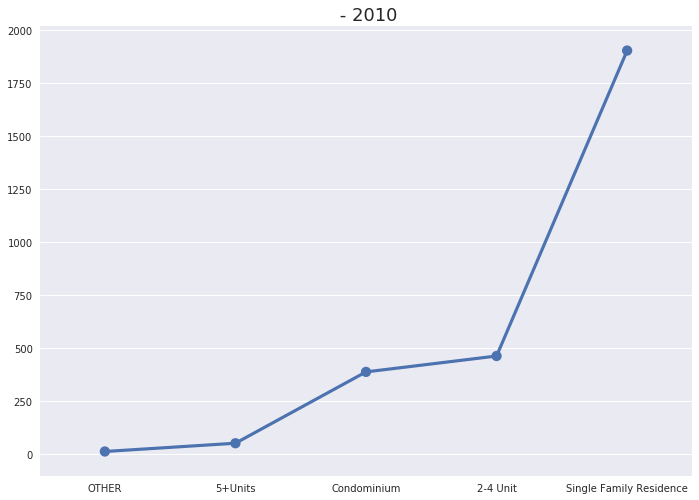

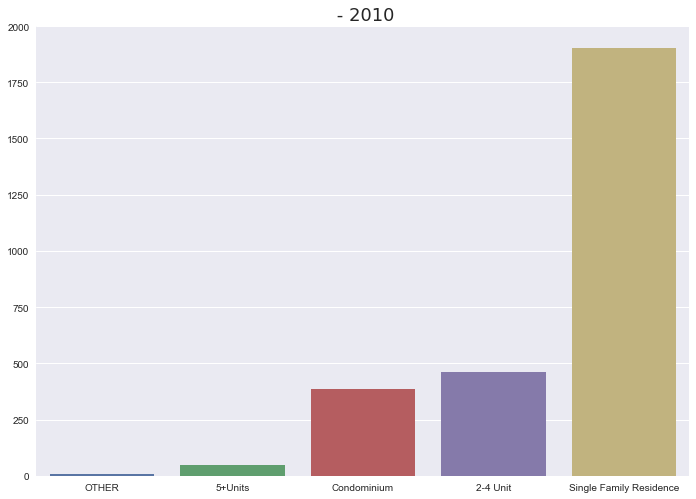

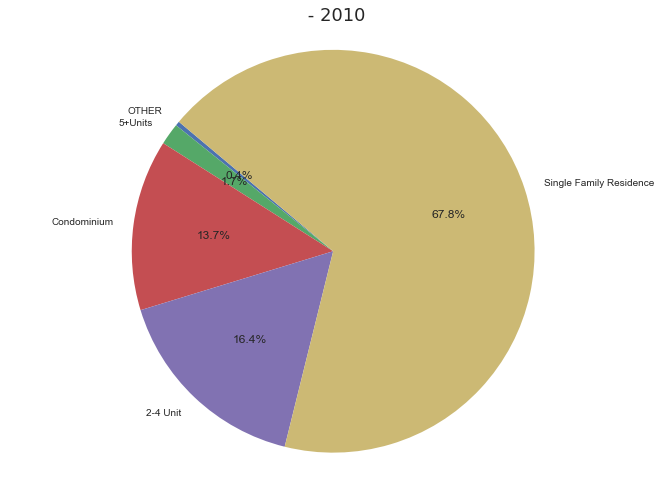

2011


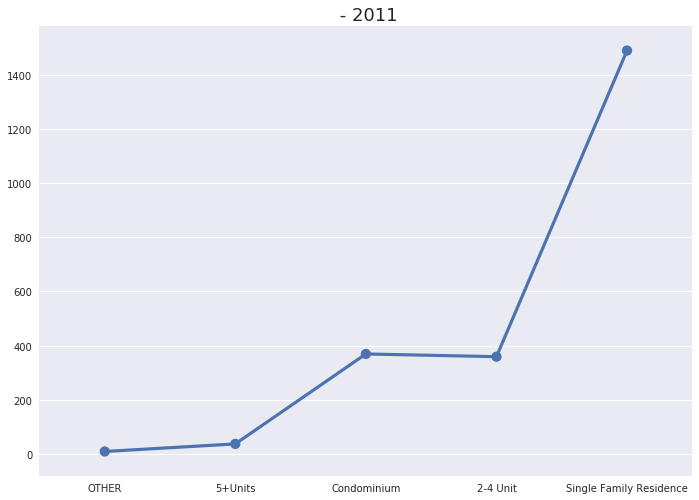

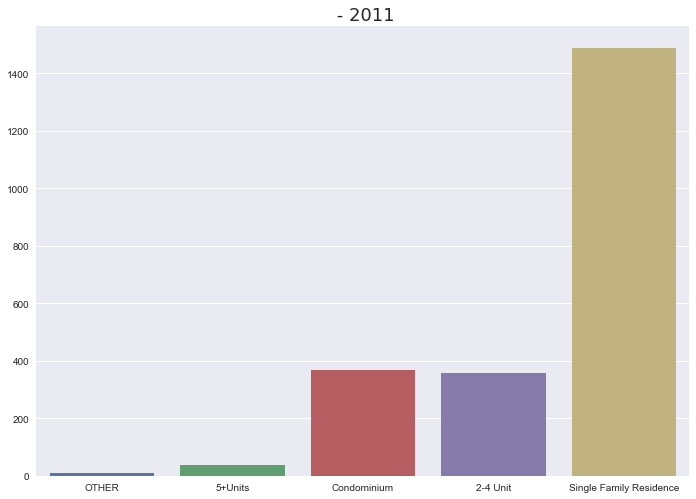

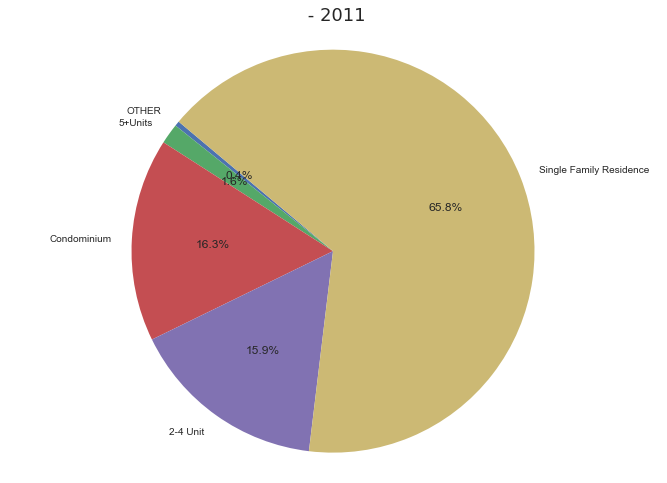

2012


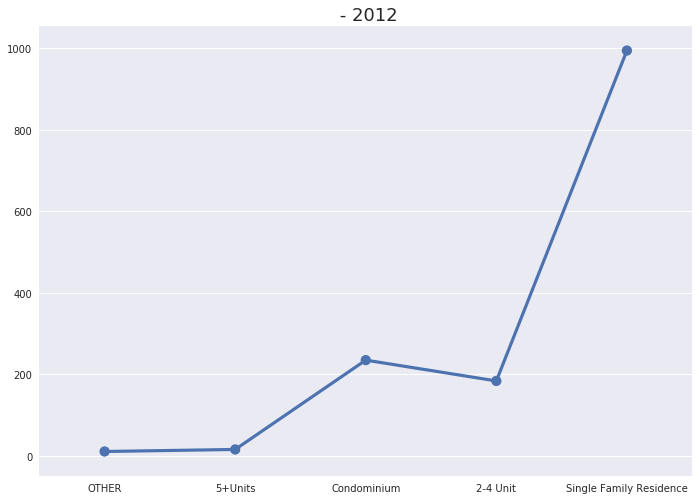

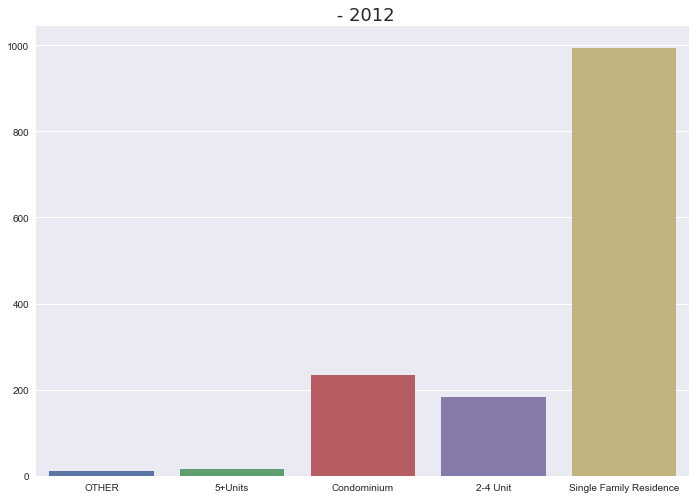

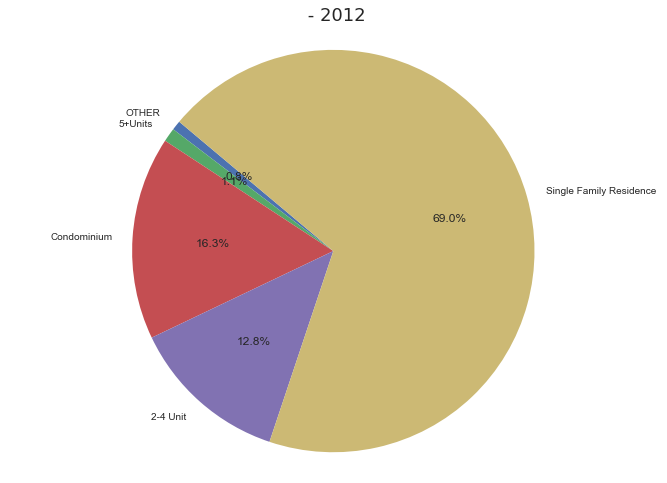

2013


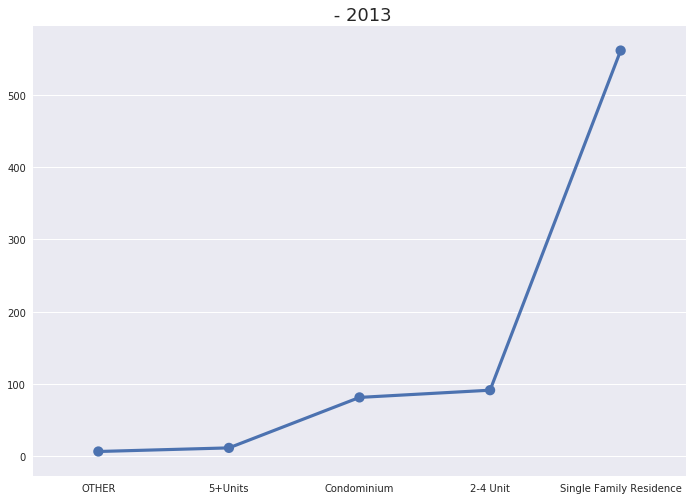

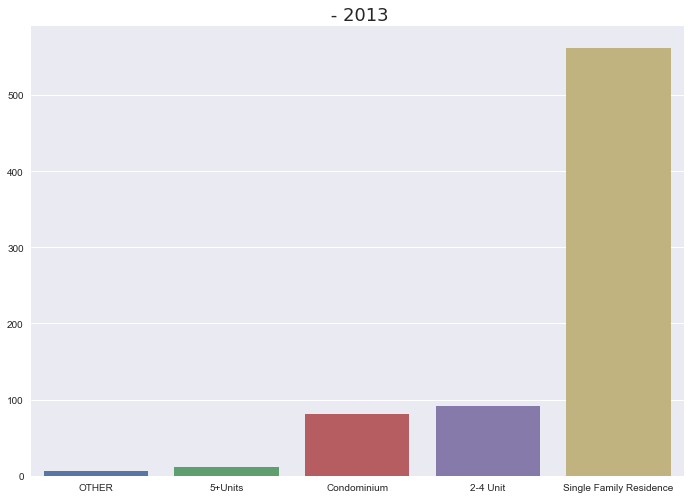

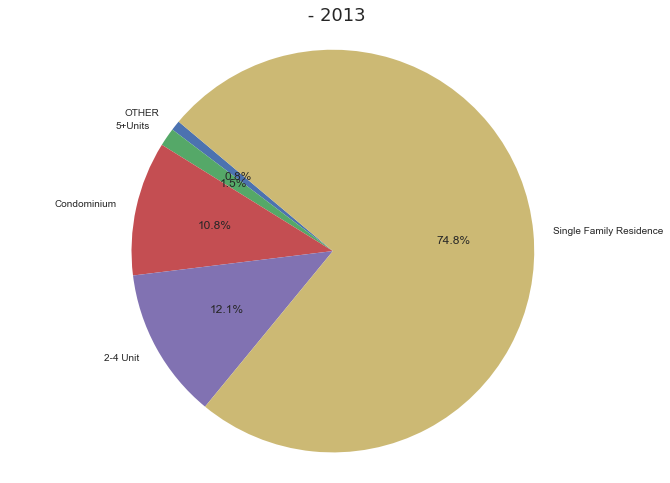

Owner Number


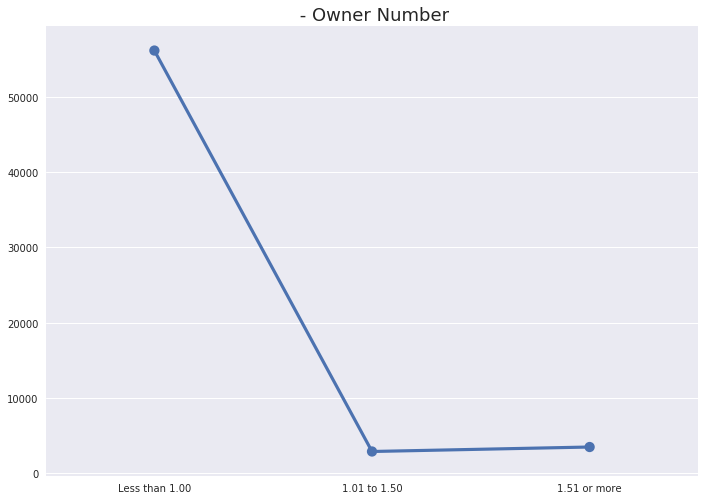

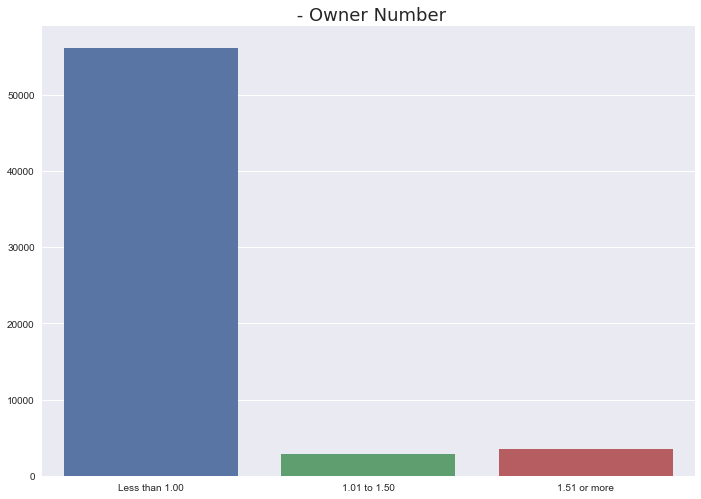

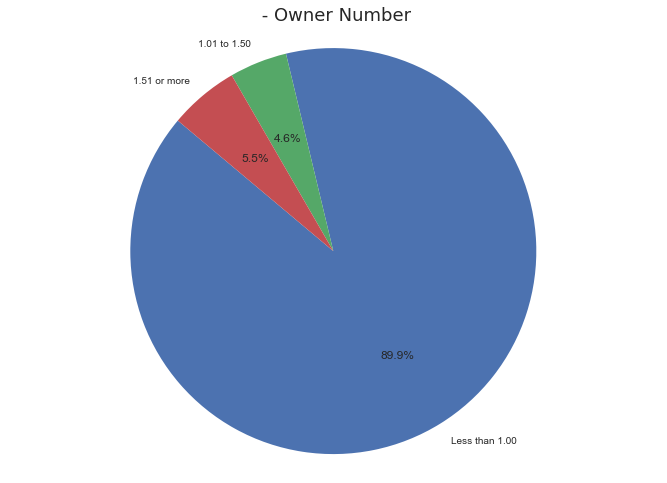

Renter Number


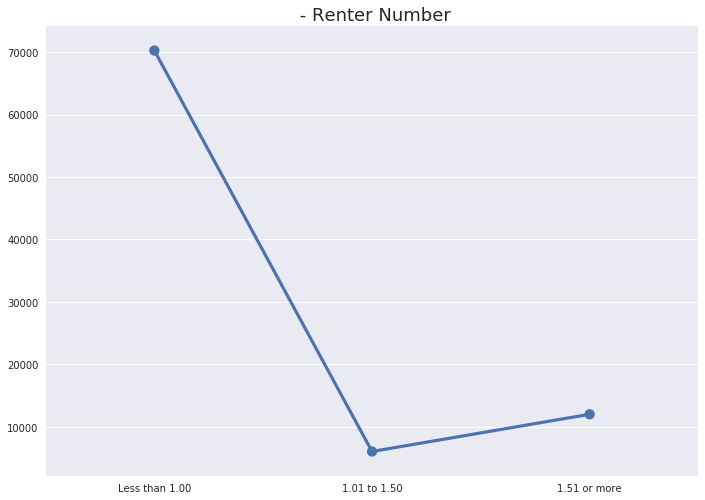

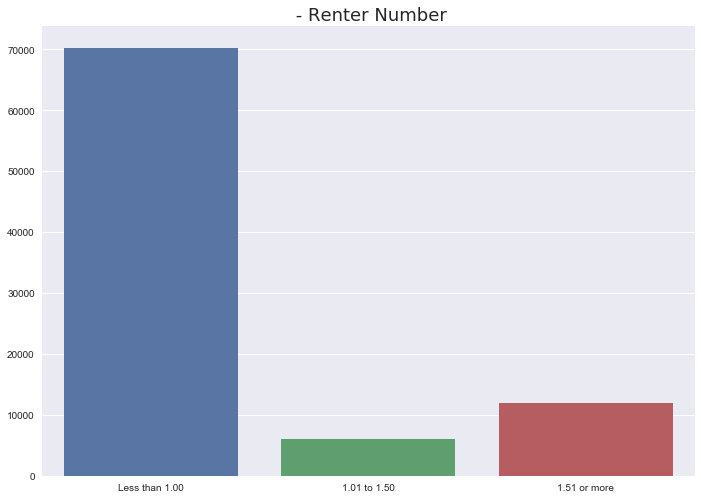

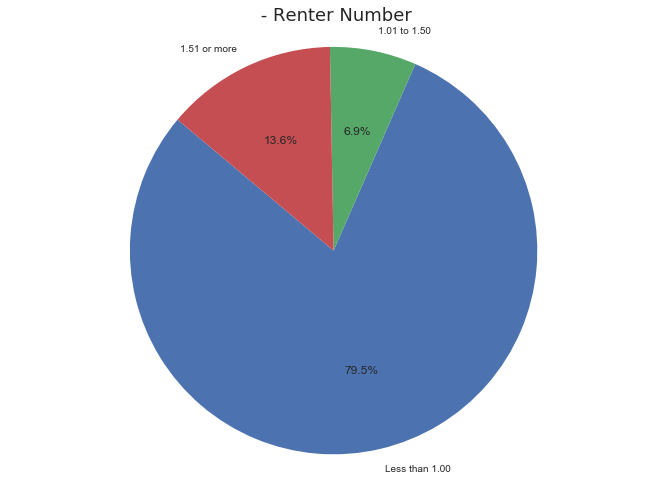

Total Number


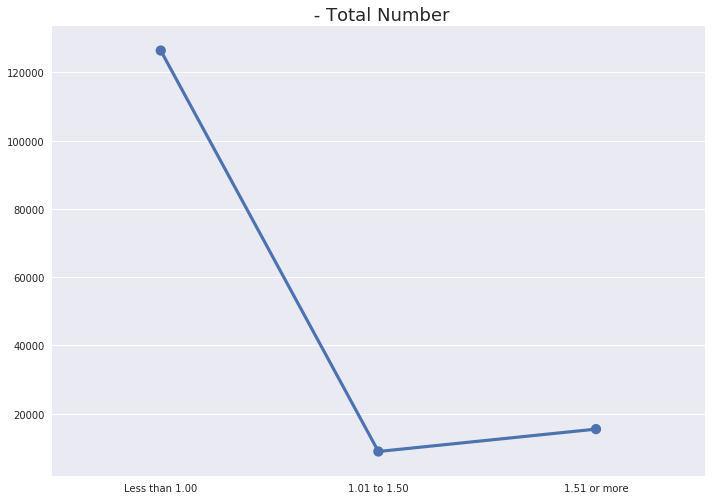

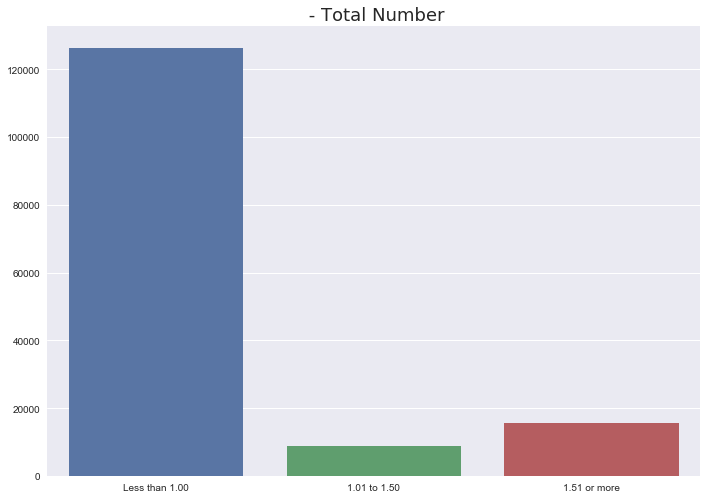

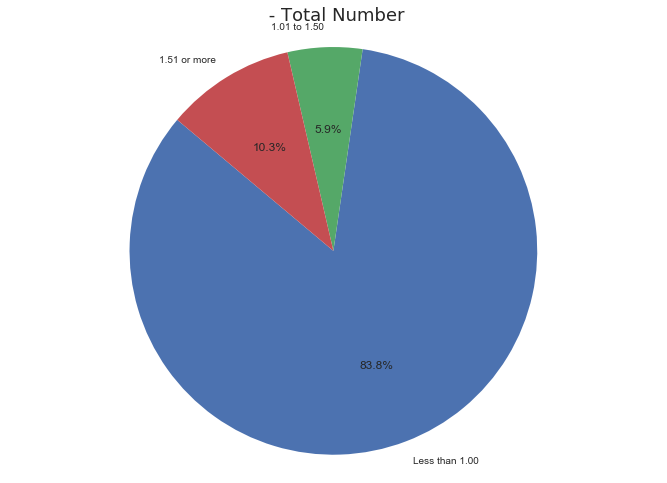

Oakland Population


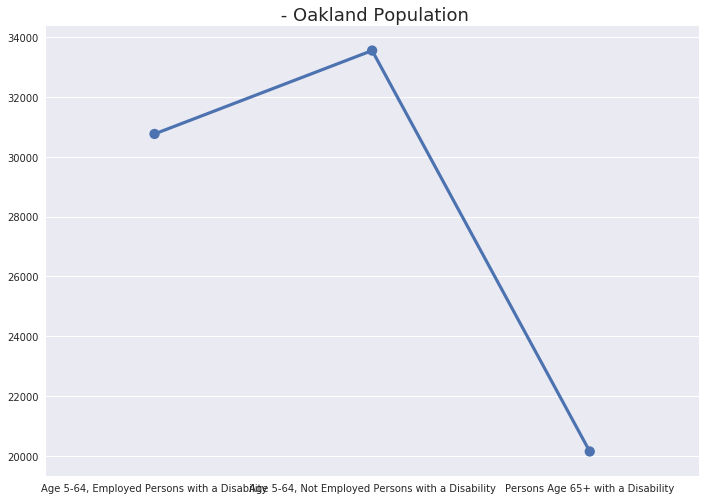

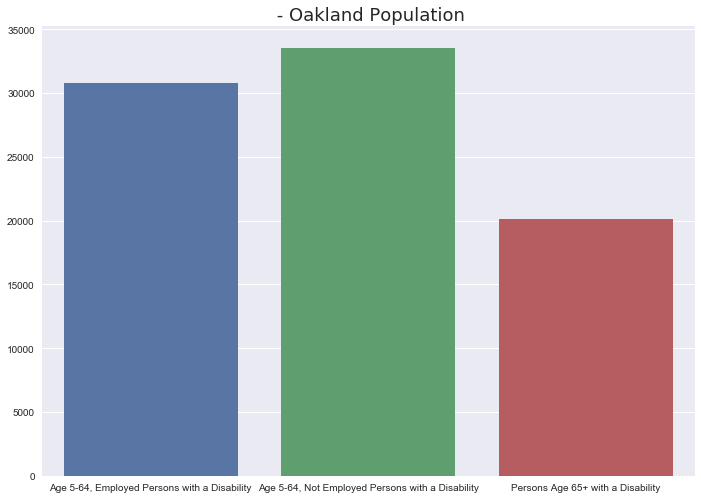

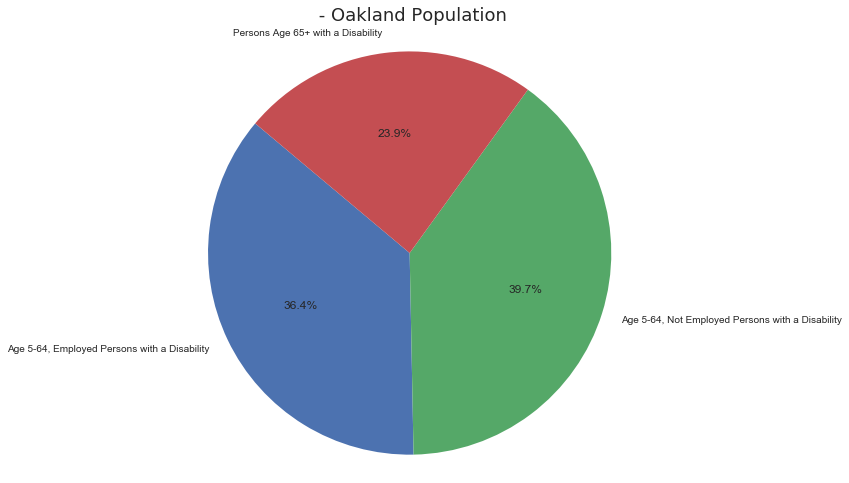

Alameda Co.Population


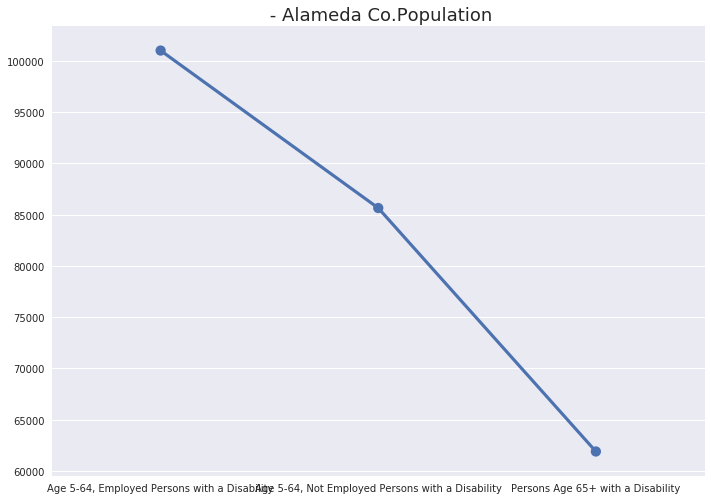

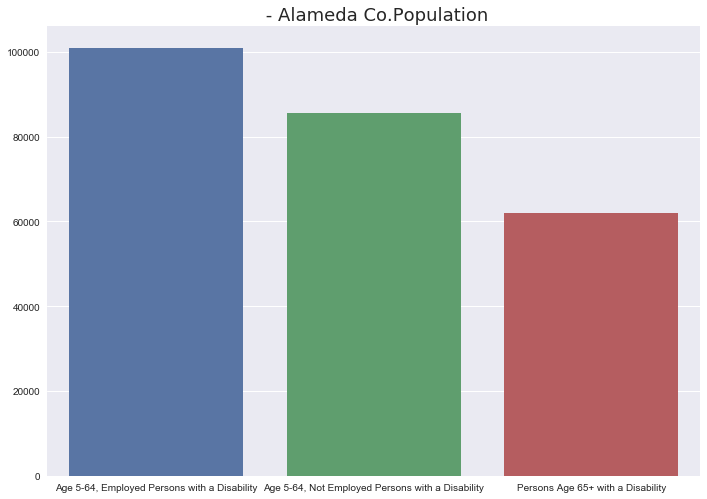

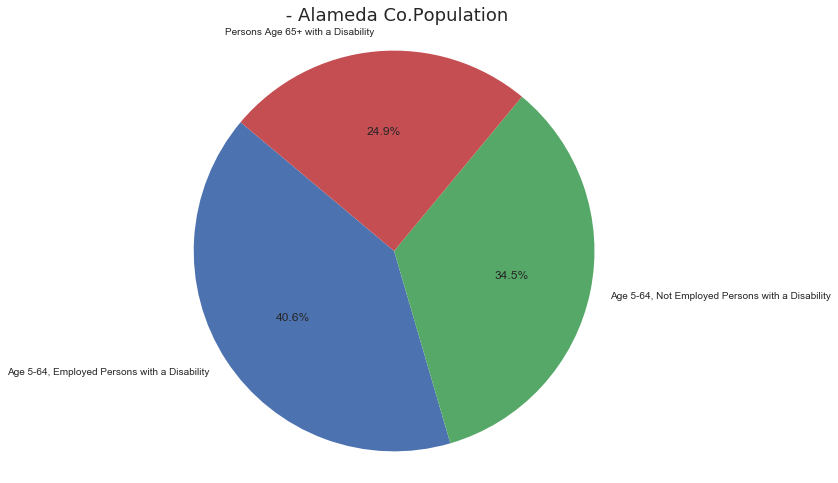

Tenure Owner- Occupied


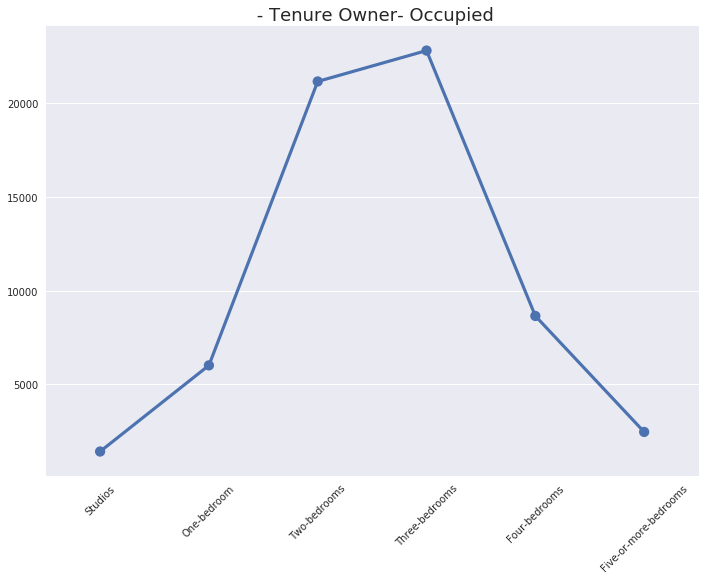

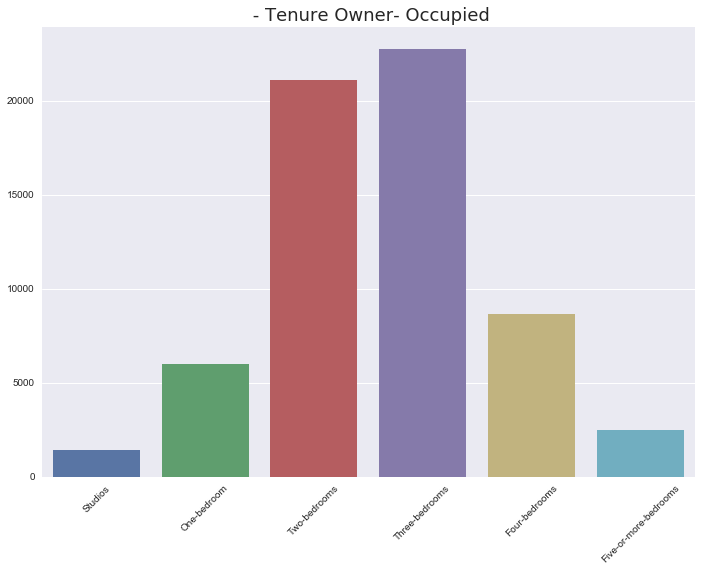

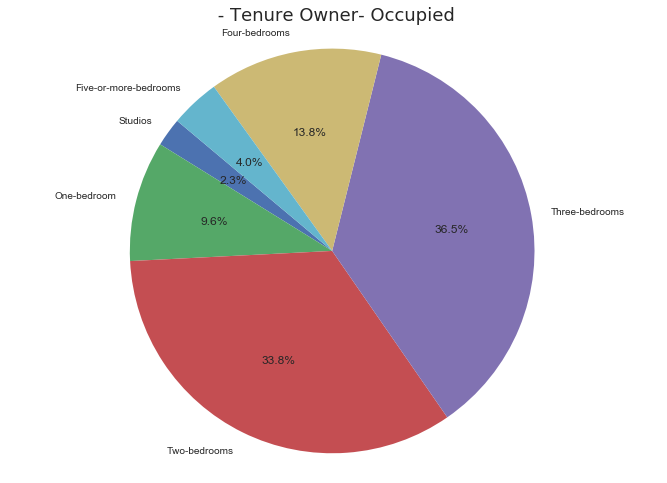

Tenure Renter- Occupied


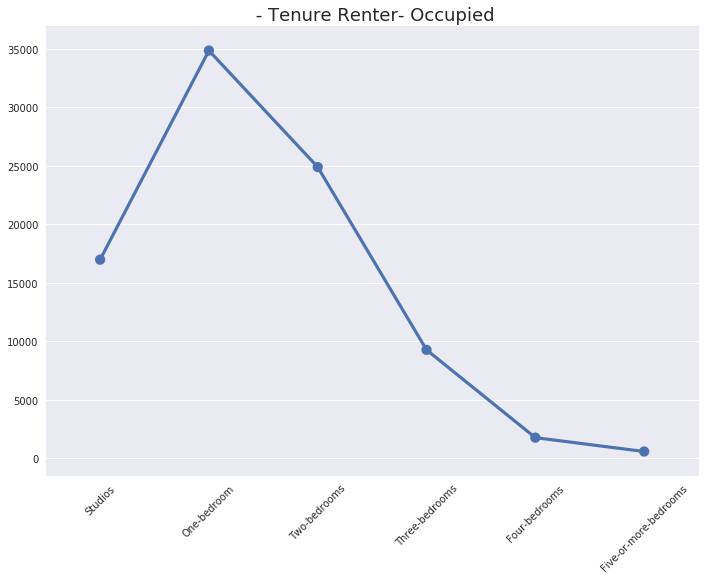

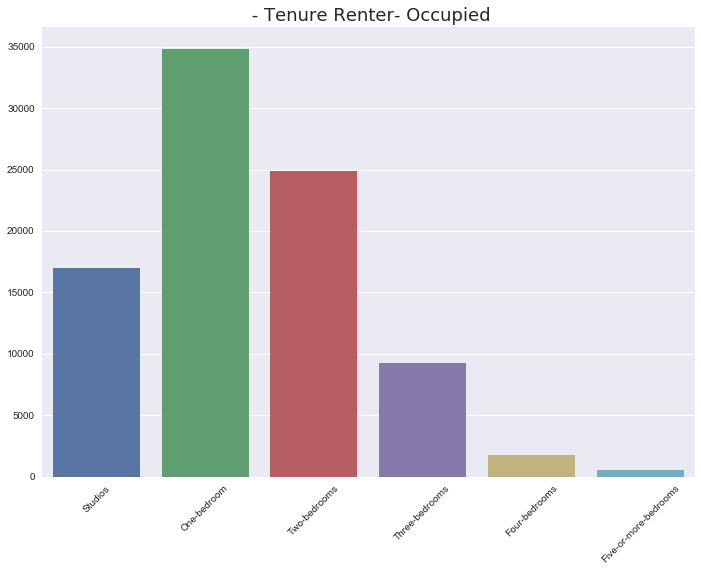

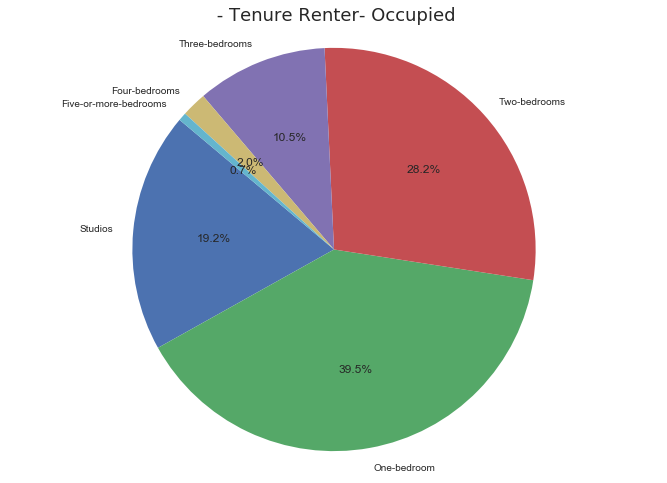

Total


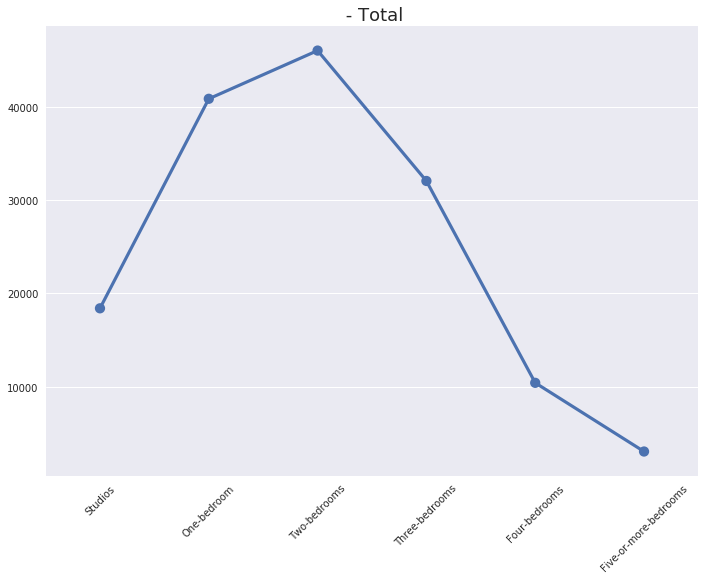

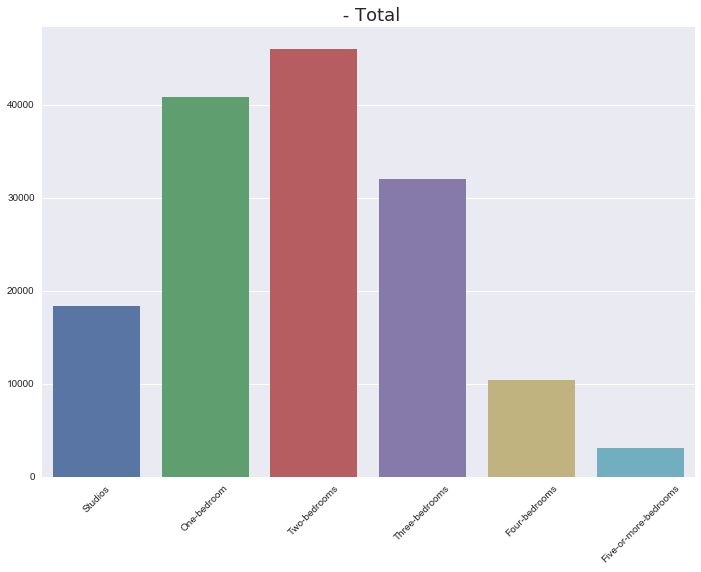

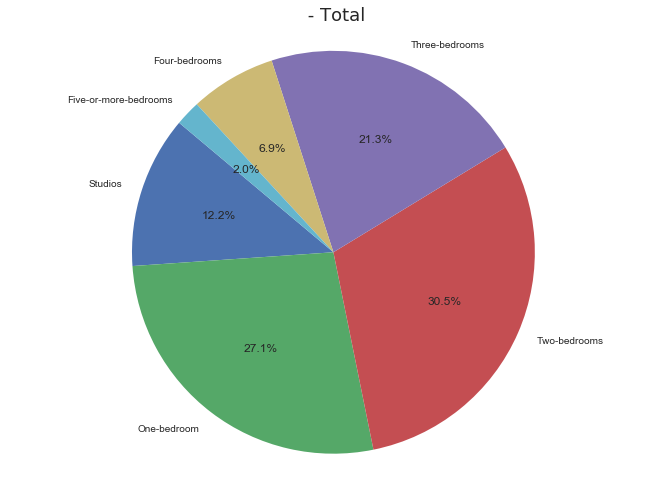

1990


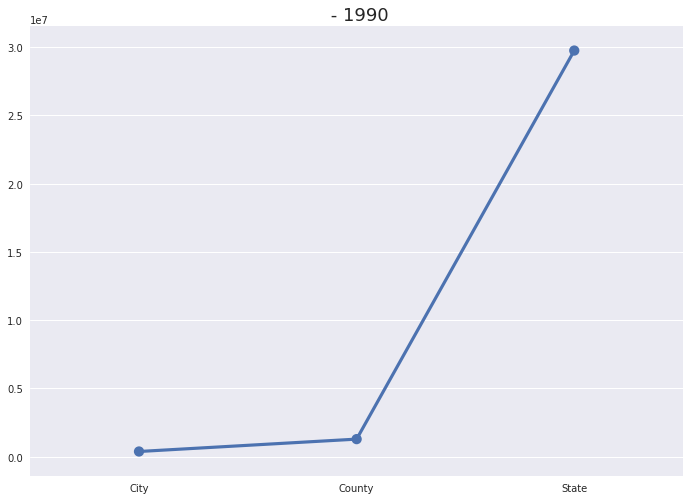

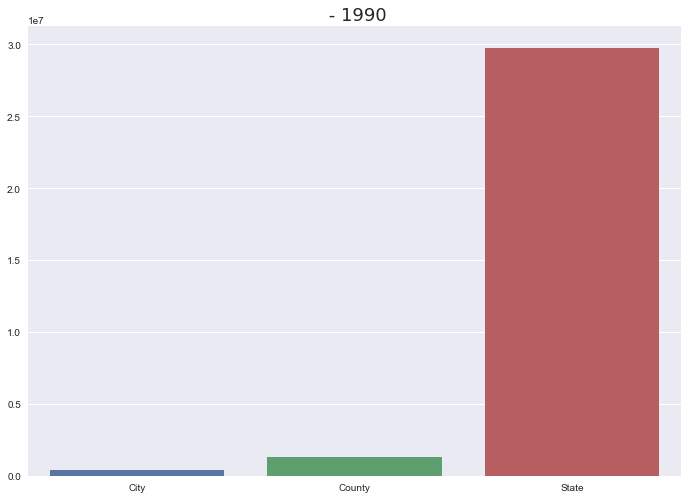

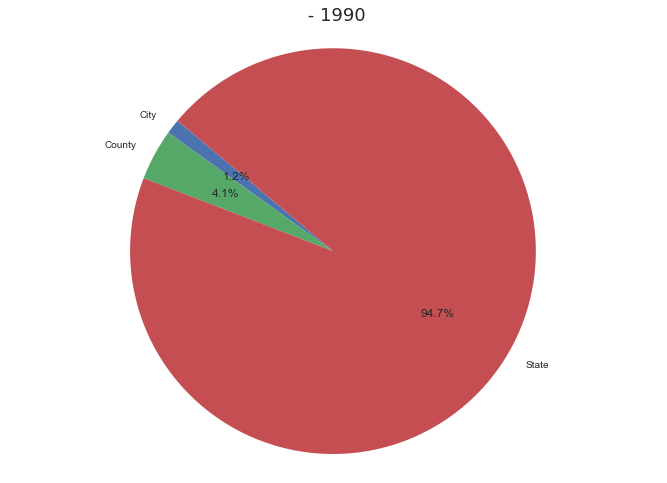

2000


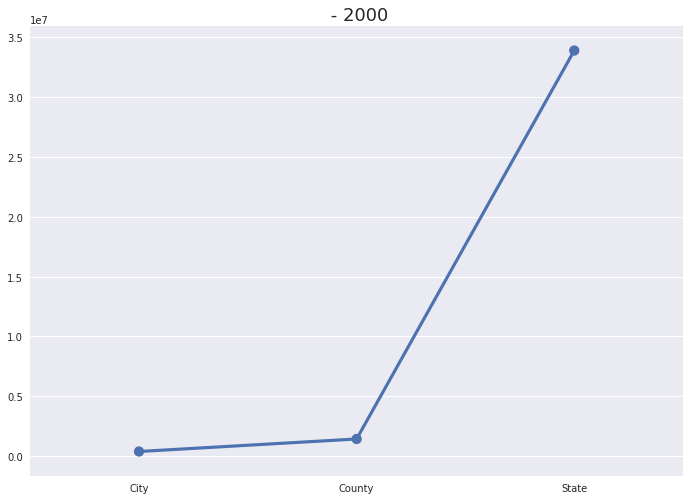

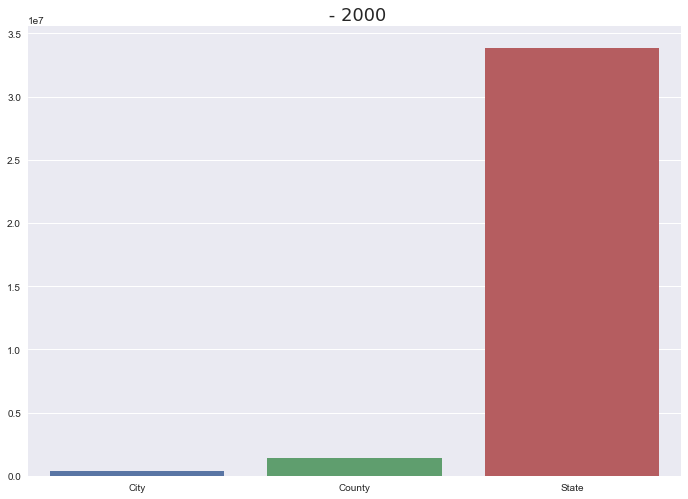

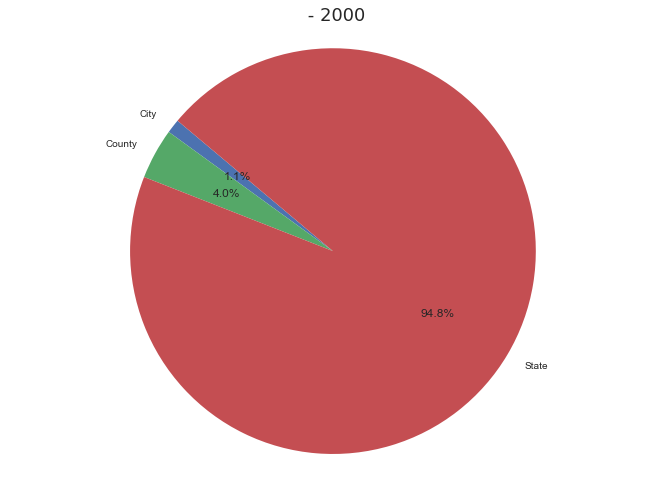

2010


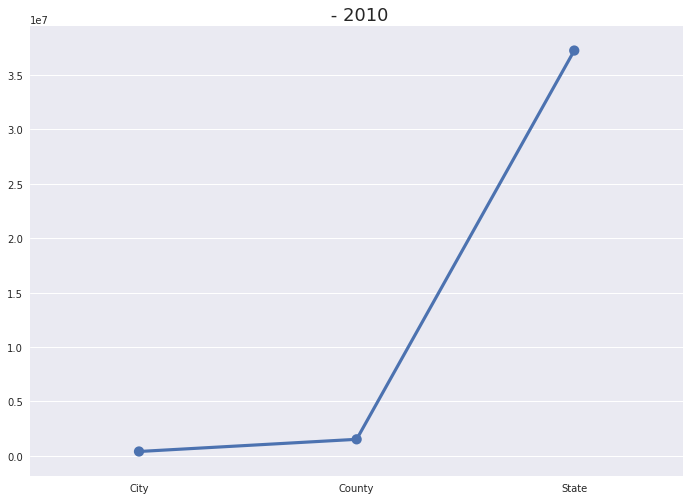

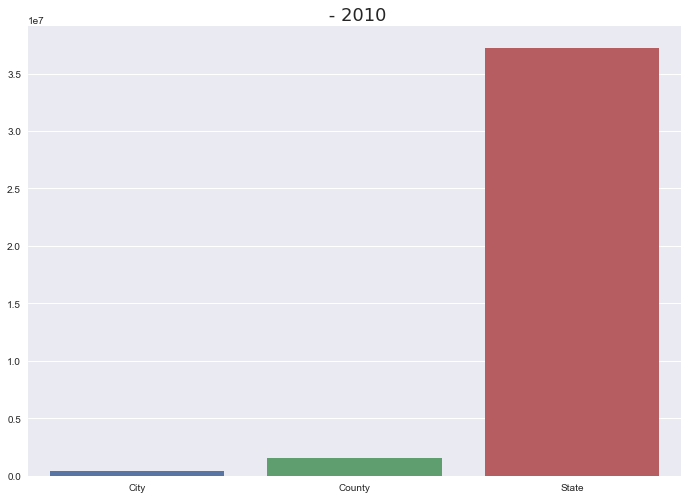

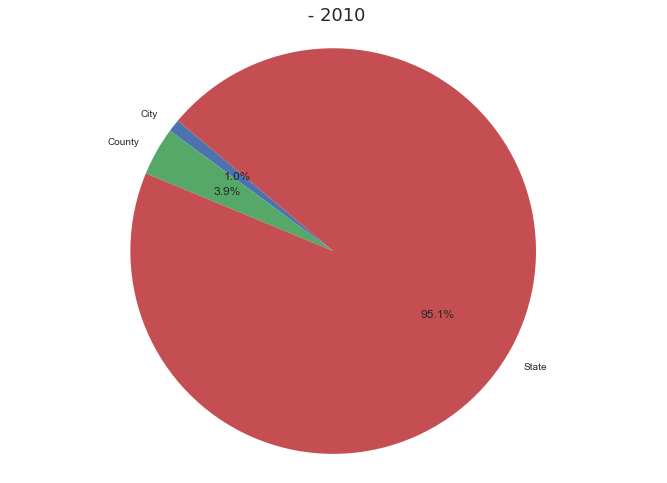

Number of Jobs


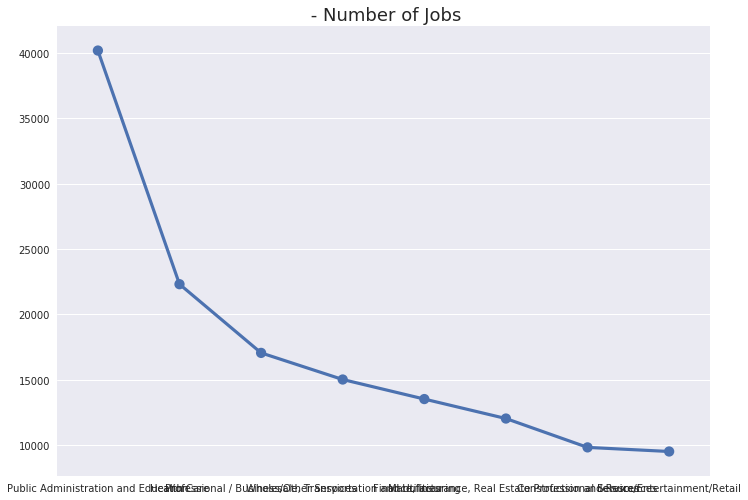

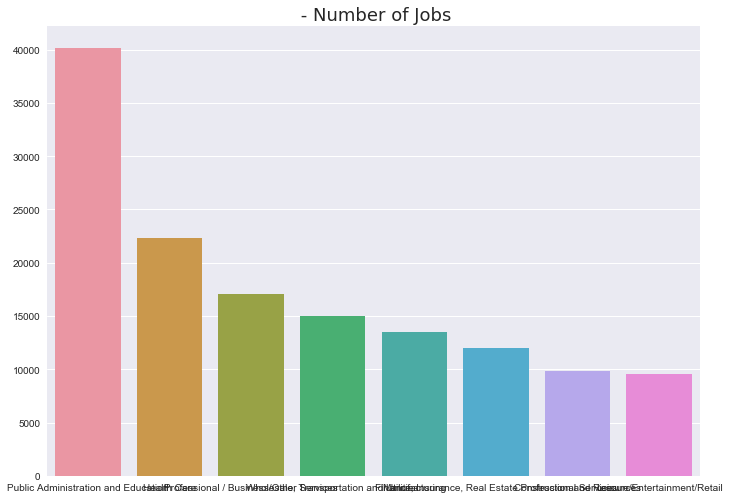

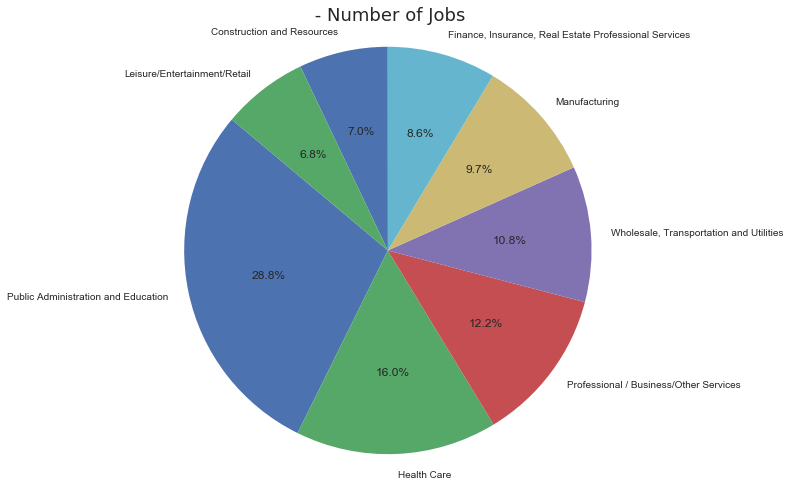

Number of Businesses


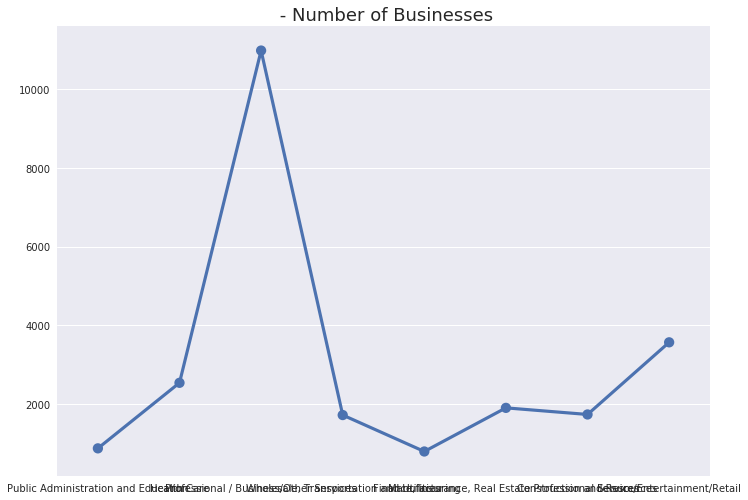

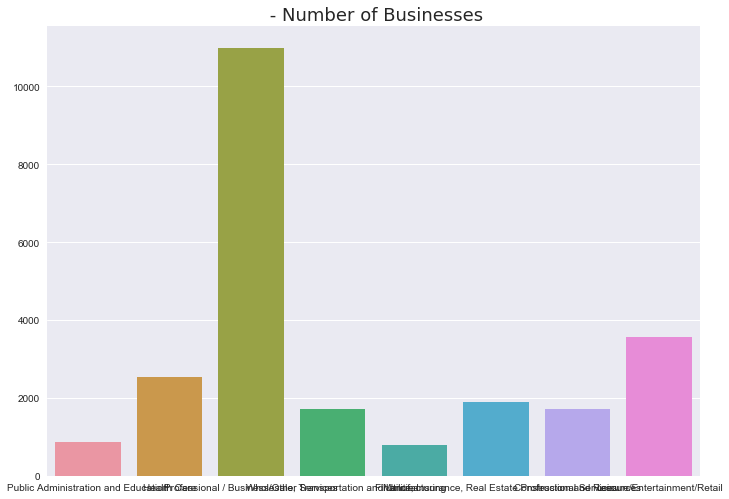

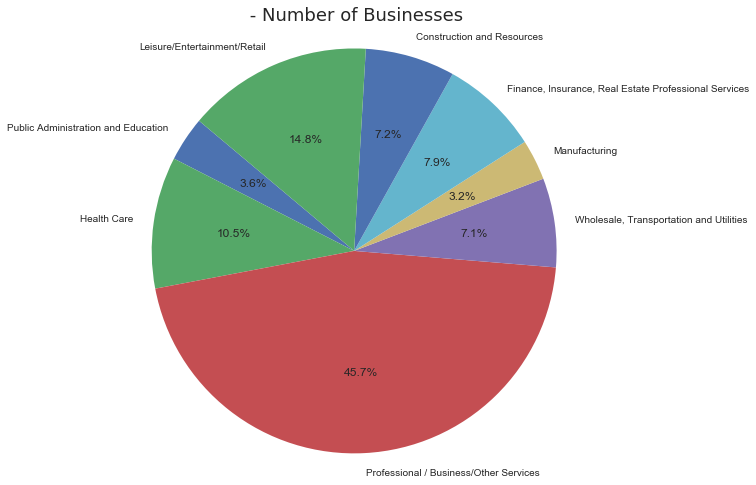

$98,174,000


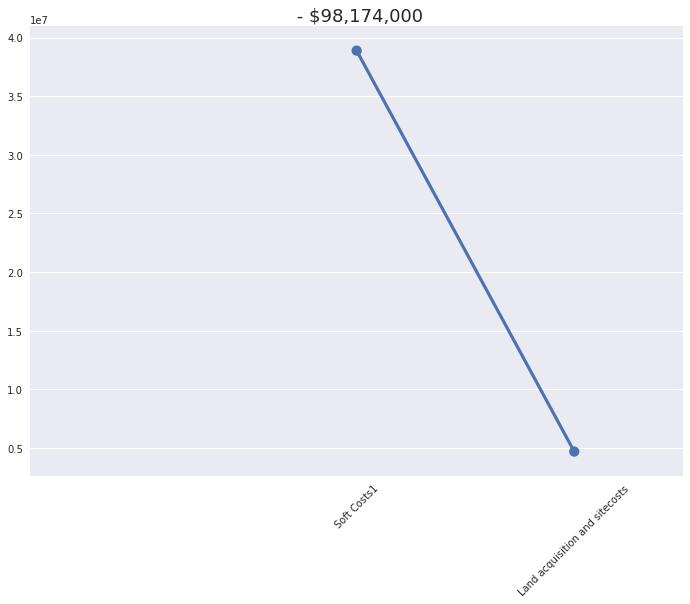

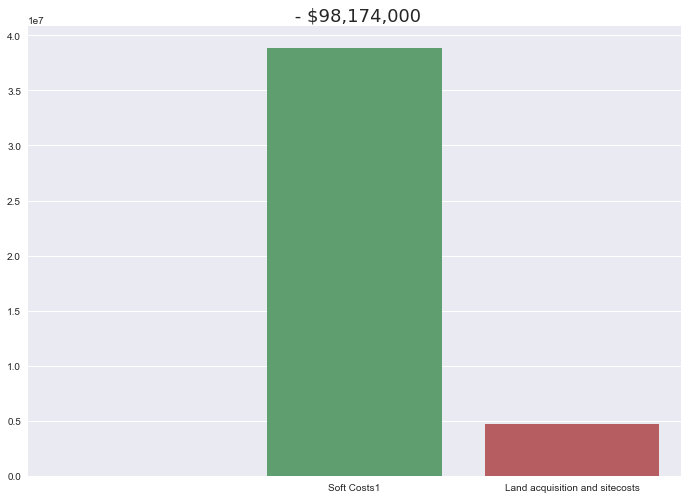

Required Monthly Mortgage Payment (30-year term)


ValueError: cannot convert float NaN to integer

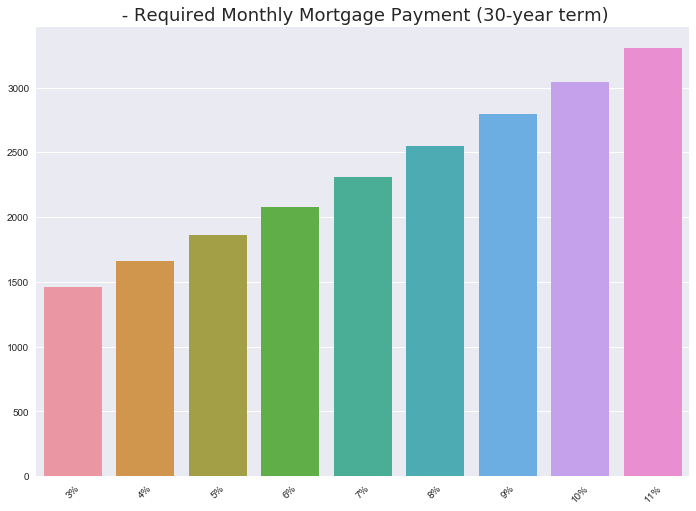

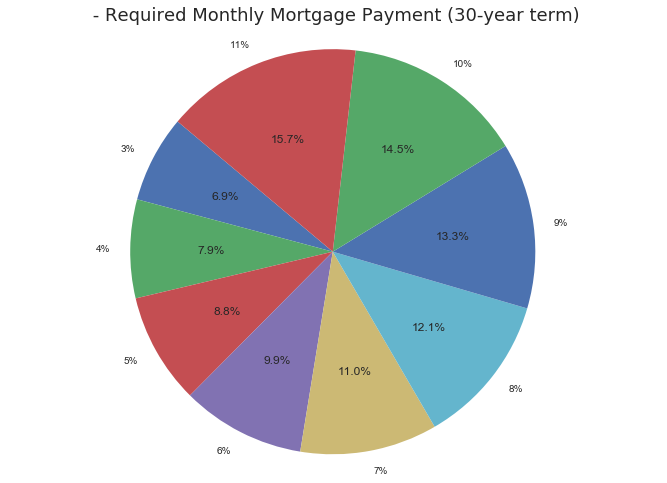

Required Household Income1


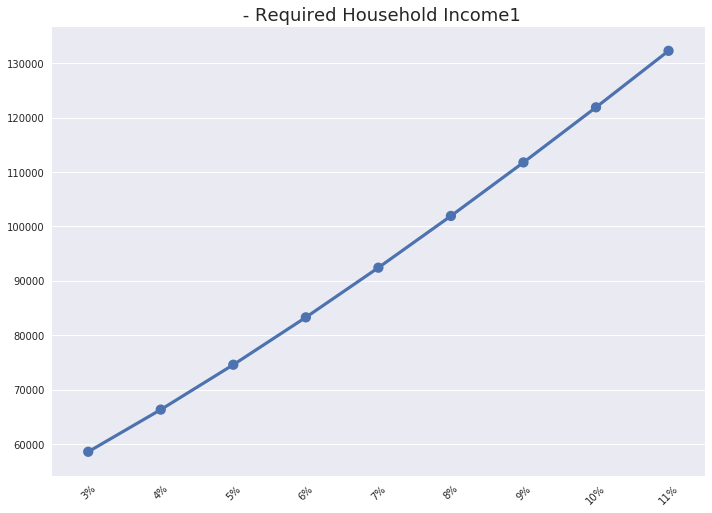

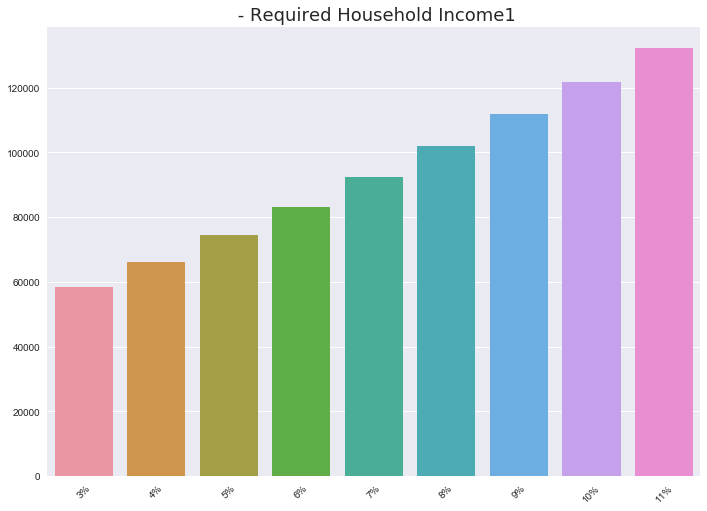

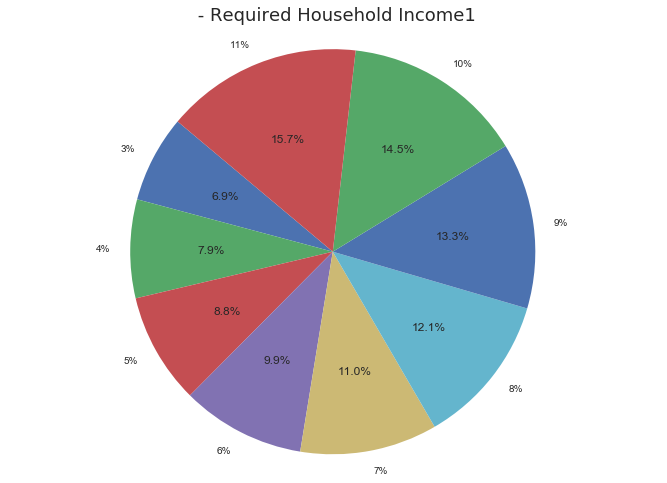

In [384]:
create_graphs(a,c,b)

# Albany

In [354]:
ad = open("elements1/albany_elements.html").read()

soup1 = BeautifulSoup(ad)

tables2 = soup1.find_all("table")

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [356]:
display(HTML(str(tables2[3])))

In [361]:
df_albany = create_dataframe(tables2[3])[0]

In [363]:
df_albany

2005Price * Single- Family Units Manuf. Home Park Units  \
0             <$75,000                  156                    440   
1             <$75,000                23.9%                  67.5%   
2    $75,000 -$115,000                1,082                    342   
3    $75,000 -$115,000                73.5%                  23.2%   
4   $115,000 -$150,000                2,910                      2   
5   $115,000 -$150,000                99.6%                   0.1%   
6   $150,000 -$190,000                2,936                      0   
7   $150,000 -$190,000               100.0%                   0.0%   
8   $190,000 -$280,000                2,401                      0   
9   $190,000 -$280,000               100.0%                   0.0%   
10           $280,000+                  508                      0   
11           $280,000+                99.8%                   0.0%   
12              Totals                9,993                    784   
13          Percentage                91.7%                   7.2%   

   Duplex Units 3-4plex Units 5+ Multi- Family Units Total Units % of Units  \
0            50             5                      1         652       6.0%   
1          7.7%          0.8%                   0.2%        100%       6.0%   
2            45             4                      0       1,473      13.5%   
3          3.1%          0.3%                   0.0%        100%      13.5%   
4             9             2                      0       2,923      26.8%   
5          0.3%          0.1%                   0.0%        100%      26.8%   
6             1             0                      0       2,937      27.0%   
7          0.0%          0.0%                   0.0%        100%      27.0%   
8             0             0                      0       2,401      22.0%   
9          0.0%          0.0%                   0.0%        100%      22.0%   
10            1             0                      0         509       4.7%   
11         0.2%          0.0%                   0.0%        100%       4.7%   
12          106            11                      1      10,895   % of All   
13         1.0%          0.1%                   0.0%        100%              

   Cumulative%  
0         6.0%  
1         6.0%  
2        19.5%  
3        19.5%  
4        46.3%  
5        46.3%  
6        73.3%  
7        73.3%  
8        95.3%  
9        95.3%  
10      100.0%  
11      100.0%  
12       55.7%  
13

In [377]:
clean_df(df_albany)

Single- Family Units
[1, 3, 5, 7, 9, 11, 13]


2005Price *  Single- Family Units  Manuf. Home Park Units  \
0             <$75,000                   156                     440   
2    $75,000 -$115,000                  1082                     342   
4   $115,000 -$150,000                  2910                       2   
6   $150,000 -$190,000                  2936                       0   
8   $190,000 -$280,000                  2401                       0   
10           $280,000+                   508                       0   
12              Totals                  9993                     784   

    Duplex Units  3-4plex Units  5+ Multi- Family Units  Total Units  
0             50              5                       1          652  
2             45              4                       0         1473  
4              9              2                       0         2923  
6              1              0                       0         2937  
8              0              0                       0         2401  
10             1              0                       0          509  
12           106             11                       1        10895